In [ ]:
#initiation- data load

In [2]:
import pandas as pd
# Assuming each sheet is named after the city
df_cityA = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name='City_A')
# Repeat for other cities
df_cityB = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name='City_B')
df_cityC = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name='City_C')
df_cityD = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name='City_D')
df_cityE = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx', sheet_name='City_E')

In [ ]:
#Data Cleaning and Preprocessing

In [3]:
df_cityA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        22366 non-null  int64         
 1   ADR_USD                  22366 non-null  float64       
 2   hotel_id                 22366 non-null  int64         
 3   city_id                  22366 non-null  int64         
 4   star_rating              22366 non-null  float64       
 5   accommadation_type_name  22366 non-null  object        
 6   chain_hotel              22366 non-null  object        
 7   booking_date             22366 non-null  datetime64[ns]
 8   checkin_date             22366 non-null  datetime64[ns]
 9   checkout_date            22366 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [75]:
df.isnull().sum()

#                              0
ADR_USD                        0
hotel_id                       0
city_id                        0
star_rating                    0
accommadation_type_name    21766
chain_hotel                    0
booking_date                   0
checkin_date                   0
checkout_date                  0
day_of_week                26698
month                      26698
lead_time                      0
checkin_week               26698
accommodation_type_name    27298
LeadTimeBucket                 3
dtype: int64

In [4]:
df_cityA.isnull().sum()

#                          0
ADR_USD                    0
hotel_id                   0
city_id                    0
star_rating                0
accommadation_type_name    0
chain_hotel                0
booking_date               0
checkin_date               0
checkout_date              0
dtype: int64

In [5]:
df_cityA.describe()

#       ADR_USD      hotel_id  city_id   star_rating
count  22366.000000  22366.000000  2.236600e+04  22366.0  22366.000000
mean   11183.500000    100.508458  6.518594e+05   9395.0      3.557632
std     6456.652396     66.540211  6.973289e+05      0.0      0.841621
min        1.000000      4.260000  1.247000e+04   9395.0      0.000000
25%     5592.250000     52.205000  1.979960e+05   9395.0      3.000000
50%    11183.500000     83.500000  3.732720e+05   9395.0      3.500000
75%    16774.750000    128.140000  7.889700e+05   9395.0      4.000000
max    22366.000000   1099.693333  3.236904e+06   9395.0      5.000000

ADR_USD (Average Daily Rate):

The mean ADR is around 100.51 USD, with a standard deviation of 66.54 USD.
The minimum ADR is 4.26 USD, and the maximum is 1099.69 USD, indicating a wide range in prices.
Hotel ID:

The hotel IDs range widely (from about 12,470 to 3,236,904). This suggests a large variety of properties.
City ID:

All records have the same city ID (9395), which is expected as this dataset is for a single city.
Star Rating:

The average star rating is around 3.56, with properties ranging from 0 to 5 stars.
The distribution of star ratings seems fairly standard for a diverse hotel dataset.

In [ ]:
#EDA

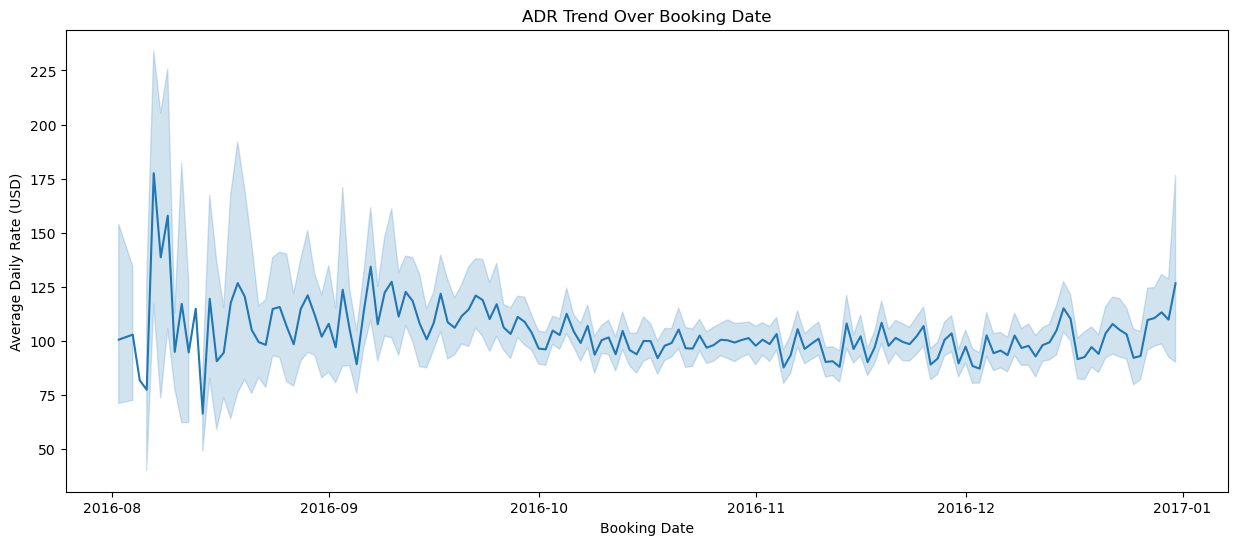

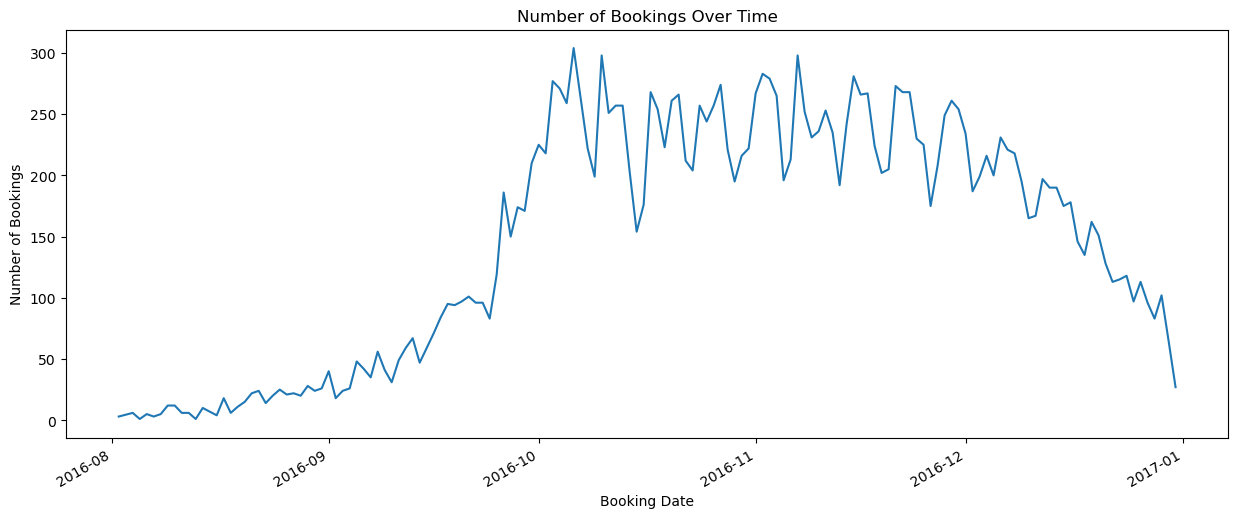

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert booking_date, checkin_date, and checkout_date to datetime if not already
df_cityA['booking_date'] = pd.to_datetime(df_cityA['booking_date'])
df_cityA['checkin_date'] = pd.to_datetime(df_cityA['checkin_date'])
df_cityA['checkout_date'] = pd.to_datetime(df_cityA['checkout_date'])

# Plot ADR trends over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='booking_date', y='ADR_USD', data=df_cityA)
plt.title('ADR Trend Over Booking Date')
plt.xlabel('Booking Date')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

# Plot the number of bookings over time
plt.figure(figsize=(15, 6))
df_cityA['booking_date'].value_counts().sort_index().plot()
plt.title('Number of Bookings Over Time')
plt.xlabel('Booking Date')
plt.ylabel('Number of Bookings')
plt.show()

Number of Bookings Over Time:

There's a clear cyclical pattern in the number of bookings, which could be weekly (peaks and troughs corresponding to specific days of the week).
A significant increase in bookings starts around early September and continues with fluctuations until it peaks.
Post mid-November, there is a gradual decline in the number of bookings, which sharply falls after the end of December.
ADR Trend Over Booking Date:

The ADR shows volatility at the beginning, which could be due to a smaller number of bookings causing greater variability in rates.
There's a general downward trend in ADR as time progresses, particularly noticeable from late October onwards.
The sharp increase towards the end of the timeline might suggest a spike in prices around the New Year, which is a common trend due to increased demand.

1. Investigate Cyclic Patterns

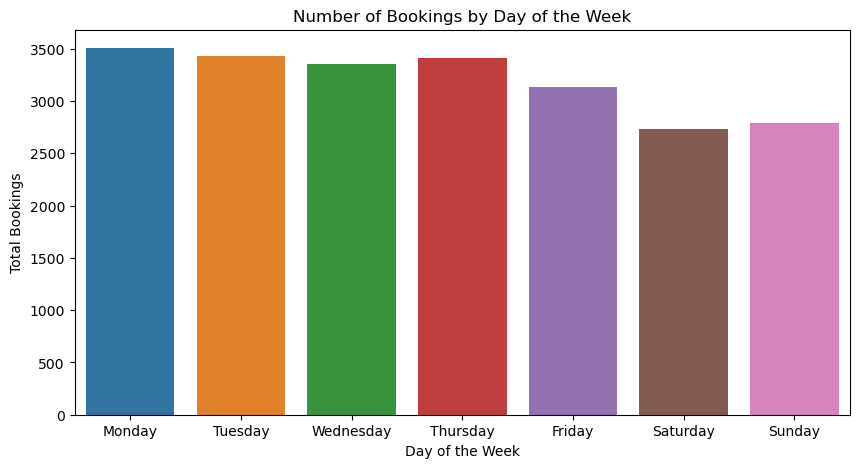

In [8]:
# Extract day of the week and add it as a new column
df_cityA['day_of_week'] = df_cityA['booking_date'].dt.day_name()

# Plot the number of bookings for each day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=df_cityA, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Bookings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bookings')
plt.show()

The bar chart shows a relatively even distribution of bookings across the days of the week, with slightly fewer bookings on Saturdays and Sundays. This suggests that the potential impact of urgency messaging might not need to be tailored by day of the week, although the slightly lower weekend bookings might warrant special attention or promotions.

With relatively even distribution, urgency messaging could be consistently applied throughout the week. However, the slight dip in bookings over the weekend might suggest a window for special weekend promotions or last-minute deals to be communicated through urgency messages.

2. Analyze Seasonal Trends

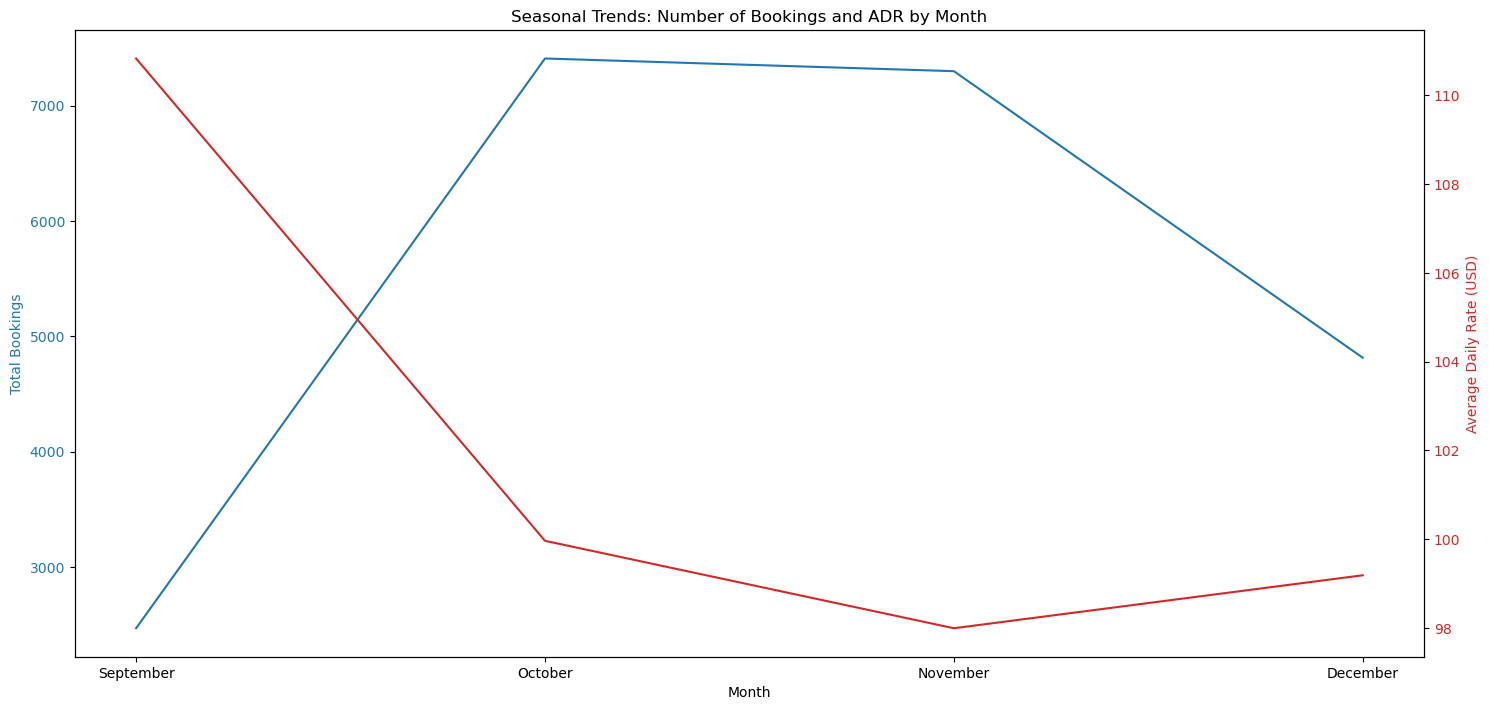

In [10]:
# Extract month from the booking date and add it as a new column
df_cityA['month'] = df_cityA['booking_date'].dt.month_name()

# Plot the number of bookings and ADR by month
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the number of bookings
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Bookings', color=color)
ax1.plot(df_cityA.groupby('month')['#'].count().reindex(['September','October', 'November', 'December']), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plotting the ADR
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(df_cityA.groupby('month')['ADR_USD'].mean().reindex(['September','October', 'November', 'December']), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Seasonal Trends: Number of Bookings and ADR by Month')
plt.show()

The combined line plot indicates an inverse relationship between the number of bookings and ADR as the year progresses. As the number of bookings increases (from September to October), the ADR decreases, and as the number of bookings decreases (from November to December), the ADR increases slightly. This could be due to seasonal demand effects or pricing strategies to maximize revenue.

As bookings increase, ADR decreases, which could indicate hotels are dropping prices to attract more bookings. Conversely, as bookings decline, ADR increases, likely to maximize revenue per booking. Urgency messages during high-booking periods could stress the likelihood of future price increases to encourage immediate bookings. During low-booking periods, messages could emphasize the exclusivity and limited availability at higher rates.

3. Segment Data
We can analyze the ADR by accommodation type and star rating to see if there are different patterns.

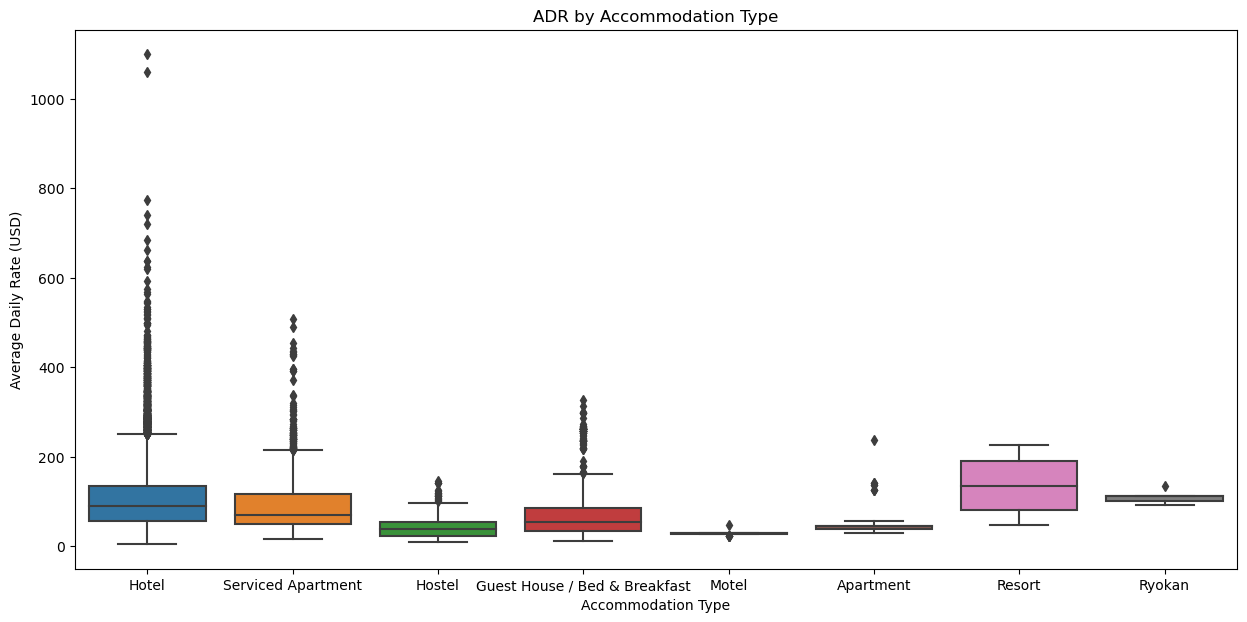

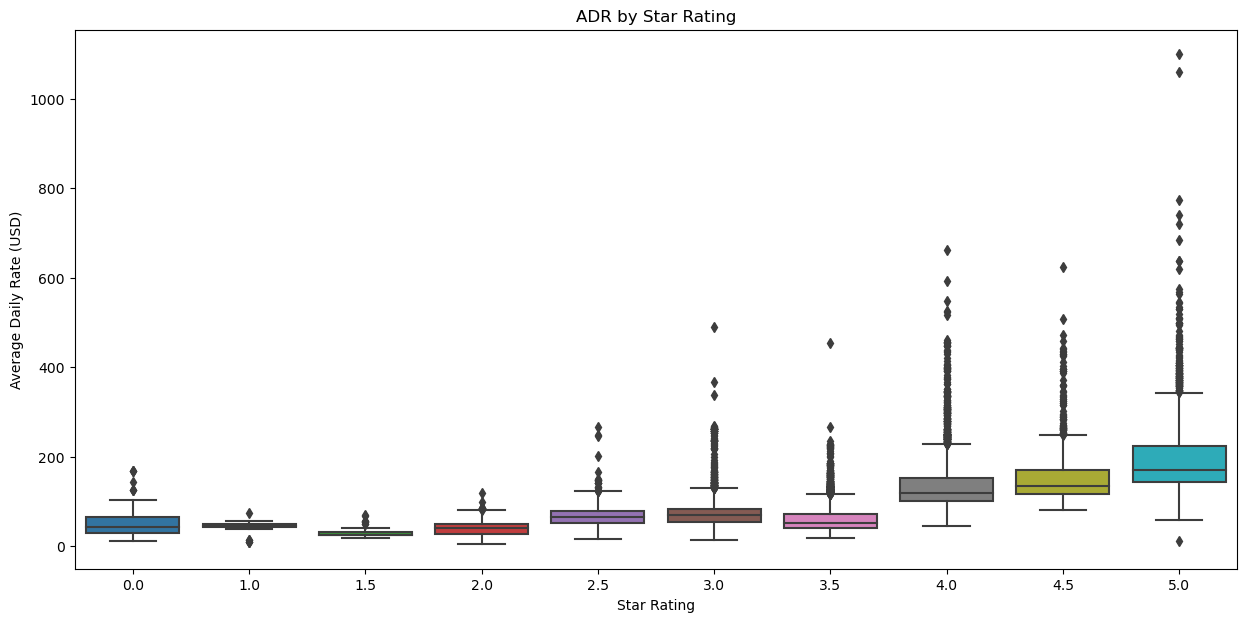

In [12]:
# Segment by Accommodation Type and plot ADR
plt.figure(figsize=(15, 7))
sns.boxplot(x='accommadation_type_name', y='ADR_USD', data=df_cityA)
plt.title('ADR by Accommodation Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

# Segment by Star Rating and plot ADR
plt.figure(figsize=(15, 7))
sns.boxplot(x='star_rating', y='ADR_USD', data=df_cityA)
plt.title('ADR by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

ADR by Accommodation Type:

The box plot shows significant variation in ADR among different accommodation types. Hotels, serviced apartments, and resorts tend to have a higher ADR, with hotels showing a wide range of rates. Hostels and motels have a noticeably lower ADR. This variability can inform differentiated urgency messaging strategies for different accommodation types.

In [ ]:
#another way to visualize this:

/Users/Arunabho/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Arunabho/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


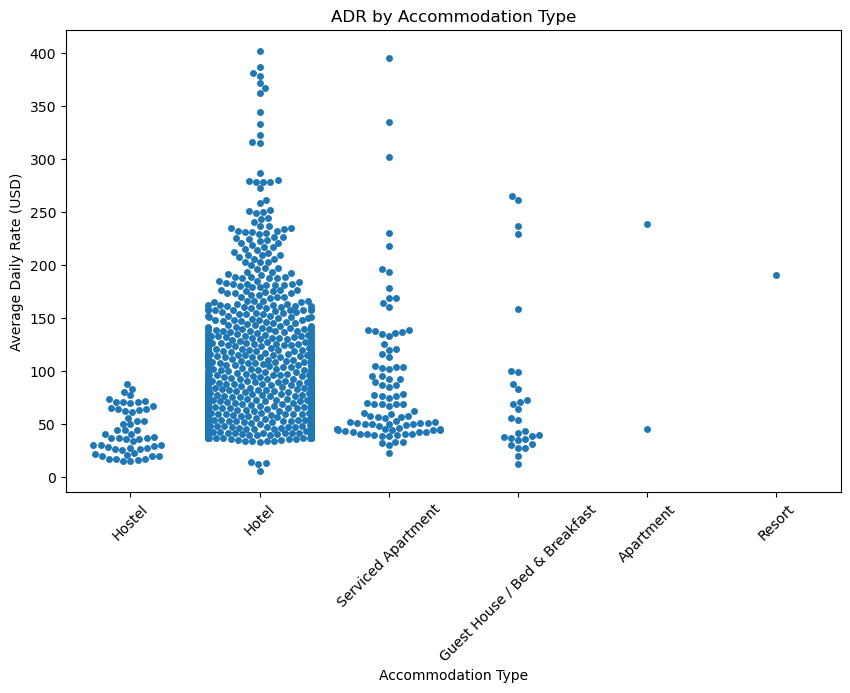

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Since swarm plots can be slow and overlap with large datasets, we might want to sample or use a category-wise plot
# Let's plot a sample of 1000 points for visualization clarity
sampled_data = df_cityA.sample(n=1000, random_state=1)

plt.figure(figsize=(10, 6))
sns.swarmplot(x='accommadation_type_name', y='ADR_USD', data=sampled_data)
plt.title('ADR by Accommodation Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Average Daily Rate (USD)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

Different accommodation types have varying ADRs, indicating that customers' price sensitivity may differ by accommodation type. Urgency messaging can be segmented based on these types, highlighting potential savings or price increases more aggressively for hotels and resorts where the ADR is higher.

4. Correlation Analysis
To analyze the correlation between the ADR and the number of bookings, we'll create a scatter plot and calculate the Pearson correlation coefficient.

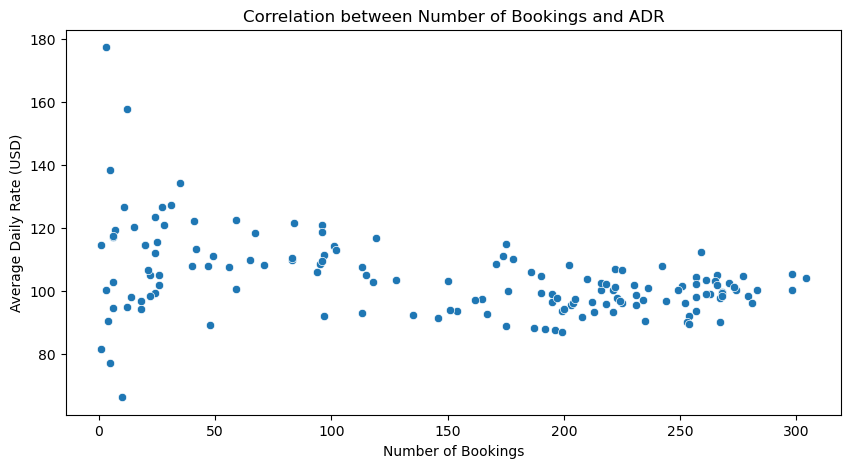

The Pearson correlation coefficient between number of bookings and ADR is: -0.3955505458854146


In [13]:
# Calculate daily booking counts
daily_bookings = df_cityA['booking_date'].value_counts().sort_index()

# Calculate daily ADR average
daily_adr_avg = df_cityA.groupby('booking_date')['ADR_USD'].mean()

# Merge both series into a dataframe for correlation analysis
correlation_df = pd.concat([daily_bookings, daily_adr_avg], axis=1)
correlation_df.columns = ['bookings', 'average_adr']

# Plot and calculate correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='bookings', y='average_adr', data=correlation_df)
plt.title('Correlation between Number of Bookings and ADR')
plt.xlabel('Number of Bookings')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient = correlation_df.corr().iloc[0, 1]
print(f'The Pearson correlation coefficient between number of bookings and ADR is: {correlation_coefficient}')

The scatter plot doesn't indicate a strong linear relationship between the number of bookings and the average daily rate (ADR). This suggests that as the number of bookings increases, the ADR doesn't necessarily increase or decrease in a predictable manner.

The lack of a strong correlation suggests that pricing strategies may be complex and influenced by multiple factors beyond just the number of bookings. Urgency messaging could be tailored not just by booking volume but also by other factors like time to check-in date or special events.

5. Advanced Statistical Analysis
For advanced statistical analysis like time series forecasting, we can use the ARIMA model to forecast future ADR trends.

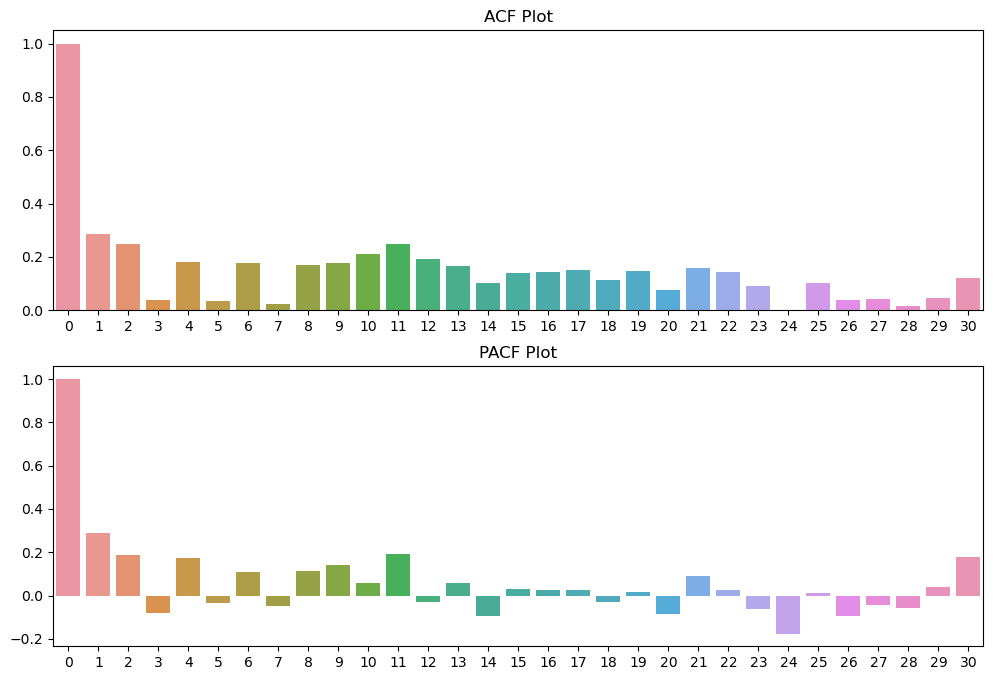

NameError: name 'warnings' is not defined

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

# Assuming daily_adr_avg is a Series with datetime index and no missing values
# Calculate daily ADR average if not already done
daily_adr_avg = df_cityA.groupby('booking_date')['ADR_USD'].mean().asfreq('D', method='ffill')

# Determine p, d, q values using ACF and PACF plots
lags = 30  # Number of lags to consider for the ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
acf_vals = acf(daily_adr_avg, nlags=lags)
pacf_vals = pacf(daily_adr_avg, nlags=lags, method='ols')

# Plot ACF values
sns.barplot(x=[x for x in range(len(acf_vals))], y=acf_vals, ax=ax[0])
ax[0].set_title('ACF Plot')

# Plot PACF values
sns.barplot(x=[x for x in range(len(pacf_vals))], y=pacf_vals, ax=ax[1])
ax[1].set_title('PACF Plot')

plt.show()

# Suppress warnings for demonstration purposes
warnings.filterwarnings("ignore")

# Fit the ARIMA model with identified order (p, d, q)
# This is just an example, and the values should be identified using ACF and PACF plots or other methods
p = 1  # AR terms
d = 1  # Differencing order
q = 1  # MA terms

model = ARIMA(daily_adr_avg, order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the forecast with confidence intervals
forecast_steps = 30  # Number of steps to forecast into the future

fig, ax = plt.subplots(figsize=(12, 6))
model_fit.plot_predict(end=pd.to_datetime('2017-01-31'), ax=ax)
plt.show()

In [ ]:
#compare data across the cities

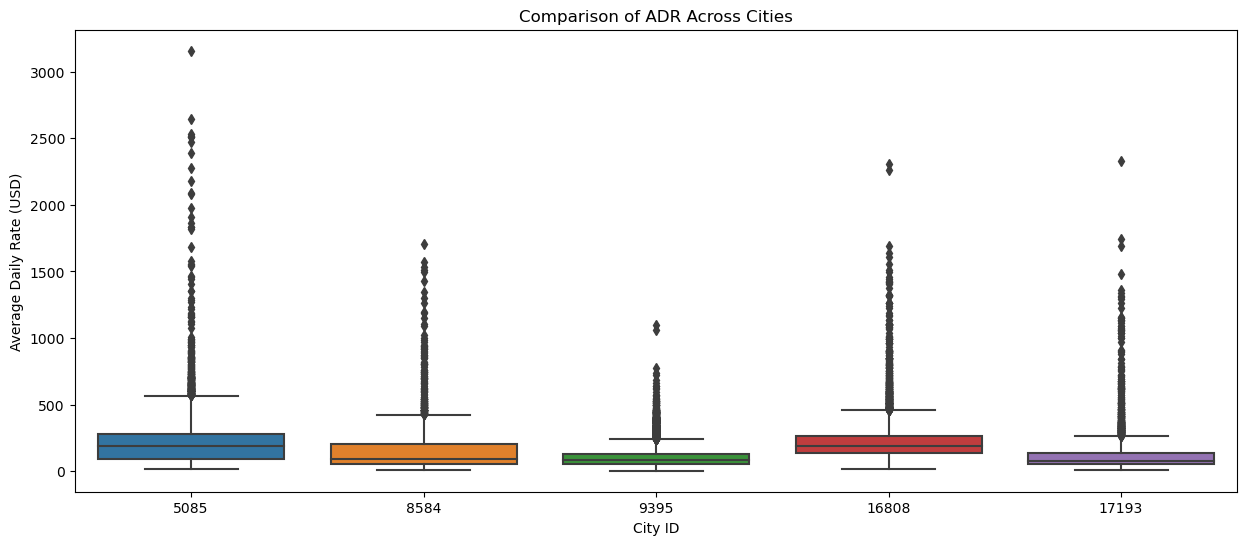

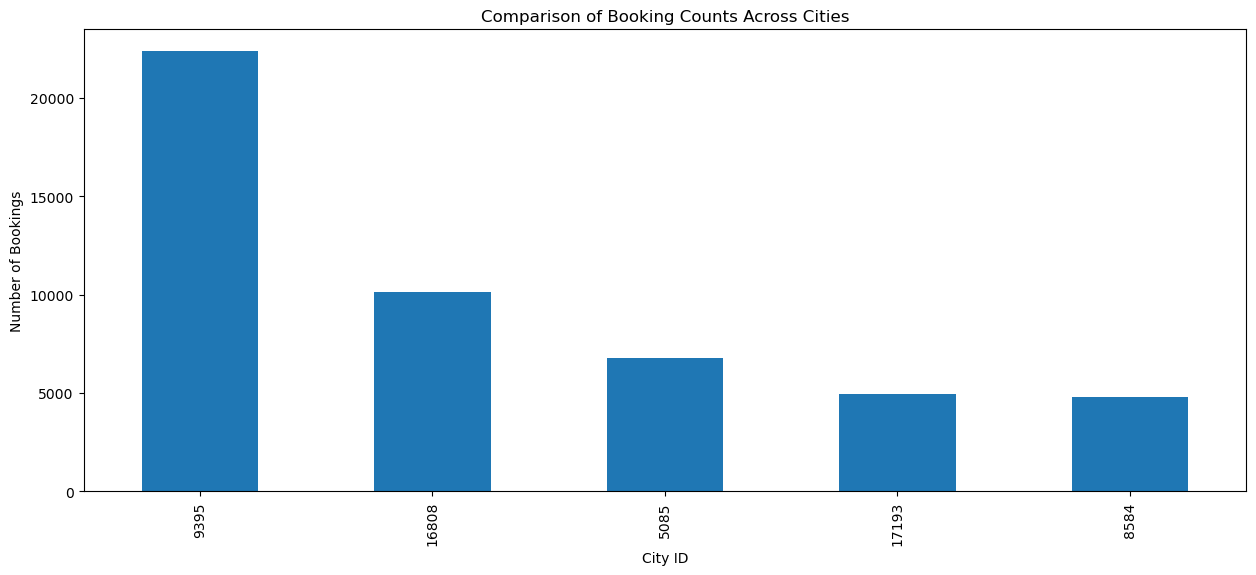

In [7]:
# Concatenate all city data into one DataFrame
all_cities = pd.concat([df_cityA, df_cityB, df_cityC, df_cityD, df_cityE], keys=['City_A', 'City_B', 'City_C', 'City_D', 'City_E'])

# Compare ADR across cities
plt.figure(figsize=(15, 6))
sns.boxplot(x='city_id', y='ADR_USD', data=all_cities)
plt.title('Comparison of ADR Across Cities')
plt.xlabel('City ID')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

# Compare booking counts across cities
plt.figure(figsize=(15, 6))
all_cities['city_id'].value_counts().plot(kind='bar')
plt.title('Comparison of Booking Counts Across Cities')
plt.xlabel('City ID')
plt.ylabel('Number of Bookings')
plt.show()


In [ ]:
#Results until now

Segmented Messaging: Tailor messages based on the accommodation type, highlighting potential price hikes for higher-end accommodations where customers might be more sensitive to price changes. So, for example, for higher priced accomodations, we can say-
1. 30% off only for today, offer expires at 12:00 AM! (As price drop would seem to attract more affluent customers)

For lower priced accomodations, we can say-

2. Last room available at this price, hurry! (These segments are price sensitive so it's triggering loss aversion)

Time-Sensitive Promotions: Utilize seasonal trends to create time-sensitive offers. 

For example, as the end of the year approaches and ADRs tend to rise while bookings drop, urgency messages could stress impending price rises or highlight special deals to attract bookings.

1. Christmas deal expires in 2 hours!
2. Flash Sale warning, lock your prices in next 30 minutes!
3. Hurry! 190 People visited the accomodation in last 24 hours!
4. Last room available at this price, book fast!

Weekend Focus: Given the slight decrease in weekend bookings, there may be an opportunity to target potential customers with urgency messages emphasizing limited availability or last-minute deals to boost weekend sales.

For example:
1. Superb Saturday! Use the code SupSat to get a discount of 10%!
2. Sunday Funday! Book by end of the day and enjoy your next booking at 10% off.

In [ ]:
#Trend Analysis

In [16]:
df_cityA['lead_time'] = (df_cityA['checkin_date'] - df_cityA['booking_date']).dt.days

Step 2: Trend of Booking Rates Over Lead Time
Let's visualize how the number of bookings varies with different lead times.

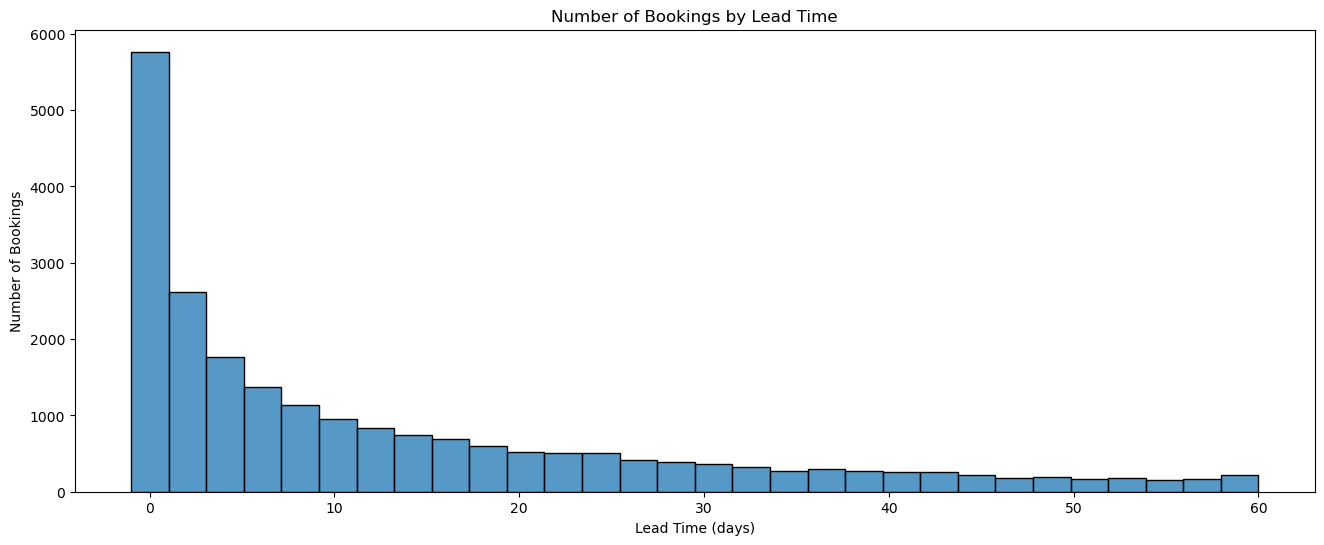

In [17]:
plt.figure(figsize=(16, 6))
sns.histplot(df_cityA['lead_time'], bins=30, kde=False)
plt.title('Number of Bookings by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.show()

Almost 70% of the booking was done 10 days prior or less.uge chance of using hooking messages.

Step 3: ADR Changes Over Lead Time
Now, let's see how the ADR changes as the lead time decreases.

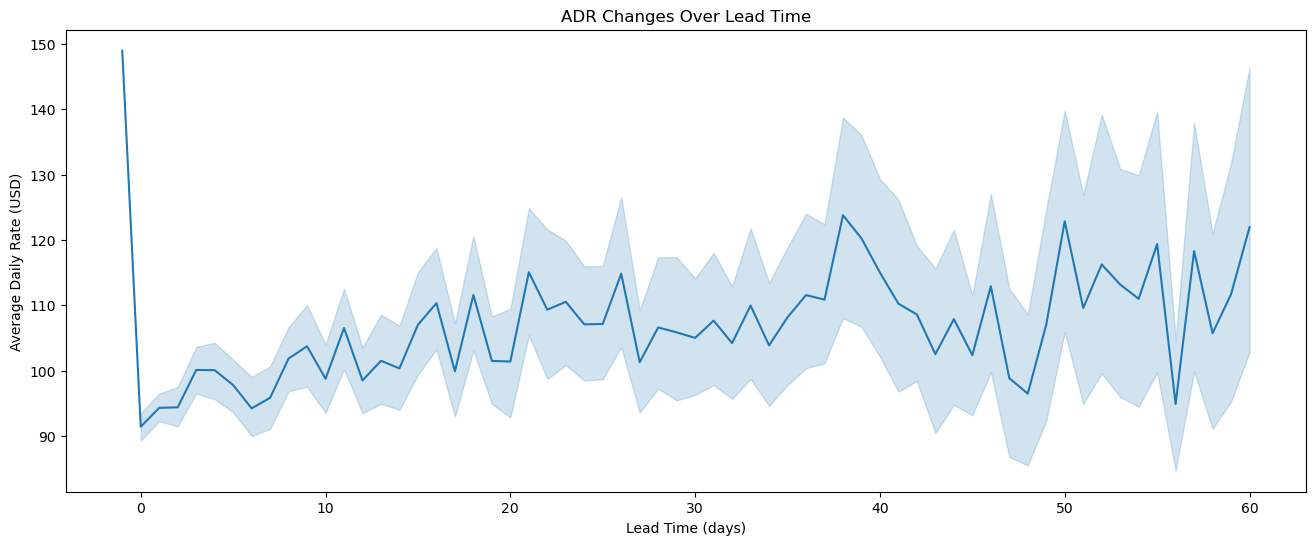

In [18]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='ADR_USD', data=df_cityA)
plt.title('ADR Changes Over Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

Step 4: Patterns Leading Up to Check-in Dates
To identify patterns leading up to check-in dates, we can create a time series plot showing the ADR for different lead times.

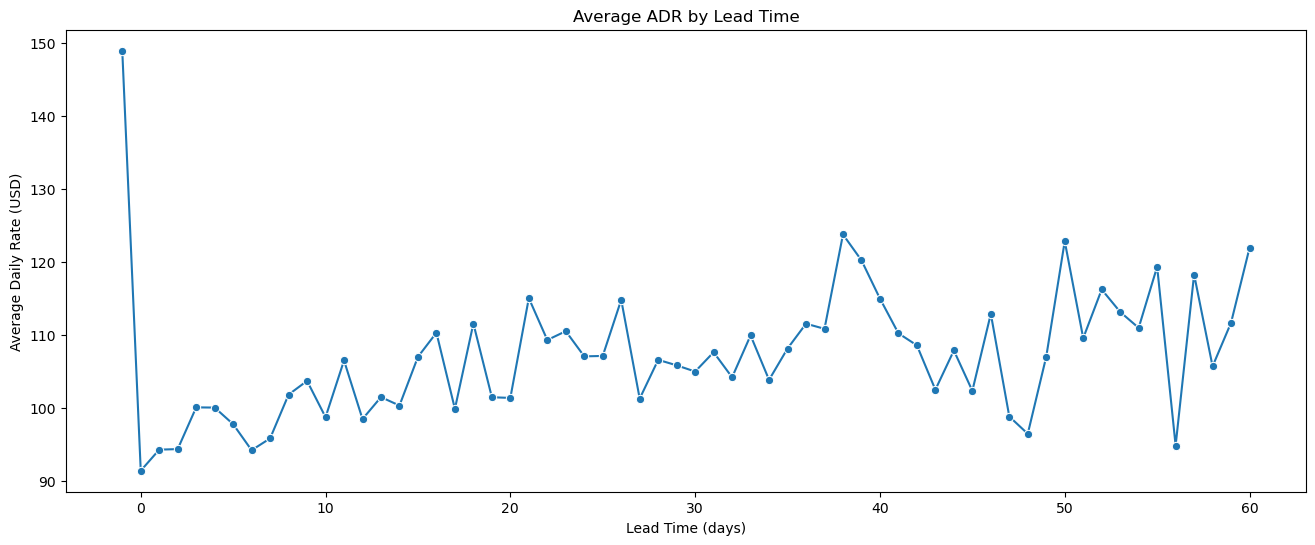

In [19]:
# Group the data by lead time and calculate the average ADR
lead_time_adr = df_cityA.groupby('lead_time')['ADR_USD'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='ADR_USD', data=lead_time_adr, marker='o')
plt.title('Average ADR by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

Additional Trend Analysis Strategies
A. Weekly ADR Trend Analysis

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

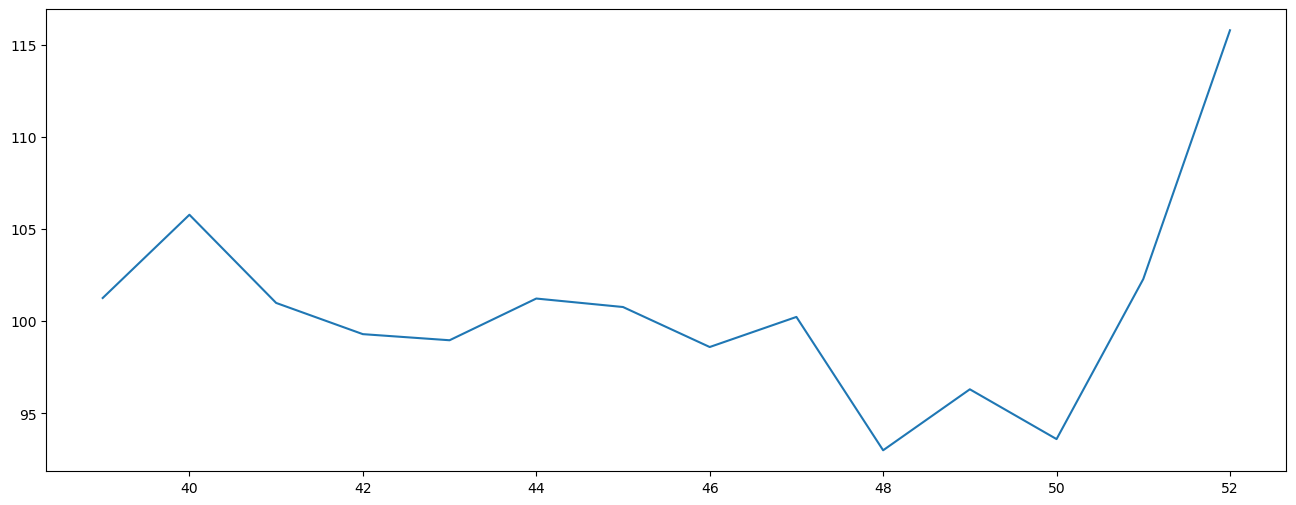

In [20]:
# Extract the week number from the check-in date
df_cityA['checkin_week'] = df_cityA['checkin_date'].dt.isocalendar().week

# Plot ADR by week number
plt.figure(figsize=(16, 6))
sns.lineplot(x='checkin_week', y='ADR_USD', data=df_cityA, estimator='mean')
plt.title('Weekly ADR Trend')
plt.xlabel('Week Number')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

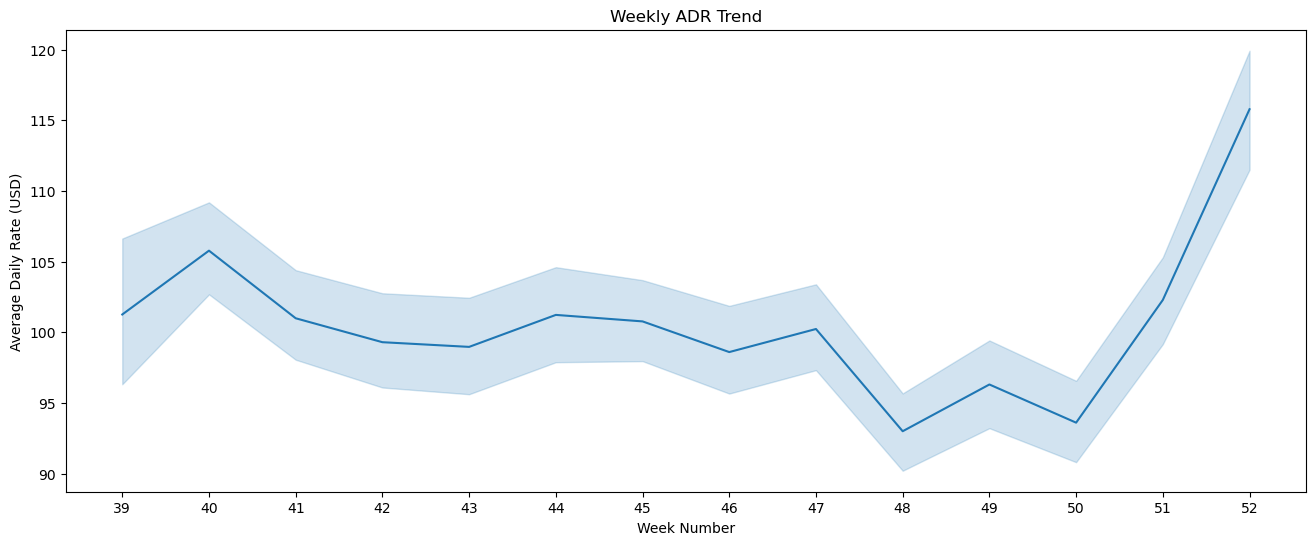

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'checkin_date' to datetime if it's not already
df_cityA['checkin_date'] = pd.to_datetime(df_cityA['checkin_date'])

# Extract the week number from the check-in date and ensure it's an integer
df_cityA['checkin_week'] = df_cityA['checkin_date'].dt.isocalendar().week.astype(int)

# Now let's try the line plot again
plt.figure(figsize=(16, 6))
sns.lineplot(x='checkin_week', y='ADR_USD', data=df_cityA, estimator='mean')
plt.title('Weekly ADR Trend')
plt.xlabel('Week Number')
plt.ylabel('Average Daily Rate (USD)')
plt.xticks(range(min(df_cityA['checkin_week']), max(df_cityA['checkin_week'])+1))  # Ensure x-ticks cover all weeks
plt.show()

B. ADR Trend Analysis by Accommodation Type

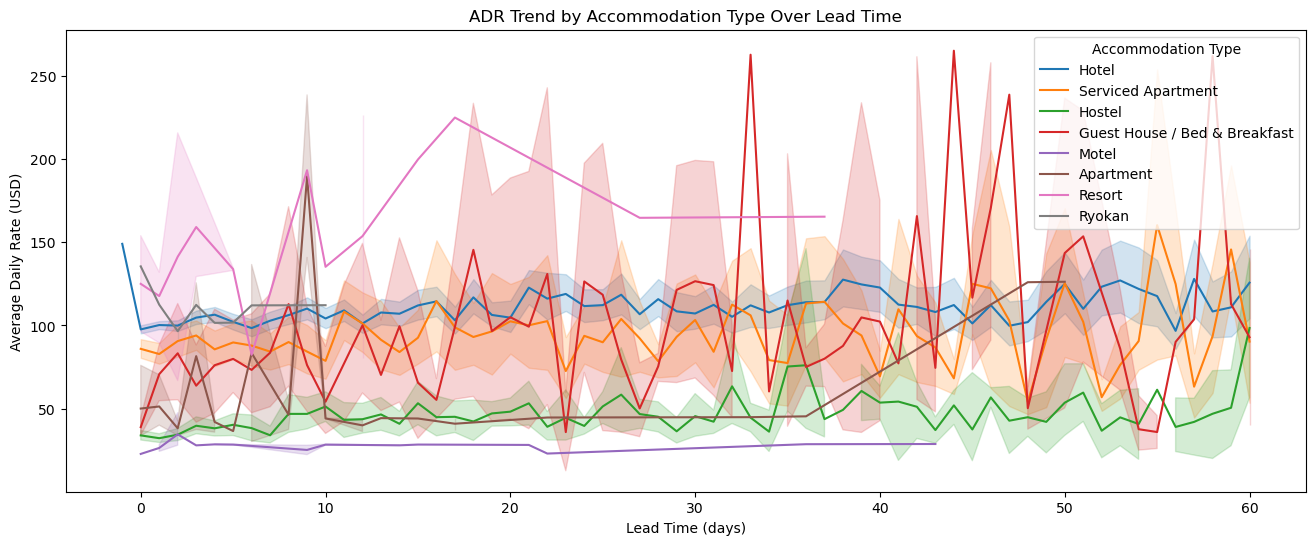

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='ADR_USD', hue='accommadation_type_name', data=df_cityA, estimator='mean')
plt.title('ADR Trend by Accommodation Type Over Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.legend(title='Accommodation Type')
plt.show()

In [ ]:
#Results till now

Advance Booking Promotions: Target customers planning far ahead with the appeal of guaranteed availability and the chance to secure the best rooms or rates.

Mid-range Lead Time Offers: Identify and target the window where ADR dips with promotional campaigns to capture customers looking for deals. Messages could focus on the benefits of booking now versus waiting until later when prices could be unpredictable.

Dynamic Pricing Alerts: As the check-in date gets closer and ADR starts to fluctuate, use dynamic pricing alerts to keep potential customers informed of the best times to book. Tools like price prediction and alert features can keep customers engaged and more likely to convert.

Last-minute Booking Tactics: Highlight scarcity and potential price hikes as the check-in date approaches. This can be especially effective for accommodations that tend to increase their rates last minute due to their popularity or premium status.

In [ ]:
#Deeper Analysis for business enquiries

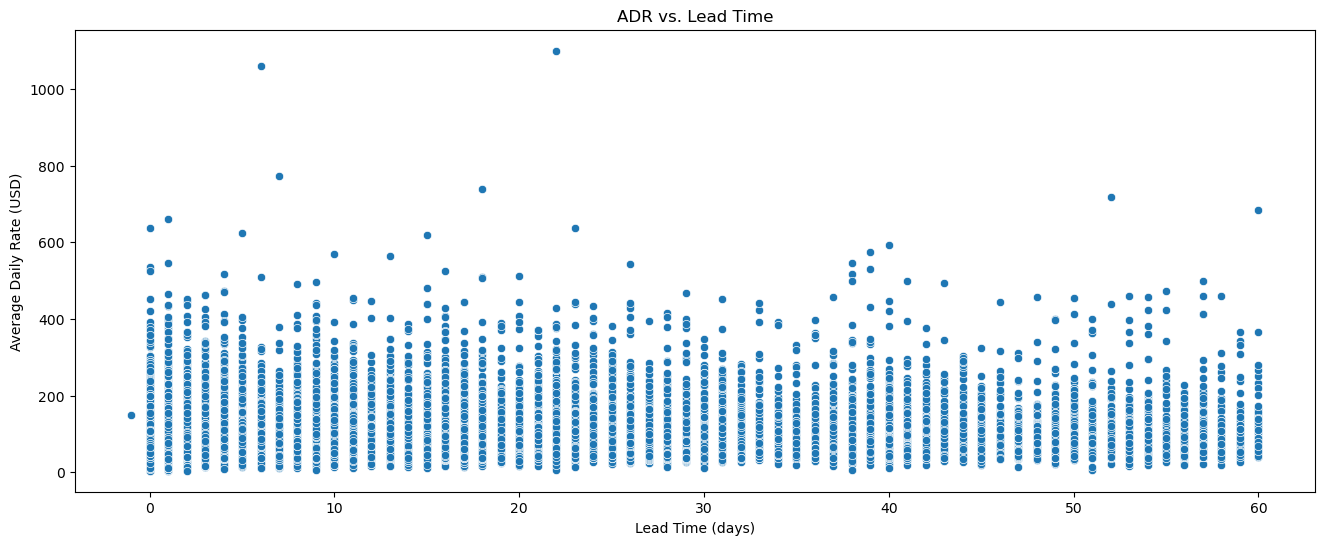

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cityA has the required columns: 'lead_time', 'ADR_USD', 'city_id', 'accommadation_type_name', 'star_rating'
# You would need to concatenate all city dataframes if you haven't already
df = pd.concat([df_cityA, df_cityB, df_cityC, df_cityD, df_cityE])

# Analyze the relationship between lead time and ADR
plt.figure(figsize=(16, 6))
sns.scatterplot(x='lead_time', y='ADR_USD', data=df_cityA)
plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

ADR vs. Lead Time Scatter Plot:

This scatter plot illustrates the distribution of ADR at various lead times. While there's a general concentration of data points at lower ADRs for longer lead times, there is also a visible spread of ADRs across the lead time, indicating variability in pricing.
Implication: Customers could be informed about the variability in prices and encouraged to book at times when the ADR is on the lower end of the spectrum. Messaging could focus on the unpredictability of rates and the advantages of locking in a good rate.

2. Variation of Impact by City

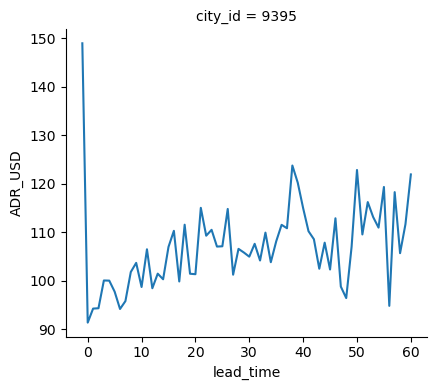

In [28]:
# Group the data by 'city_id' and 'lead_time', then calculate the mean ADR
city_lead_time_adr = df.groupby(['city_id', 'lead_time'])['ADR_USD'].mean().reset_index()

# Plot ADR by lead time for each city
g = sns.FacetGrid(city_lead_time_adr, col='city_id', col_wrap=3, height=4)
g = g.map(plt.plot, 'lead_time', 'ADR_USD')
plt.show()

ADR by City (City ID: 9395):

The line plot for a single city shows fluctuations in ADR as the check-in date approaches, with some increases in ADR at shorter lead times.
Implication: For this city, messages could highlight the benefits of booking early to avoid potential price surges as the check-in date nears.

3. Variation of Impact by Hotel Type and Star Rating

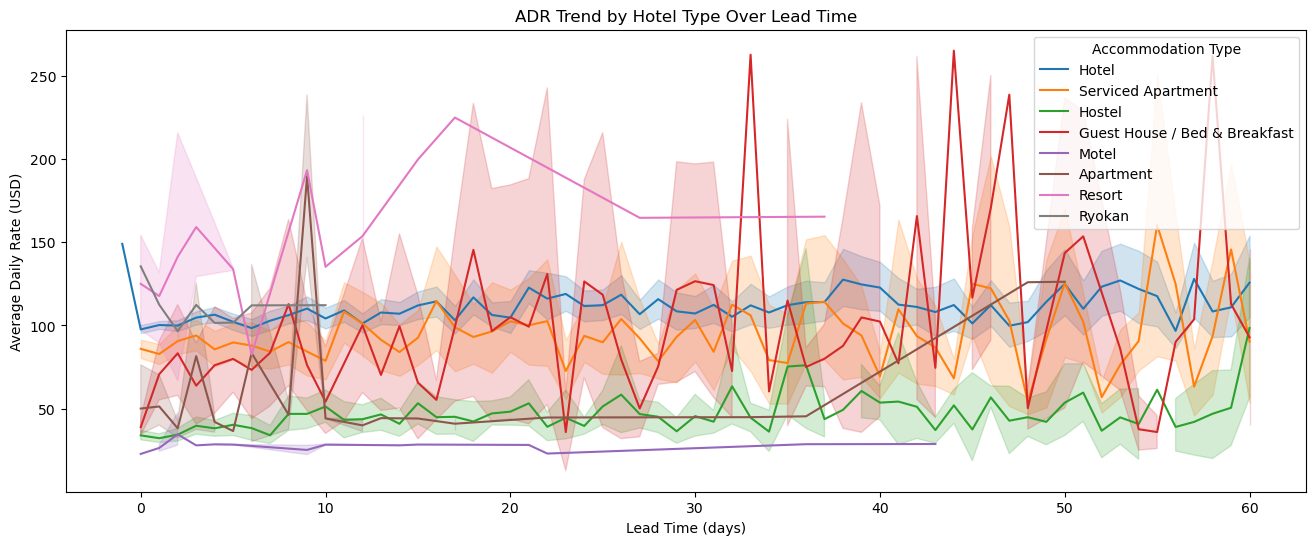

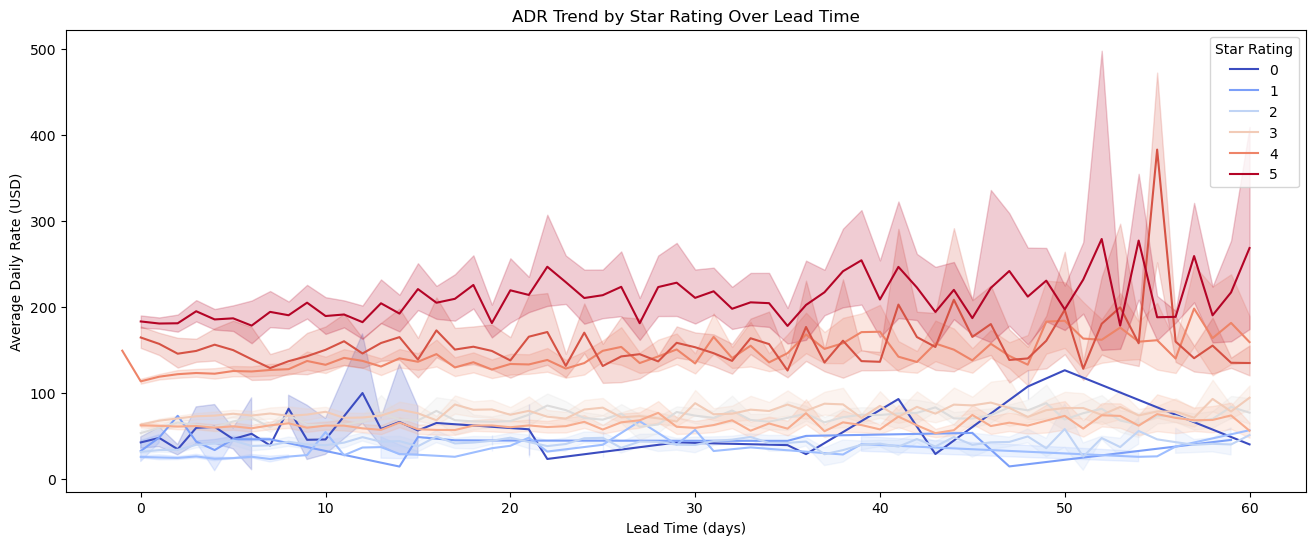

In [25]:
# ADR by hotel type and lead time
plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='ADR_USD', hue='accommadation_type_name', data=df_cityA, estimator='mean')
plt.title('ADR Trend by Hotel Type Over Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.legend(title='Accommodation Type')
plt.show()

# ADR by star rating and lead time
plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='ADR_USD', hue='star_rating', data=df_cityA, estimator='mean', palette='coolwarm')
plt.title('ADR Trend by Star Rating Over Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.legend(title='Star Rating')
plt.show()


ADR Trend by Hotel Type Over Lead Time:

The visualization demonstrates significant variance in ADR across different accommodation types as the lead time changes. Some types, such as resorts and ryokans, show spikes in rates at certain lead times, potentially indicating periods of higher demand or lower availability.
Implication: Urgency messaging for resorts and ryokans could be timed around these spikes, emphasizing scarcity and potential rate increases to prompt immediate booking.

These analyses will help identify actionable insights such as:

Optimal Timing for Urgency Messages: By understanding when ADR starts to increase as lead time decreases, urgency messages can be timed to encourage bookings just before predicted price hikes.

Targeted Messaging by City and Hotel Type: If the impact of the booking window on ADR varies significantly by city or hotel type, messaging can be customized accordingly to maximize its effectiveness.

Differentiating Strategy by Star Rating: Should the analysis show that higher star ratings experience a different trend in ADR as lead time changes, urgency messages can be tailored to emphasize luxury or value at the appropriate times.

Timing: Urgency messaging can be scheduled around observed spikes in ADR, targeting customers when they are most likely to be affected by price changes.

Customization by Accommodation Type: Different accommodation types exhibit different ADR trends, allowing for tailored messages that reflect the booking patterns of each segment. For example, luxury accommodations like resorts and ryokans may benefit from messaging that emphasizes exclusivity and the risk of missing out on premium experiences.

Highlighting Price Volatility: With the observed fluctuations in ADR, messages can stress the unpredictability of waiting too long to book, potentially appealing to customers' desire for certainty and value.

Focus on Booking Window Opportunities: Given the drop in ADR after the initial high, urgency messages could promote a "best time to book" or alert customers to the potential for savings if they book during this window.

Overall, these insights suggest that urgency messages should not be one-size-fits-all but rather should be dynamically adapted to the booking patterns and pricing strategies specific to each accommodation type, city, and lead time. This strategy aims to drive increased bookings by capitalizing on the data-driven understanding of when and how customers are most responsive to pricing cues.

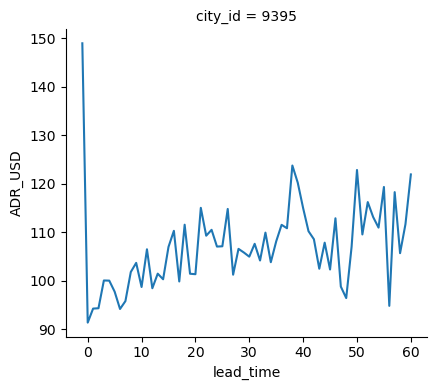

In [29]:
# Ensure 'city_id' is of type string if it's not already, which is necessary for FacetGrid to work properly
city_lead_time_adr['city_id'] = city_lead_time_adr['city_id'].astype(str)

# Get a sorted list of unique city IDs to define the order of the FacetGrid
unique_city_ids = sorted(city_lead_time_adr['city_id'].unique())

# Plot ADR by lead time for each city
g = sns.FacetGrid(city_lead_time_adr, col='city_id', col_wrap=3, col_order=unique_city_ids, height=4)
g = g.map(plt.plot, 'lead_time', 'ADR_USD')
plt.show()

In [30]:
print(df['city_id'].unique())

[ 9395 17193  5085 16808  8584]


Luxury Segment (4 and 5 Stars):

Optimal Timing: The data shows that ADR for luxury accommodations can spike significantly as the lead time decreases. The optimal time for urgency messaging in this segment is just before these expected spikes, particularly in the 10-20 days lead time window.
Urgency Message: "Reserve your luxury stay now to avoid expected rate increases as your travel date nears. Exclusive experiences at the best rates are only available for a limited time."
Mid-range Segment (3 Stars):

Optimal Timing: The ADR for mid-range accommodations shows less volatility, but still some upward movement as the check-in date approaches. The timing for messaging here should focus on the moderate lead times, potentially 20-30 days out.
Urgency Message: "Secure your comfortable and convenient stay now and benefit from stable pricing. Waiting too long could mean missing out on today's rates."
Economy Segment (0 to 2 Stars):

Optimal Timing: This segment shows the most stability in pricing, so urgency messaging could be employed closer to the check-in date to fill up rooms, especially during off-peak times when booking volumes are lower.
Urgency Message: "Book your budget-friendly room today before the last few spots are taken. Ensure you don't miss out on the best value for your travels."
Seasonal Variations:

Optimal Timing: Near the end of the year and other peak seasons when ADR tends to rise, urgency messages should be placed well in advance to capitalize on the anticipated demand.
Urgency Message: "Plan your holiday travels now and lock in your rate before the seasonal rush. Don't let rising rates affect your festive season plans."
Last-Minute Bookings:

Optimal Timing: For all segments, consider a strategy for last-minute bookings, where the messaging can play on the scarcity of available rooms.
Urgency Message: "It's not too late to find the perfect stay! Book now to secure one of our last available rooms."
Dynamic Pricing Alerts:

Given the fluctuations in ADR, consider implementing dynamic pricing alerts to inform potential customers of price drops or upcoming increases.
Urgency Message: "Price Alert: Rates for your saved favorites are about to go up. Book in the next 24 hours to secure your rate."


In [ ]:
#Some more charts

In [35]:
df_cityB['lead_time'] = (df_cityB['checkin_date'] - df_cityB['booking_date']).dt.days
df_cityC['lead_time'] = (df_cityC['checkin_date'] - df_cityC['booking_date']).dt.days
df_cityD['lead_time'] = (df_cityD['checkin_date'] - df_cityD['booking_date']).dt.days
df_cityE['lead_time'] = (df_cityE['checkin_date'] - df_cityE['booking_date']).dt.days

In [37]:
all_cities

#     ADR_USD  hotel_id  city_id  star_rating  \
City_A 0        1   71.060000    297388     9395          2.5   
       1        2   76.560000    298322     9395          3.0   
       2        3  153.880000   2313076     9395          5.0   
       3        4  126.600000   2240838     9395          3.5   
       4        5  115.080000   2240838     9395          3.5   
...           ...         ...       ...      ...          ...   
City_E 4812  4813   72.580000    130890     8584          4.0   
       4813  4814   70.020000    130890     8584          4.0   
       4814  4815  921.260000     21720     8584          5.0   
       4815  4816  345.086667     21720     8584          5.0   
       4816  4817  303.520000     21720     8584          5.0   

            accommadation_type_name chain_hotel booking_date checkin_date  \
City_A 0                      Hotel   non-chain   2016-08-02   2016-10-01   
       1                      Hotel   non-chain   2016-08-02   2016-10-01   
       2                      Hotel       chain   2016-08-02   2016-10-01   
       3                      Hotel   non-chain   2016-08-04   2016-10-02   
       4                      Hotel   non-chain   2016-08-04   2016-10-02   
...                             ...         ...          ...          ...   
City_E 4812                     NaN   non-chain   2016-12-31   2016-12-31   
       4813                     NaN   non-chain   2016-12-31   2016-12-31   
       4814                     NaN   non-chain   2016-12-31   2016-12-31   
       4815                     NaN   non-chain   2016-12-31   2016-12-31   
       4816                     NaN   non-chain   2016-12-31   2016-12-31   

            checkout_date accommodation_type_name  
City_A 0       2016-10-02                     NaN  
       1       2016-10-02                     NaN  
       2       2016-10-02                     NaN  
       3       2016-10-03                     NaN  
       4       2016-10-03                     NaN  
...                   ...                     ...  
City_E 4812    2017-01-02                   Hotel  
       4813    2017-01-01                   Hotel  
       4814    2017-01-01                  Resort  
       4815    2017-01-03                  Resort  
       4816    2017-01-01                  Resort  

[49064 rows x 11 columns]

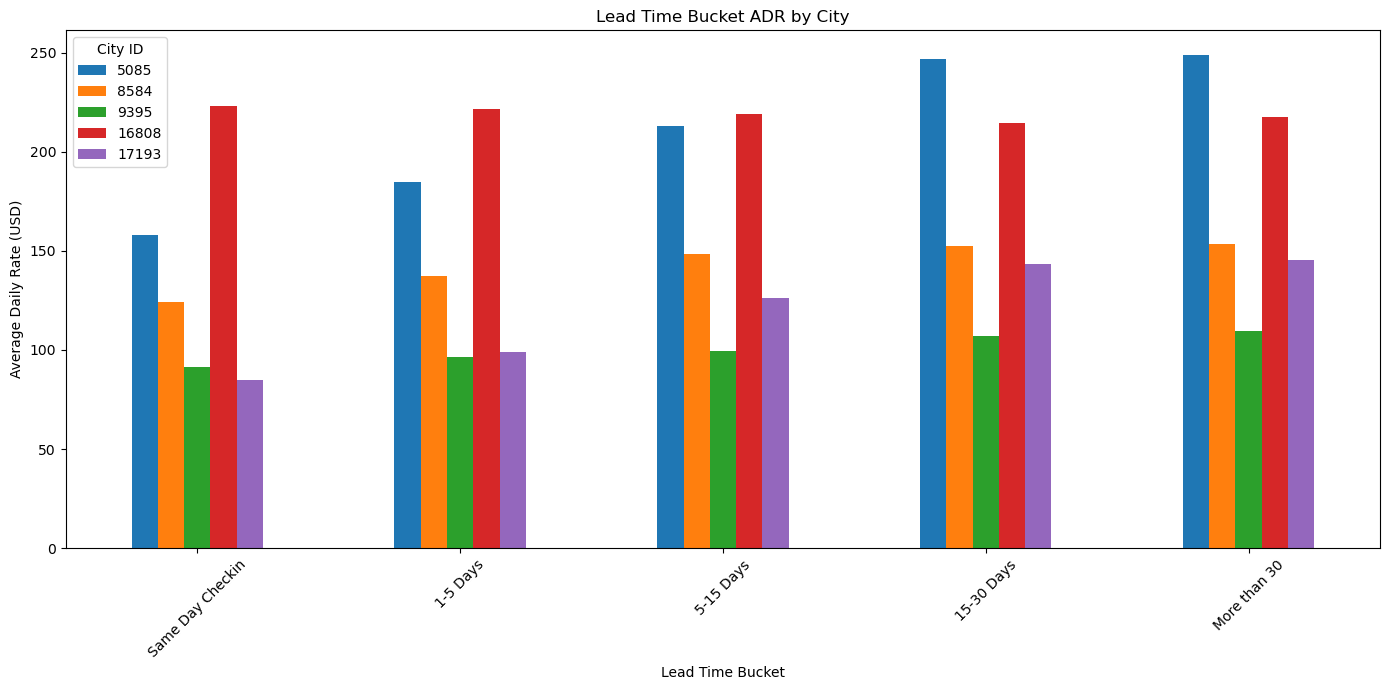

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the concatenated dataframe of all cities
# Categorize 'lead_time' into buckets

bins = [0, 1, 5, 15, 30, float('inf')]
labels = ['Same Day Checkin', '1-5 Days', '5-15 Days', '15-30 Days', 'More than 30']
df = pd.concat([df_cityA, df_cityB, df_cityC, df_cityD, df_cityE])
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Calculate the mean ADR for each bucket for each city
lead_time_bucket_adr = df.groupby(['city_id', 'LeadTimeBucket'])['ADR_USD'].mean().unstack()

# Transpose the dataframe to get cities as columns and lead time buckets as rows
lead_time_bucket_adr = lead_time_bucket_adr.T

# Plotting the bar chart
lead_time_bucket_adr.plot(kind='bar', figsize=(14, 7))

# Add titles and labels
plt.title('Lead Time Bucket ADR by City')
plt.xlabel('Lead Time Bucket')
plt.ylabel('Average Daily Rate (USD)')
plt.xticks(rotation=45)
plt.legend(title='City ID')

# Show the plot
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

# Pivot table to get the average ADR for each lead time bucket across different cities
pivot_table = df.pivot_table(index='LeadTimeBucket', columns='city_id', values='ADR_USD', aggfunc='mean')

# Sorting the index to maintain order
pivot_table = pivot_table.reindex(labels)

# Assuming you have a DataFrame similar to the example provided in the conversation
# Now you can save this pivot_table as a new CSV or Excel file, or print it to console
pivot_table.to_csv('LeadTimeBucketADR.csv')  # To save as CSV
pivot_table.to_excel('LeadTimeBucketADR.xlsx')  # To save as Excel
print(pivot_table)  # To print the table to console


city_id                5085        8584        9395        16808       17193
LeadTimeBucket                                                              
Same Day Checkin  158.283187  124.223176   91.398522  223.201593   84.626267
1-5 Days          184.653303  137.323628   96.231177  221.401157   98.785196
5-15 Days         213.000651  148.383269   99.423595  219.179706  126.449998
15-30 Days        246.978092  152.687900  107.270780  214.627389  143.609064
More than 30      248.902144  153.302322  109.755046  217.612219  145.540090


In [85]:
import pandas as pd

# Assuming df is your DataFrame and pivot_table is already created as shown in the previous example.

# Define a simple color function
def color_negative_red(value):
  """
  Colors elements in a dataframe
  red if the value is less than 100,
  green if greater than 200,
  yellow if greater than 100 and less than or equal to 200.
  Black by default.
  """
  if value < 100:
    color = 'red'
  elif value > 200:
    color = 'green'
  elif value > 100:
    color = 'blue'
  else:
    color = 'black'
  return f'color: {color}'

# Apply the style
styled_table = pivot_table.style.applymap(color_negative_red)
styled_table

In [47]:
import pandas as pd

# Assuming df is the DataFrame that contains the data for all cities

# Create the pivot table for ADR by accommodation type
pivot_adr = df.pivot_table(values='ADR_USD', index='accommodation_type_name', aggfunc='mean').sort_values(by='ADR_USD', ascending=False)

# Create the pivot table for Lead time by accommodation type
pivot_lead_time = df.pivot_table(values='lead_time', index='accommodation_type_name', aggfunc='mean').sort_values(by='lead_time', ascending=False)

# Apply styling to the pivot tables
styled_adr = pivot_adr.style.background_gradient(cmap='Blues', high=0.5)
styled_lead_time = pivot_lead_time.style.background_gradient(cmap='Blues', high=0.5)

# To display the styled pivot tables in Jupyter Notebook
styled_adr
styled_lead_time


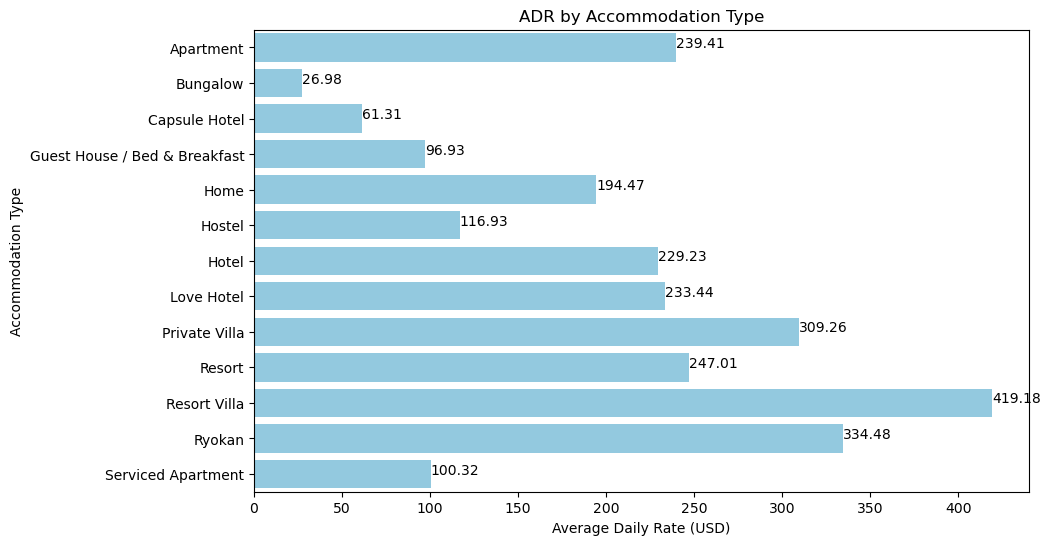

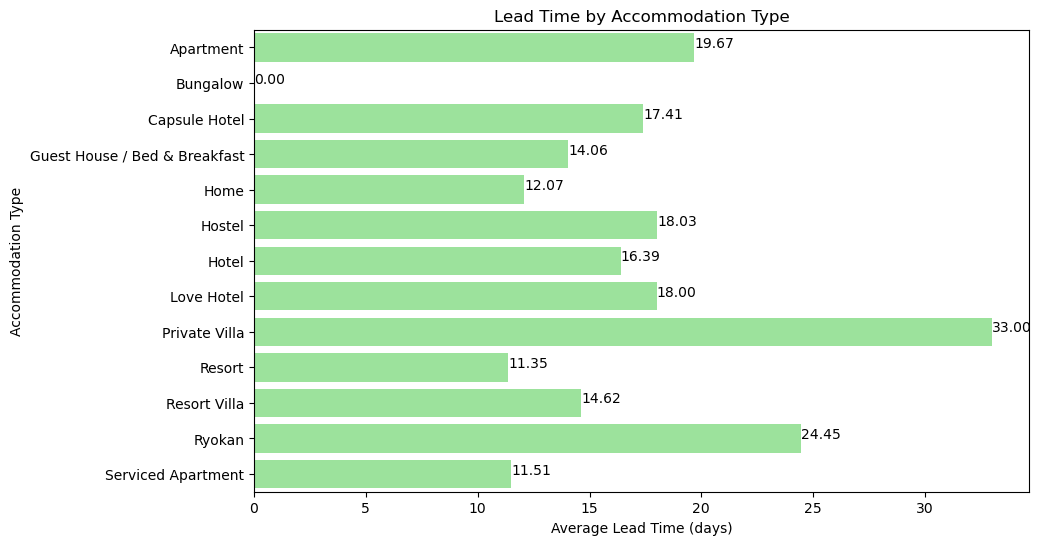

In [54]:
# Aggregate data
adr_agg = df.groupby('accommodation_type_name')['ADR_USD'].mean().reset_index()
lead_time_agg = df.groupby('accommodation_type_name')['lead_time'].mean().reset_index()

# Create horizontal bar chart for ADR by Accommodation Type
plt.figure(figsize=(10, 6))
sns.barplot(x='ADR_USD', y='accommodation_type_name', data=adr_agg, color='skyblue')
plt.title('ADR by Accommodation Type')
plt.xlabel('Average Daily Rate (USD)')
plt.ylabel('Accommodation Type')

# Add numbers at the end of bars
for index, value in enumerate(adr_agg['ADR_USD']):
    plt.text(value, index, f'{value:.2f}')

plt.show()

# Create horizontal bar chart for Lead Time by Accommodation Type
plt.figure(figsize=(10, 6))
sns.barplot(x='lead_time', y='accommodation_type_name', data=lead_time_agg, color='lightgreen')
plt.title('Lead Time by Accommodation Type')
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Accommodation Type')

# Add numbers at the end of bars
for index, value in enumerate(lead_time_agg['lead_time']):
    plt.text(value, index, f'{value:.2f}')

plt.show()

In [59]:
sorted_df

#  ADR_USD  hotel_id  city_id  star_rating accommadation_type_name  \
5467    5468  3156.86    102982     5085          5.0                     NaN   
5942    5943  2645.98    102982     5085          5.0                     NaN   
4917    4918  2533.62    102982     5085          5.0                     NaN   
5466    5467  2519.60    102982     5085          5.0                     NaN   
5927    5928  2505.92    102982     5085          5.0                     NaN   
...      ...      ...       ...      ...          ...                     ...   
17213  17214     5.00    582528     9395          2.0                   Hotel   
22009  22010     4.64    582528     9395          2.0                   Hotel   
22187  22188     4.62    582528     9395          2.0                   Hotel   
21584  21585     4.62    582528     9395          2.0                   Hotel   
17799  17800     4.26    582528     9395          2.0                   Hotel   

      chain_hotel booking_date checkin_date checkout_date day_of_week  \
5467        chain   2016-11-26   2016-12-24    2016-12-25         NaN   
5942        chain   2016-12-05   2016-12-24    2016-12-25         NaN   
4917        chain   2016-11-17   2016-12-30    2016-12-31         NaN   
5466        chain   2016-11-26   2016-12-24    2016-12-25         NaN   
5927        chain   2016-12-05   2016-12-23    2016-12-25         NaN   
...           ...          ...          ...           ...         ...   
17213   non-chain   2016-11-29   2016-12-01    2016-12-03     Tuesday   
22009   non-chain   2016-12-27   2016-12-27    2016-12-28     Tuesday   
22187   non-chain   2016-12-29   2016-12-31    2017-01-01    Thursday   
21584   non-chain   2016-12-23   2016-12-24    2016-12-25      Friday   
17799   non-chain   2016-12-02   2016-12-02    2016-12-03      Friday   

          month  lead_time  checkin_week accommodation_type_name  \
5467        NaN         28           NaN                   Hotel   
5942        NaN         19           NaN                   Hotel   
4917        NaN         43           NaN                   Hotel   
5466        NaN         28           NaN                   Hotel   
5927        NaN         18           NaN                   Hotel   
...         ...        ...           ...                     ...   
17213  November          2          48.0                     NaN   
22009  December          0          52.0                     NaN   
22187  December          2          52.0                     NaN   
21584  December          1          51.0                     NaN   
17799  December          0          48.0                     NaN   

         LeadTimeBucket  
5467         15-30 Days  
5942         15-30 Days  
4917       More than 30  
5466         15-30 Days  
5927         15-30 Days  
...                 ...  
17213          1-5 Days  
22009  Same Day Checkin  
22187          1-5 Days  
21584          1-5 Days  
17799  Same Day Checkin  

[49064 rows x 16 columns]

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with 'ADR_USD', 'chain_hotel', and 'lead_time_bucket' columns.
# First, we aggregate the data to get the mean ADR for each chain type and lead time bucket
adr_chain_agg = df.groupby(['chain_hotel', 'LeadTimeBucket'])['ADR_USD'].mean().unstack()

# Now we sort the data by 'chain_hotel' in descending order of ADR for 'Same Day Checkin'
# assuming 'Same Day Checkin' is one of the lead time buckets
adr_chain_agg = adr_chain_agg.sort_values(by='Same Day Checkin', ascending=False)

# To display the DataFrame similar to the image, we can use the style.background_gradient() method
styled_adr_chain_agg = adr_chain_agg.style.background_gradient(axis=1, cmap='coolwarm')

# Display the styled DataFrame
styled_adr_chain_agg

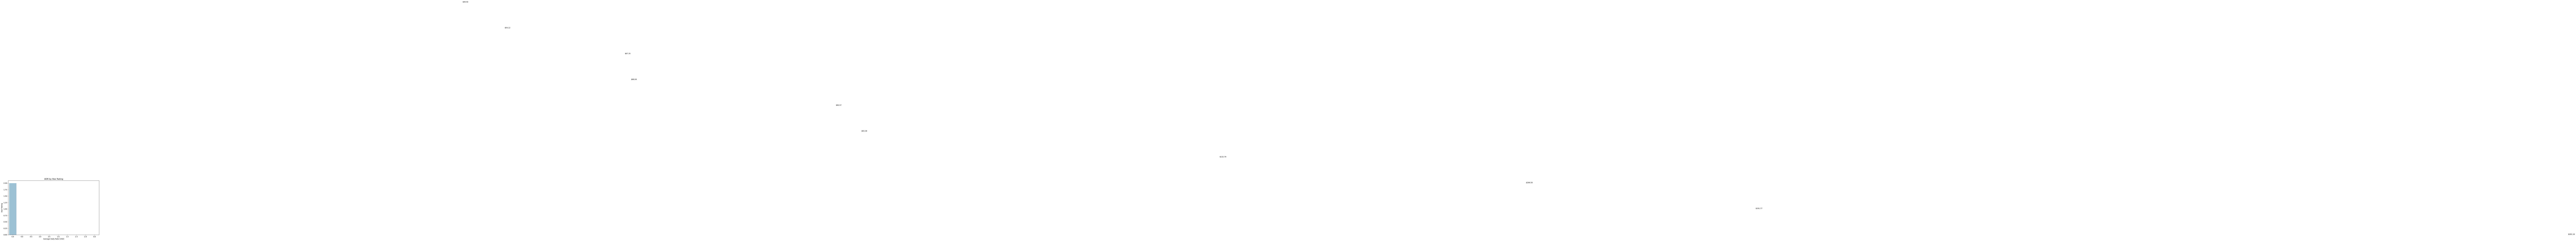

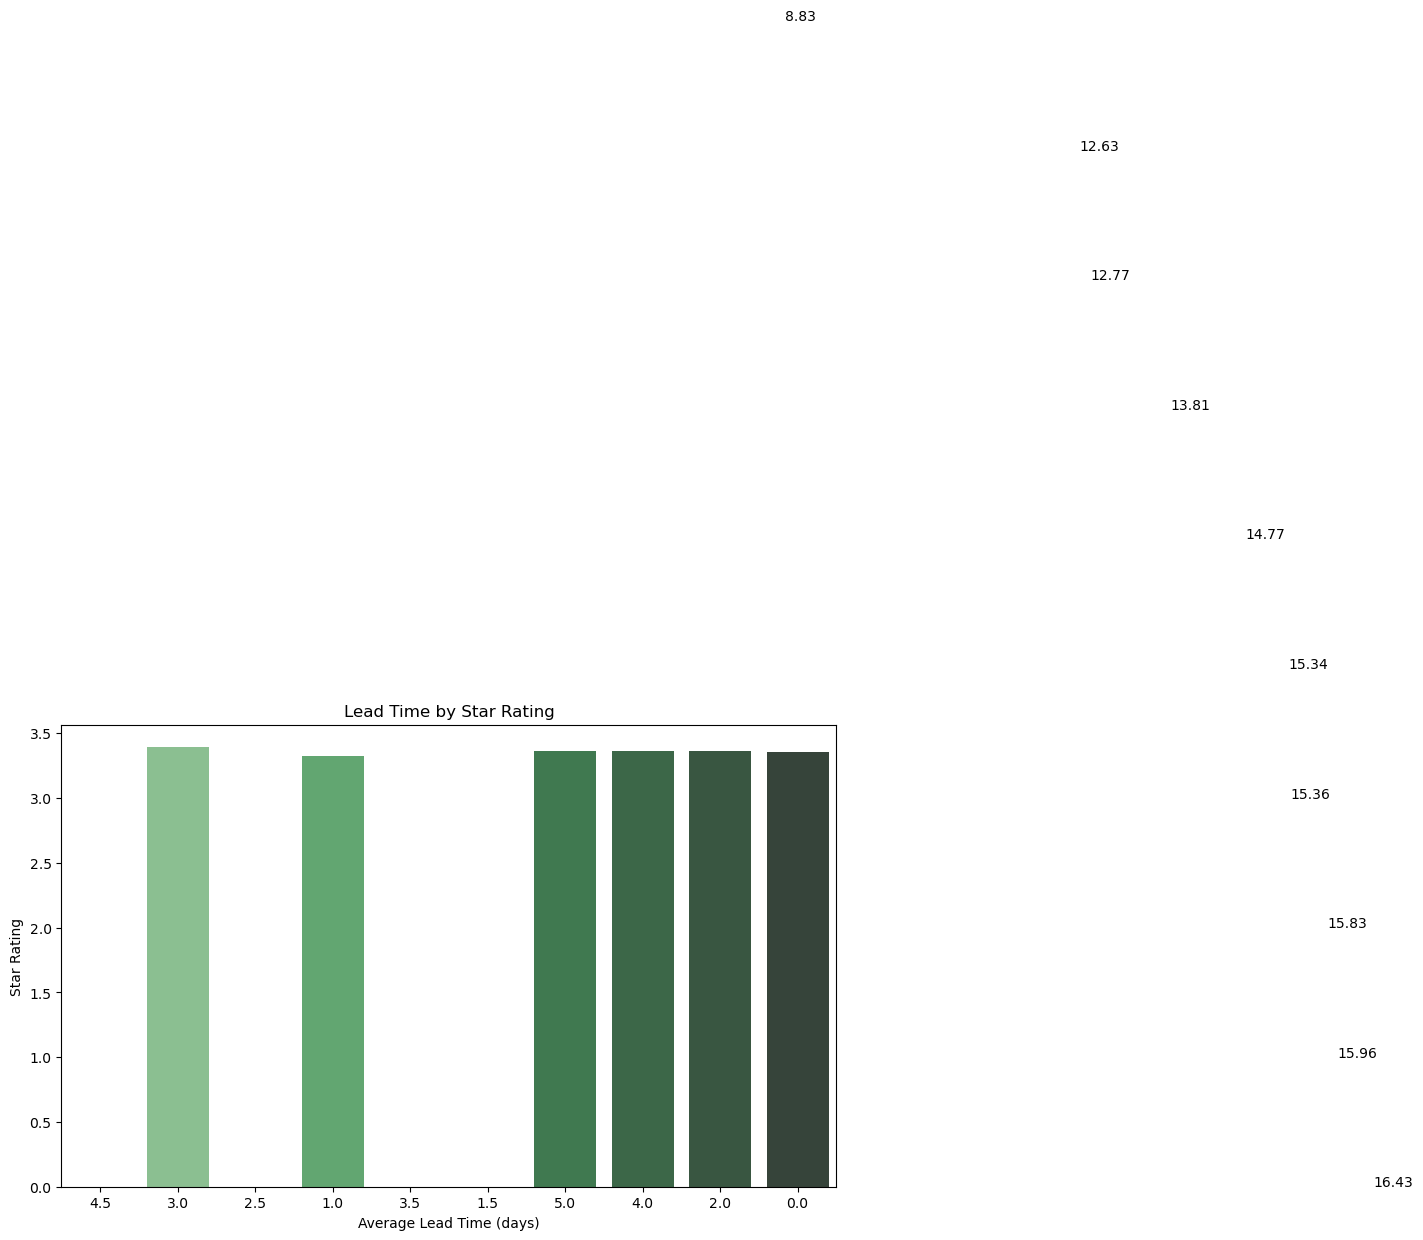

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ADR by Star Rating
plt.figure(figsize=(10, 6))
adr_order = df.groupby('star_rating')['ADR_USD'].mean().sort_values(ascending=False).index
sns.barplot(x='ADR_USD', y='star_rating', data=df, order=adr_order, errorbar=None, palette='Blues_d')
plt.title('ADR by Star Rating')
plt.xlabel('Average Daily Rate (USD)')
plt.ylabel('Star Rating')

# Add numbers at the end of bars
for index, value in enumerate(df.groupby('star_rating')['ADR_USD'].mean().sort_values(ascending=False)):
    plt.text(value, index, f'${value:.2f}')

plt.show()

# Lead Time by Star Rating
plt.figure(figsize=(10, 6))
lead_time_order = df.groupby('star_rating')['lead_time'].mean().sort_values(ascending=False).index
sns.barplot(x='lead_time', y='star_rating', data=df, order=lead_time_order, errorbar=None, palette='Greens_d')
plt.title('Lead Time by Star Rating')
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Star Rating')

# Add numbers at the end of bars
for index, value in enumerate(df.groupby('star_rating')['lead_time'].mean().sort_values(ascending=False)):
    plt.text(value, index, f'{value:.2f}')

plt.show()

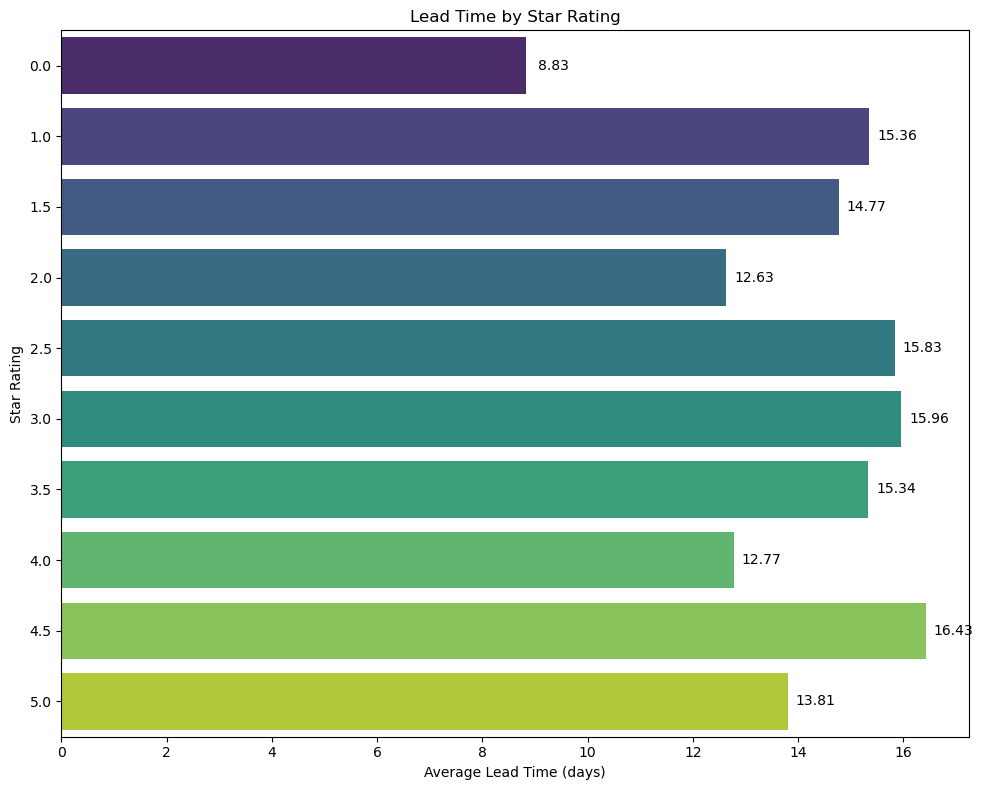

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is a DataFrame containing the 'star_rating' and 'lead_time' columns.

# Sort the data by 'star_rating' in descending order to display higher stars at the top
sorted_df = df.sort_values('star_rating', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bar_plot = sns.barplot(
    x='lead_time', 
    y='star_rating', 
    data=sorted_df, 
    errorbar= None,
    orient='h', 
    palette='viridis'
)

# Add the text with the value at the end of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.2f'), 
                      (p.get_width(), p.get_y() + p.get_height() / 2.), 
                      ha='center', va='center', 
                      xytext=(20, 0), 
                      textcoords='offset points')

plt.xlabel('Average Lead Time (days)')
plt.ylabel('Star Rating')
plt.title('Lead Time by Star Rating')
plt.tight_layout()  # Adjust the layout
plt.show()

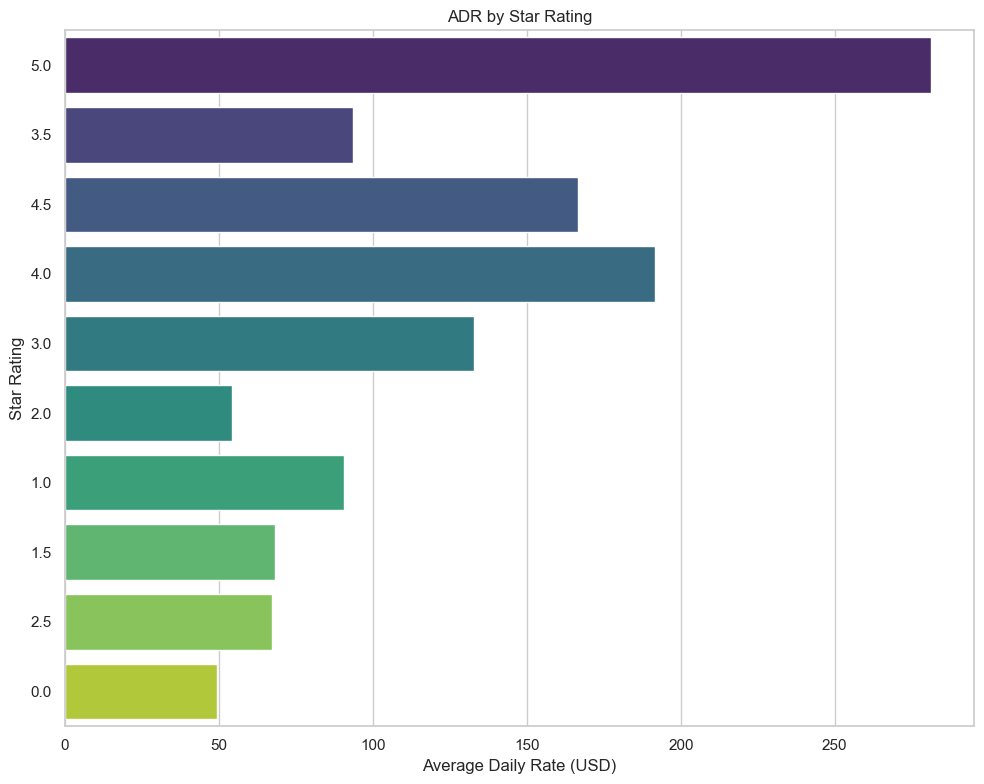

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sorted_df = df.sort_values('ADR_USD', ascending=False)

# Get the sorted order of star ratings based on ADR
sorted_star_rating = sorted_df['star_rating'].unique()

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    x='ADR_USD', 
    y='star_rating', 
    data=sorted_df,
    order=sorted_star_rating,
    errorbar= None,
    # Use the explicit order of star ratings
    orient='h', 
    palette='viridis'
)

bar_plot.errorbar = None

# Add the text with the value at the end of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.2f'), 
                      (p.get_width(), p.get_y() + p.get_height() / 2.), 
                      ha='center', va='center', 
                      xytext=(20, 0), 
                      textcoords='offset points')

plt.xlabel('Average Daily Rate (USD)')
plt.ylabel('Star Rating')
plt.title('ADR by Star Rating')
plt.tight_layout()  # Adjust the layout
plt.show()



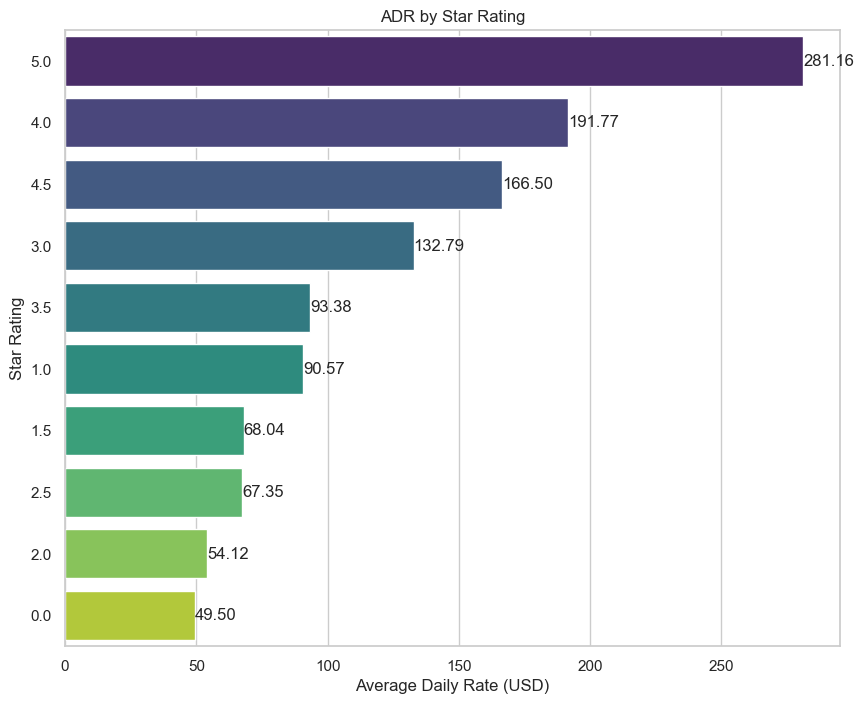

In [100]:
# Assuming df is your DataFrame and 'ADR_USD' and 'star_rating' are columns in your DataFrame.

# Sort the DataFrame by 'ADR_USD' in descending order
sorted_df = df.sort_values('ADR_USD', ascending=False)

# Get the sorted order of 'star_rating' according to 'ADR_USD'
# This will give us the order of the 'star_rating' by the mean 'ADR_USD'
sorted_order = sorted_df.groupby('star_rating')['ADR_USD'].mean().sort_values(ascending=False).index

# Create the barplot with the sorted order of 'star_rating'
plt.figure(figsize=(10, 8))
sns.barplot(
    x='ADR_USD',
    y='star_rating',
    data=sorted_df,
    order=sorted_order,
    errorbar= None,
    # Use the sorted_order for 'y' values
    orient='h',
    palette='viridis'
)

# Add value labels to each bar
for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
             ha='left', va='center')

# Set the labels and title
plt.xlabel('Average Daily Rate (USD)')
plt.ylabel('Star Rating')
plt.title('ADR by Star Rating')

# Show the plot
plt.show()

In [97]:
adr_agg_sorted = adr_agg.sort_values('ADR_USD', ascending=False)

# Create a horizontal bar chart for ADR by Accommodation Type
plt.figure(figsize=(10, 8))
sns.barplot(x='ADR_USD', y='star_rating', data=adr_agg_sorted, color='skyblue')
plt.title('ADR by Accommodation Type', fontsize=16)
plt.xlabel('Average Daily Rate (USD)', fontsize=14)
plt.ylabel('star rating', fontsize=14)

# Add numbers at the end of bars
for index, value in enumerate(adr_agg_sorted['ADR_USD']):
    plt.text(value, index, f'{value:.2f}')

plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'star_rating'

<Figure size 1000x800 with 0 Axes>

In [98]:
df['star_rating']

5467     5.0
5942     5.0
4917     5.0
5466     5.0
5927     5.0
        ... 
17213    2.0
22009    2.0
22187    2.0
21584    2.0
17799    2.0
Name: star_rating, Length: 49064, dtype: float64

In [69]:
df.sort_values(by='ADR_USD', ascending=False, inplace=True)

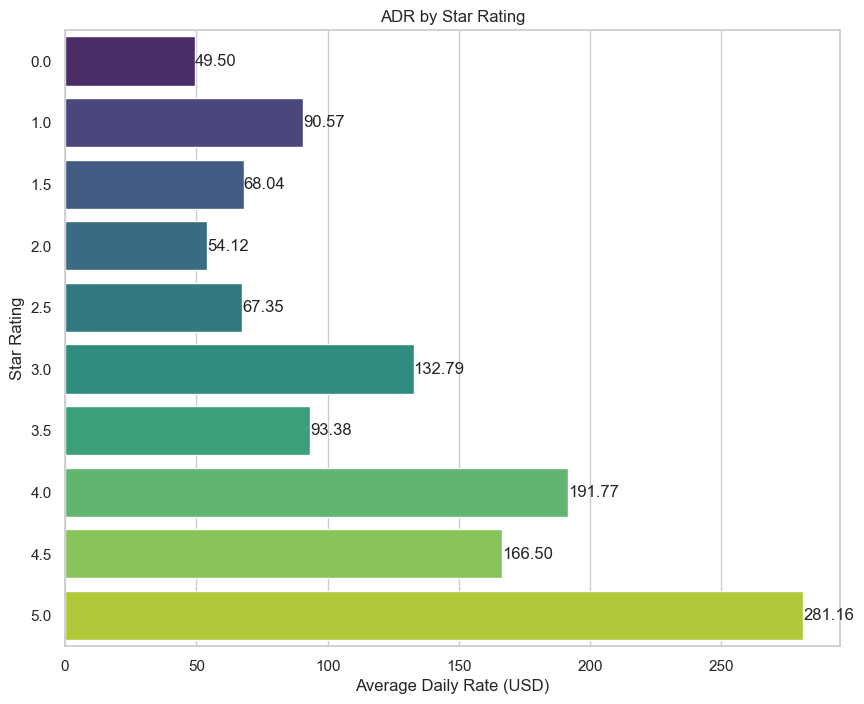

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Plotting the bar chart
ax = sns.barplot(
    x='ADR_USD', 
    y='star_rating', 
    data=df,
    errorbar= None,
    palette='viridis',
    orient='h'
)

# Remove the error bars
ax.errorbar = None

# Adding the data labels
for bar in ax.patches:
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.2f}',
        va='center'
    )

# Set labels and title
plt.xlabel('Average Daily Rate (USD)')
plt.ylabel('Star Rating')
plt.title('ADR by Star Rating')

plt.show()

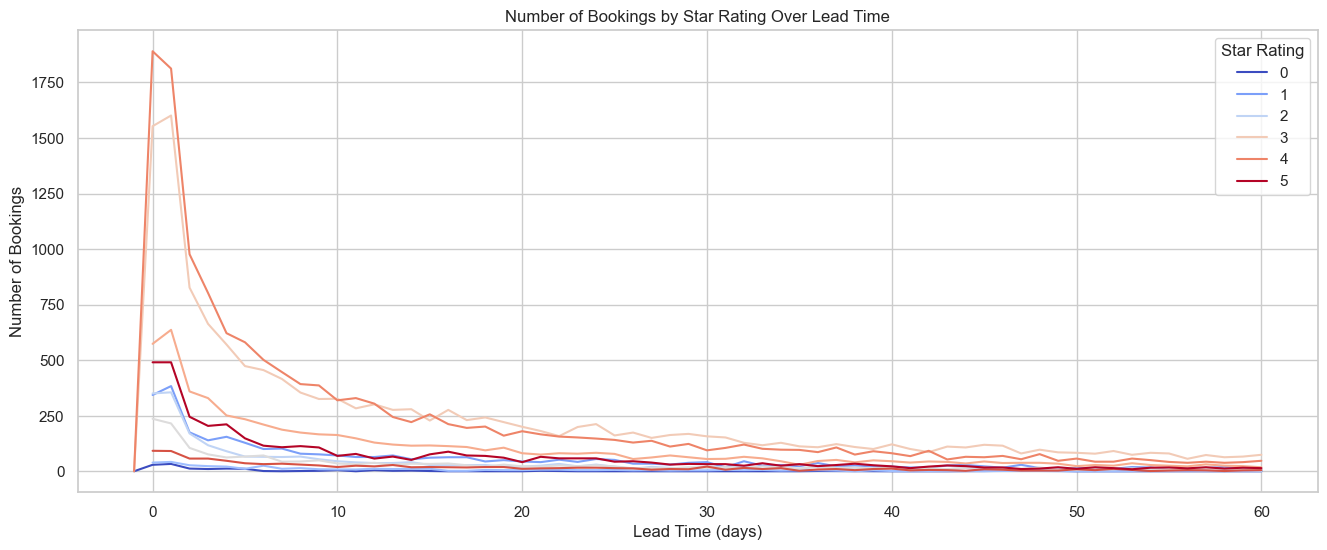

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'df' contains individual booking entries
# We'll group by 'star_rating' and 'lead_time' to count bookings
number_of_bookings = df.groupby(['star_rating', 'lead_time']).size().reset_index(name='number_of_bookings')

# Now, create a line plot for number of bookings by star rating and lead time
plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='number_of_bookings', hue='star_rating', data=number_of_bookings, estimator='sum', palette='coolwarm')
plt.title('Number of Bookings by Star Rating Over Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.legend(title='Star Rating')
plt.show()


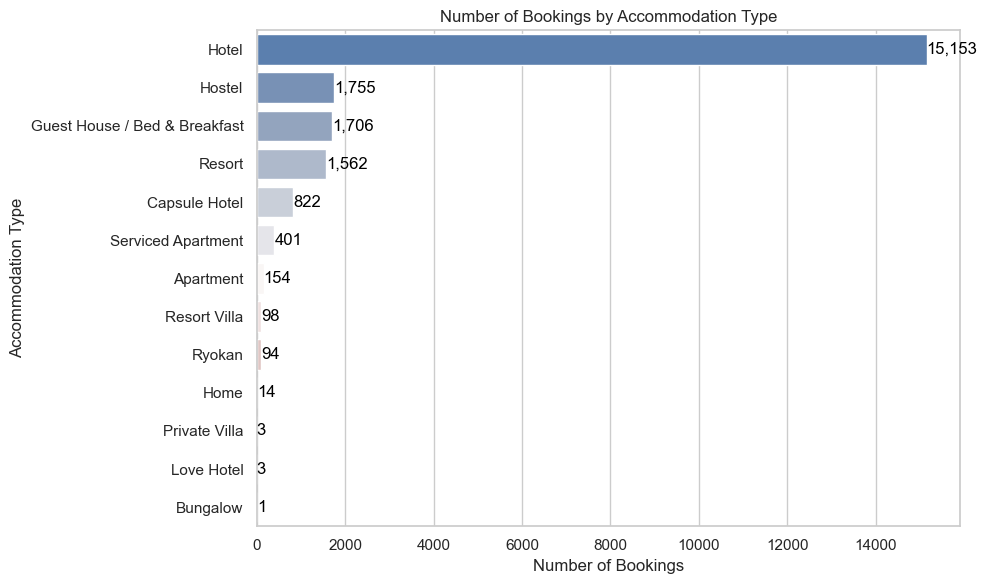

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace this with your DataFrame name
# df should have 'accommodation_type_name' and 'booking_id' columns
# where 'booking_id' is a unique identifier for each booking

# Calculate the number of bookings for each accommodation type
booking_counts = df['accommodation_type_name'].value_counts().reset_index()
booking_counts.columns = ['accommodation_type_name', 'number_of_bookings']

# Sort the DataFrame based on the number of bookings to have the bar plot in descending order
booking_counts = booking_counts.sort_values('number_of_bookings', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='number_of_bookings', 
    y='accommodation_type_name', 
    data=booking_counts,
    palette="vlag"
)

# Add the text with the value at the end of each bar
for index, row in booking_counts.iterrows():
    plt.text(
        row['number_of_bookings'],
        index,
        # Format the number with comma separators
        f'{row["number_of_bookings"]:,}',
        color='black',
        ha="left",
        va="center"
    )

plt.xlabel('Number of Bookings')
plt.ylabel('Accommodation Type')
plt.title('Number of Bookings by Accommodation Type')
plt.tight_layout()
plt.show()

In [74]:
df

#  ADR_USD  hotel_id  city_id  star_rating accommadation_type_name  \
5467    5468  3156.86    102982     5085          5.0                     NaN   
5942    5943  2645.98    102982     5085          5.0                     NaN   
4917    4918  2533.62    102982     5085          5.0                     NaN   
5466    5467  2519.60    102982     5085          5.0                     NaN   
5927    5928  2505.92    102982     5085          5.0                     NaN   
...      ...      ...       ...      ...          ...                     ...   
17213  17214     5.00    582528     9395          2.0                   Hotel   
22009  22010     4.64    582528     9395          2.0                   Hotel   
22187  22188     4.62    582528     9395          2.0                   Hotel   
21584  21585     4.62    582528     9395          2.0                   Hotel   
17799  17800     4.26    582528     9395          2.0                   Hotel   

      chain_hotel booking_date checkin_date checkout_date day_of_week  \
5467        chain   2016-11-26   2016-12-24    2016-12-25         NaN   
5942        chain   2016-12-05   2016-12-24    2016-12-25         NaN   
4917        chain   2016-11-17   2016-12-30    2016-12-31         NaN   
5466        chain   2016-11-26   2016-12-24    2016-12-25         NaN   
5927        chain   2016-12-05   2016-12-23    2016-12-25         NaN   
...           ...          ...          ...           ...         ...   
17213   non-chain   2016-11-29   2016-12-01    2016-12-03     Tuesday   
22009   non-chain   2016-12-27   2016-12-27    2016-12-28     Tuesday   
22187   non-chain   2016-12-29   2016-12-31    2017-01-01    Thursday   
21584   non-chain   2016-12-23   2016-12-24    2016-12-25      Friday   
17799   non-chain   2016-12-02   2016-12-02    2016-12-03      Friday   

          month  lead_time  checkin_week accommodation_type_name  \
5467        NaN         28           NaN                   Hotel   
5942        NaN         19           NaN                   Hotel   
4917        NaN         43           NaN                   Hotel   
5466        NaN         28           NaN                   Hotel   
5927        NaN         18           NaN                   Hotel   
...         ...        ...           ...                     ...   
17213  November          2          48.0                     NaN   
22009  December          0          52.0                     NaN   
22187  December          2          52.0                     NaN   
21584  December          1          51.0                     NaN   
17799  December          0          48.0                     NaN   

         LeadTimeBucket  
5467         15-30 Days  
5942         15-30 Days  
4917       More than 30  
5466         15-30 Days  
5927         15-30 Days  
...                 ...  
17213          1-5 Days  
22009  Same Day Checkin  
22187          1-5 Days  
21584          1-5 Days  
17799  Same Day Checkin  

[49064 rows x 16 columns]

In [ ]:
#correlation between Number of Bookings and ADR

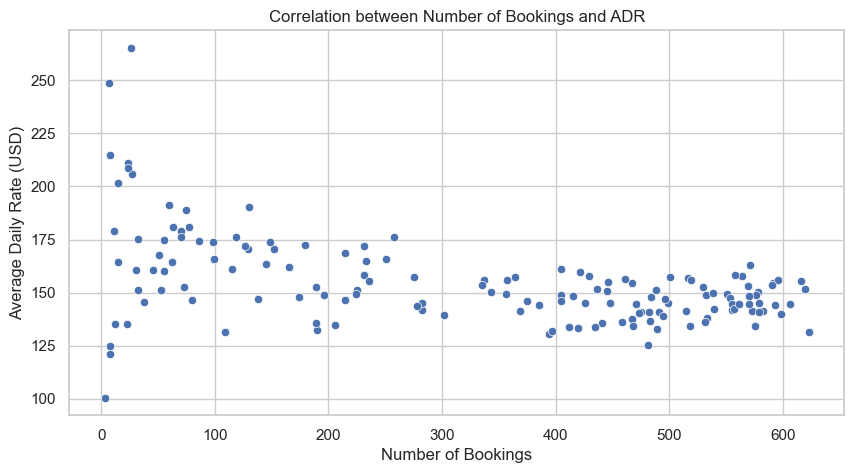

The Pearson correlation coefficient between number of bookings and ADR is: -0.3955505458854146


In [76]:
# Calculate daily booking counts
daily_bookings_all = df['booking_date'].value_counts().sort_index()

# Calculate daily ADR average
daily_adr_avg_all = df.groupby('booking_date')['ADR_USD'].mean()

# Merge both series into a dataframe for correlation analysis
correlation_df_all = pd.concat([daily_bookings_all, daily_adr_avg_all], axis=1)
correlation_df_all.columns = ['bookings_all', 'average_adr_all']

# Plot and calculate correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='bookings_all', y='average_adr_all', data=correlation_df_all)
plt.title('Correlation between Number of Bookings and ADR')
plt.xlabel('Number of Bookings')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient_all = correlation_df_all.corr().iloc[0, 1]
print(f'The Pearson correlation coefficient between number of bookings and ADR is: {correlation_coefficient}')

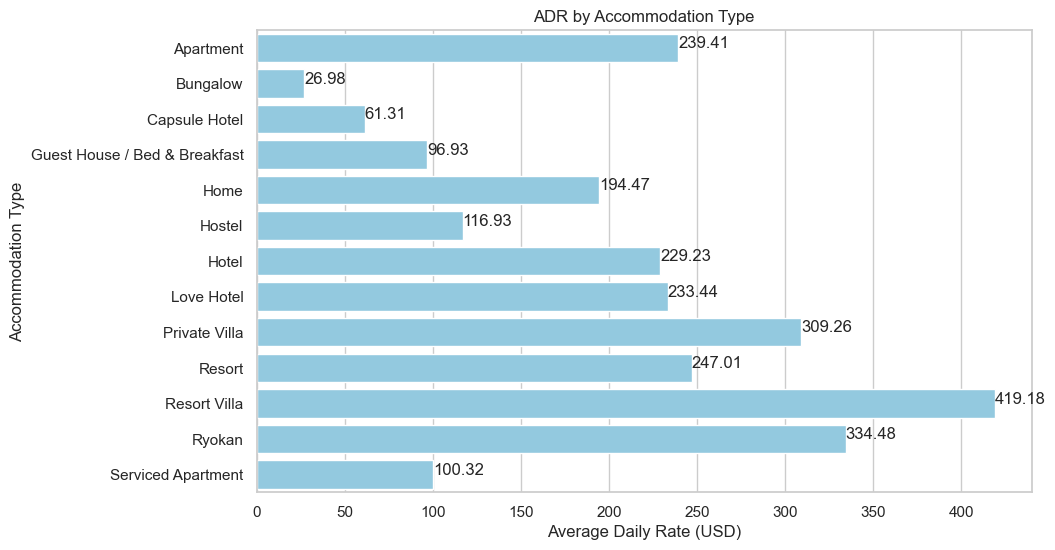

In [88]:
# Aggregate data
sorted_df = df.sort_values('ADR_USD', ascending=False)
adr_agg = sorted_df.groupby('accommodation_type_name')['ADR_USD'].mean().reset_index()

# Create horizontal bar chart for ADR by Accommodation Type
plt.figure(figsize=(10, 6))
sns.barplot(x='ADR_USD', y='accommodation_type_name', data=adr_agg, color='skyblue')
plt.title('ADR by Accommodation Type')
plt.xlabel('Average Daily Rate (USD)')
plt.ylabel('Accommodation Type')

# Add numbers at the end of bars
for index, value in enumerate(adr_agg['ADR_USD']):
    plt.text(value, index, f'{value:.2f}')

plt.show()

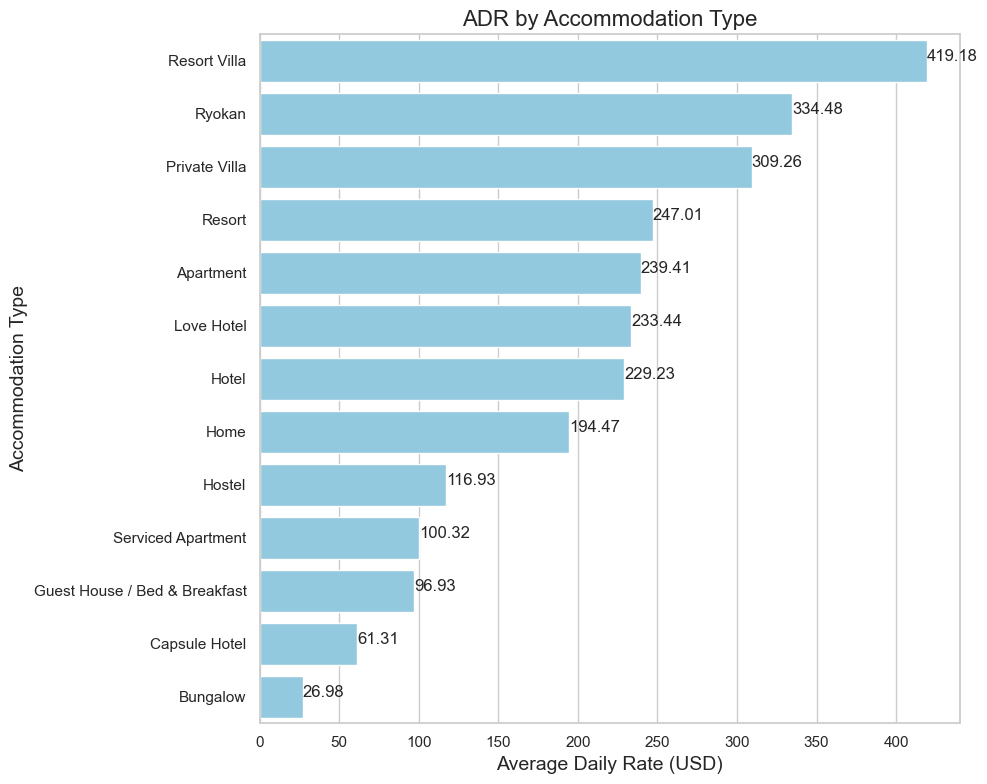

In [89]:
adr_agg_sorted = adr_agg.sort_values('ADR_USD', ascending=False)

# Create a horizontal bar chart for ADR by Accommodation Type
plt.figure(figsize=(10, 8))
sns.barplot(x='ADR_USD', y='accommodation_type_name', data=adr_agg_sorted, color='skyblue')
plt.title('ADR by Accommodation Type', fontsize=16)
plt.xlabel('Average Daily Rate (USD)', fontsize=14)
plt.ylabel('Accommodation Type', fontsize=14)

# Add numbers at the end of bars
for index, value in enumerate(adr_agg_sorted['ADR_USD']):
    plt.text(value, index, f'{value:.2f}')

plt.tight_layout()
plt.show()

In [79]:
sorted_df

#  ADR_USD  hotel_id  city_id  star_rating accommadation_type_name  \
5467    5468  3156.86    102982     5085          5.0                     NaN   
5942    5943  2645.98    102982     5085          5.0                     NaN   
4917    4918  2533.62    102982     5085          5.0                     NaN   
5466    5467  2519.60    102982     5085          5.0                     NaN   
5927    5928  2505.92    102982     5085          5.0                     NaN   
...      ...      ...       ...      ...          ...                     ...   
17213  17214     5.00    582528     9395          2.0                   Hotel   
22009  22010     4.64    582528     9395          2.0                   Hotel   
22187  22188     4.62    582528     9395          2.0                   Hotel   
21584  21585     4.62    582528     9395          2.0                   Hotel   
17799  17800     4.26    582528     9395          2.0                   Hotel   

      chain_hotel booking_date checkin_date checkout_date day_of_week  \
5467        chain   2016-11-26   2016-12-24    2016-12-25         NaN   
5942        chain   2016-12-05   2016-12-24    2016-12-25         NaN   
4917        chain   2016-11-17   2016-12-30    2016-12-31         NaN   
5466        chain   2016-11-26   2016-12-24    2016-12-25         NaN   
5927        chain   2016-12-05   2016-12-23    2016-12-25         NaN   
...           ...          ...          ...           ...         ...   
17213   non-chain   2016-11-29   2016-12-01    2016-12-03     Tuesday   
22009   non-chain   2016-12-27   2016-12-27    2016-12-28     Tuesday   
22187   non-chain   2016-12-29   2016-12-31    2017-01-01    Thursday   
21584   non-chain   2016-12-23   2016-12-24    2016-12-25      Friday   
17799   non-chain   2016-12-02   2016-12-02    2016-12-03      Friday   

          month  lead_time  checkin_week accommodation_type_name  \
5467        NaN         28           NaN                   Hotel   
5942        NaN         19           NaN                   Hotel   
4917        NaN         43           NaN                   Hotel   
5466        NaN         28           NaN                   Hotel   
5927        NaN         18           NaN                   Hotel   
...         ...        ...           ...                     ...   
17213  November          2          48.0                     NaN   
22009  December          0          52.0                     NaN   
22187  December          2          52.0                     NaN   
21584  December          1          51.0                     NaN   
17799  December          0          48.0                     NaN   

         LeadTimeBucket  
5467         15-30 Days  
5942         15-30 Days  
4917       More than 30  
5466         15-30 Days  
5927         15-30 Days  
...                 ...  
17213          1-5 Days  
22009  Same Day Checkin  
22187          1-5 Days  
21584          1-5 Days  
17799  Same Day Checkin  

[49064 rows x 16 columns]

In [ ]:
## ADR by hotel type and lead time for all cities

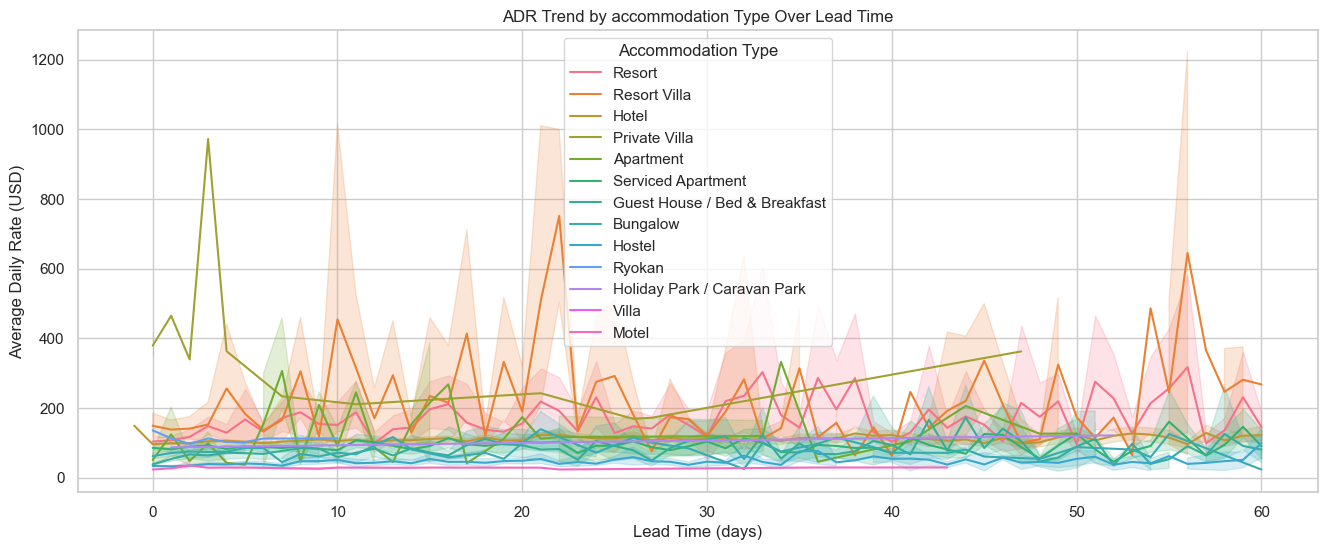

In [82]:
# ADR by hotel type and lead time
plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='ADR_USD', hue='accommadation_type_name', data=df)
plt.title('ADR Trend by accommodation Type Over Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.legend(title='Accommodation Type')
plt.show()

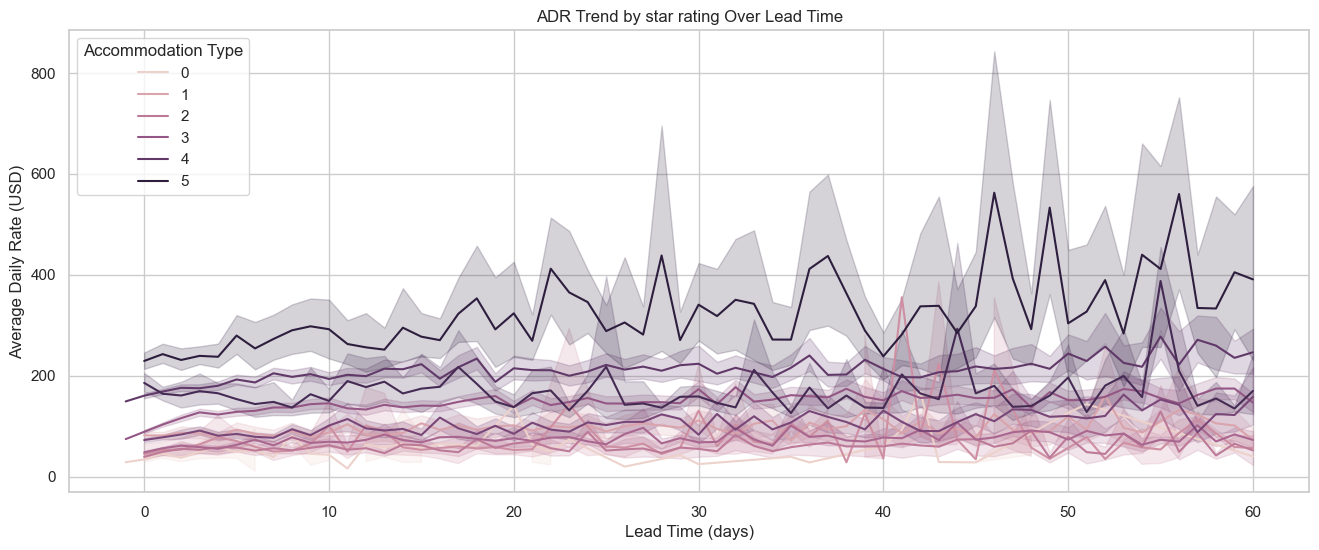

In [84]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='lead_time', y='ADR_USD', hue='star_rating', data=df)
plt.title('ADR Trend by star rating Over Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (USD)')
plt.legend(title='Accommodation Type')
plt.show()

In [103]:
import pandas as pd

# Assuming `df` is your DataFrame and it has 'booking_date', 'checkin_date', and 'accommodation_type_name' columns.



# Use pd.cut to assign bins

# Aggregate the number of bookings per accommodation type and lead time bucket
booking_counts = df.groupby(['accommodation_type_name', 'LeadTimeBucket']).size().reset_index(name='number_of_bookings')

# Pivot the data to get the desired table format
pivot_table = booking_counts.pivot(index='accommodation_type_name', columns='LeadTimeBucket', values='number_of_bookings')

# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)

# Convert to integers if all values are floats but represent whole numbers
pivot_table = pivot_table.astype(int)

# Print the pivot table
print(pivot_table)


LeadTimeBucket                 Same Day Checkin  1-5 Days  5-15 Days  \
accommodation_type_name                                                
Apartment                                     7        20         49   
Bungalow                                      1         0          0   
Capsule Hotel                                56       172        220   
Guest House / Bed & Breakfast               197       459        417   
Home                                          2         3          3   
Hostel                                      123       376        410   
Hotel                                      1245      3483       4048   
Love Hotel                                    0         0          2   
Private Villa                                 0         0          0   
Resort                                      228       505        372   
Resort Villa                                  8        30         19   
Ryokan                                        1        10       

In [104]:
pivot_table

LeadTimeBucket                 Same Day Checkin  1-5 Days  5-15 Days  \
accommodation_type_name                                                
Apartment                                     7        20         49   
Bungalow                                      1         0          0   
Capsule Hotel                                56       172        220   
Guest House / Bed & Breakfast               197       459        417   
Home                                          2         3          3   
Hostel                                      123       376        410   
Hotel                                      1245      3483       4048   
Love Hotel                                    0         0          2   
Private Villa                                 0         0          0   
Resort                                      228       505        372   
Resort Villa                                  8        30         19   
Ryokan                                        1        10         15   
Serviced Apartment                           91       130         60   

LeadTimeBucket                 15-30 Days  More than 30  
accommodation_type_name                                  
Apartment                              40            38  
Bungalow                                0             0  
Capsule Hotel                         192           182  
Guest House / Bed & Breakfast         341           291  
Home                                    5             1  
Hostel                                400           446  
Hotel                                3169          3207  
Love Hotel                              0             1  
Private Villa                           1             2  
Resort                                264           193  
Resort Villa                           22            19  
Ryokan                                 35            33  
Serviced Apartment                     58            62

In [ ]:
# Categorize 'lead_time' into buckets

bins = [0, 1, 5, 15, 30, float('inf')]
labels = ['Same Day Checkin', '1-5 Days', '5-15 Days', '15-30 Days', 'More than 30']
df = pd.concat([df_cityA, df_cityB, df_cityC, df_cityD, df_cityE])
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Calculate the mean ADR for each bucket for each city
lead_time_bucket_adr = df.groupby(['city_id', 'LeadTimeBucket'])['ADR_USD'].mean().unstack()

# Transpose the dataframe to get cities as columns and lead time buckets as rows
lead_time_bucket_adr = lead_time_bucket_adr.T

# Plotting the bar chart
lead_time_bucket_adr.plot(kind='bar', figsize=(14, 7))

# Add titles and labels
plt.title('Lead Time Bucket ADR by City')
plt.xlabel('Lead Time Bucket')
plt.ylabel('Average Daily Rate (USD)')
plt.xticks(rotation=45)
plt.legend(title='City ID')

# Show the plot
plt.tight_layout()
plt.show()

In [102]:
labels

['Same Day Checkin', '1-5 Days', '5-15 Days', '15-30 Days', 'More than 30']

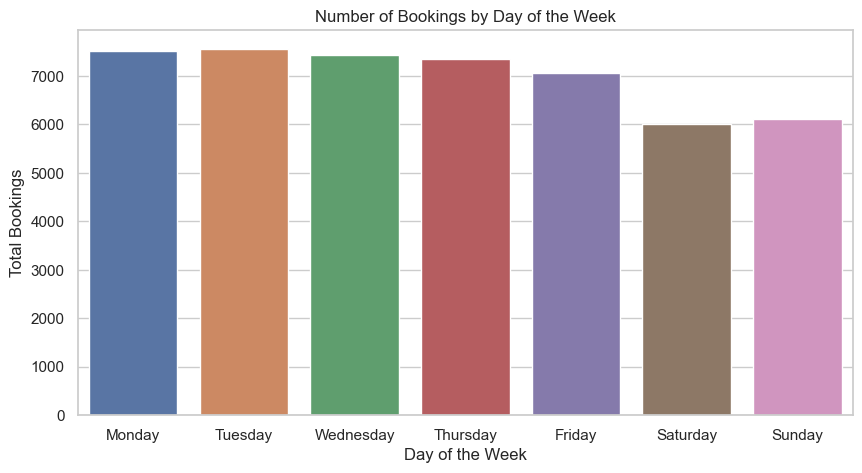

In [107]:
df['day_of_week'] = df['booking_date'].dt.day_name()

# Plot the number of bookings for each day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Bookings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bookings')
plt.show()

In [106]:
df['booking_date']

5467    2016-11-26
5942    2016-12-05
4917    2016-11-17
5466    2016-11-26
5927    2016-12-05
           ...    
17213   2016-11-29
22009   2016-12-27
22187   2016-12-29
21584   2016-12-23
17799   2016-12-02
Name: booking_date, Length: 49064, dtype: datetime64[ns]

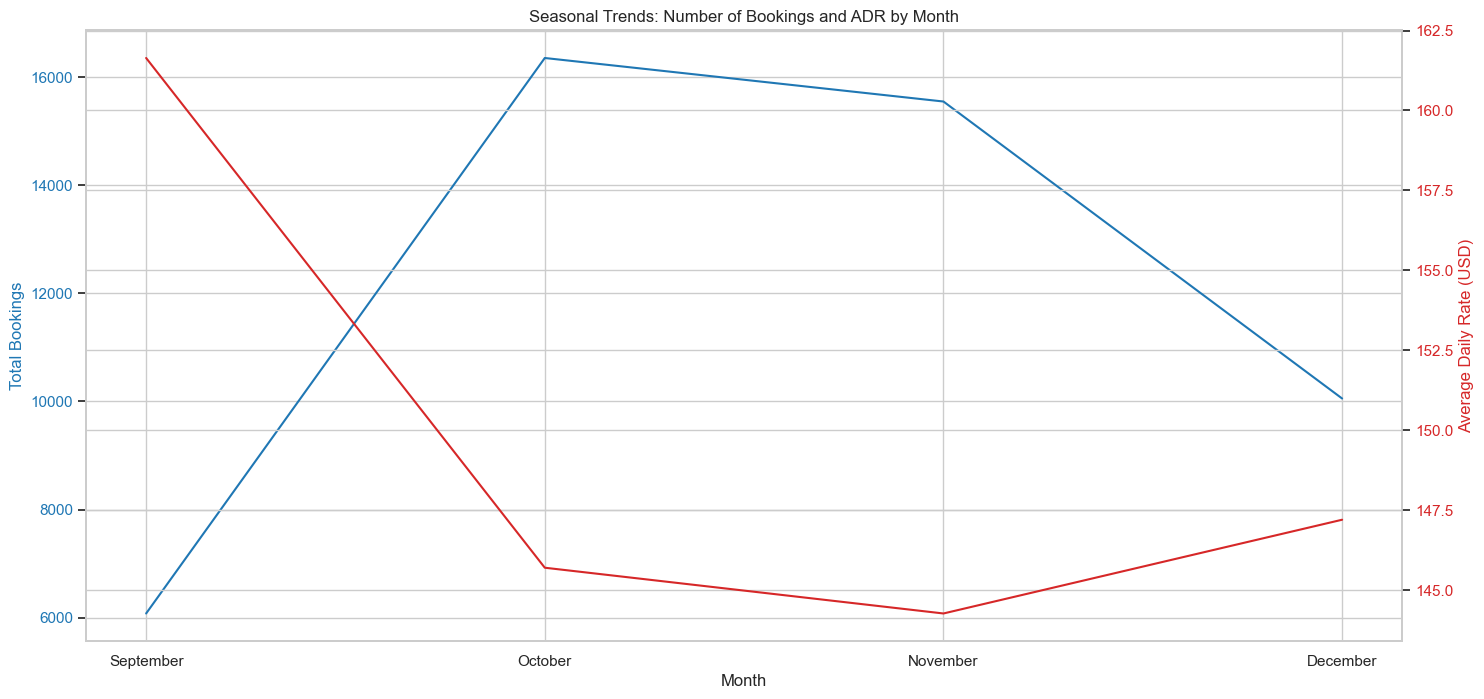

In [108]:
# Extract month from the booking date and add it as a new column
df['month'] = df['booking_date'].dt.month_name()

# Plot the number of bookings and ADR by month
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the number of bookings
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Bookings', color=color)
ax1.plot(df.groupby('month')['#'].count().reindex(['September','October', 'November', 'December']), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plotting the ADR
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(df.groupby('month')['ADR_USD'].mean().reindex(['September','October', 'November', 'December']), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Seasonal Trends: Number of Bookings and ADR by Month')
plt.show()

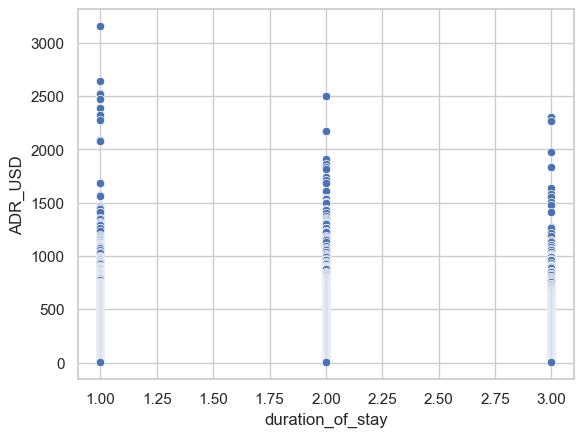

The correlation between duration of stay and ADR is: 0.07273879953366148
  lead_time_bucket           level_1  lead_time
0         Same day  duration_of_stay        NaN
1           2 days  duration_of_stay   0.019121
2           5 days  duration_of_stay   0.001499
3          10 days  duration_of_stay   0.024350
Hotel                            7854
Guest House / Bed & Breakfast     839
Hostel                            833
Resort                            525
Capsule Hotel                     275
Serviced Apartment                192
Apartment                          98
Resort Villa                       32
Ryokan                             32
Home                                3
Private Villa                       2
Love Hotel                          1
Name: accommodation_type_name, dtype: int64
Average lead time for multiple-day bookings: 17.375120177235296
Average lead time for single-day bookings: 11.82168569269321


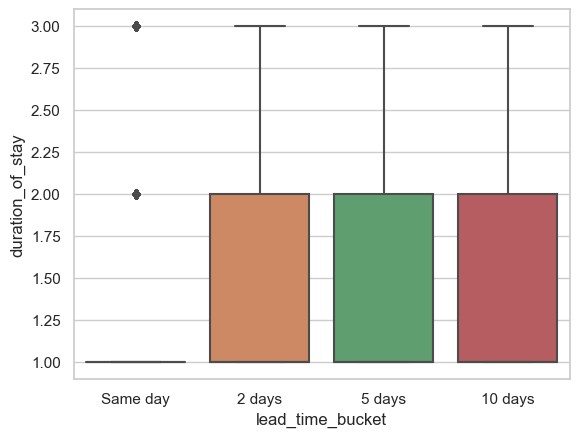

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame with the necessary columns.

# Convert dates to datetime if not already done
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df['checkout_date'] = pd.to_datetime(df['checkout_date'])

# Calculate Duration of Stay
df['duration_of_stay'] = (df['checkout_date'] - df['checkin_date']).dt.days

# 1. Relation between duration of stay and ADR
sns.scatterplot(data=df, x='duration_of_stay', y='ADR_USD')
plt.show()

correlation = df[['duration_of_stay', 'ADR_USD']].corr().iloc[0,1]
print(f"The correlation between duration of stay and ADR is: {correlation}")

# 2. Correlation between Duration of Stay and Lead Time
df['lead_time_bucket'] = pd.cut(df['lead_time'], bins=[-1, 0, 2, 5, 10], right=True, labels=['Same day', '2 days', '5 days', '10 days'])
correlation_by_lead_time = df.groupby('lead_time_bucket')[['duration_of_stay', 'lead_time']].corr().iloc[0::2,-1].reset_index()
print(correlation_by_lead_time)

# 3. Accommodation Types with Most Multiple-Day Bookings
multi_day_bookings = df[df['duration_of_stay'] > 1]
count_multi_day_bookings = multi_day_bookings['accommodation_type_name'].value_counts()
print(count_multi_day_bookings)

# 4. Impact of Multiple-Day Bookings on Booking Time
multi_day_lead_time = multi_day_bookings['lead_time'].mean()
single_day_lead_time = df[df['duration_of_stay'] == 1]['lead_time'].mean()
print(f"Average lead time for multiple-day bookings: {multi_day_lead_time}")
print(f"Average lead time for single-day bookings: {single_day_lead_time}")

# Visualizing the impact of duration of stay on booking time
sns.boxplot(data=df, x='lead_time_bucket', y='duration_of_stay')
plt.show()


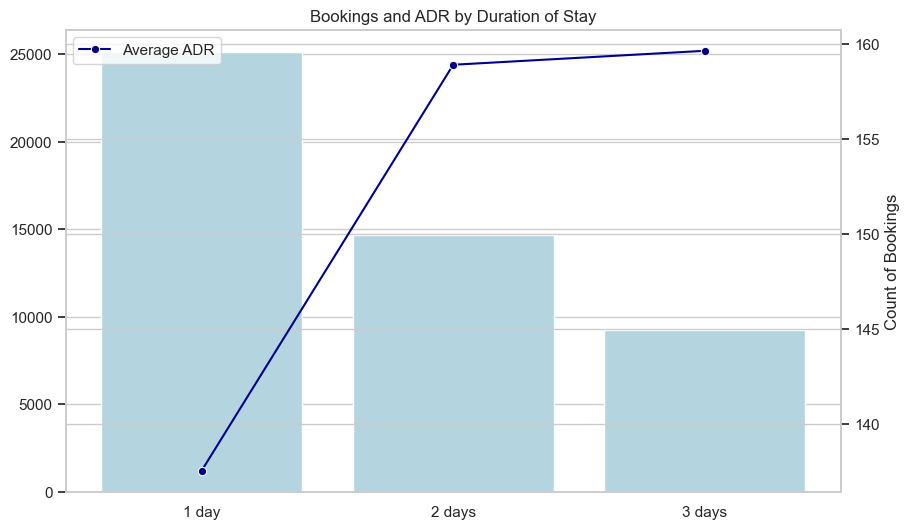

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation

# Categorize duration of stay
def categorize_duration(days):
    if days == 1:
        return '1 day'
    elif days == 2:
        return '2 days'
    elif days == 3:
        return '3 days'
    else:
        return '3+ days'

df['duration_category'] = df['duration_of_stay'].apply(categorize_duration)

# Count of Bookings by Duration of Stay
duration_counts = df['duration_category'].value_counts().sort_index()

# Average ADR by Duration of Stay
average_adr = df.groupby('duration_category')['ADR_USD'].mean().sort_index()

# Visualization
plt.figure(figsize=(10, 6))

# Bar chart for count of bookings by duration of stay
sns.barplot(x=duration_counts.index, y=duration_counts.values, color='lightblue', label='Count of Bookings')

# Secondary y-axis for average ADR
ax2 = plt.twinx()
sns.lineplot(x=average_adr.index, y=average_adr.values, marker='o', color='darkblue', ax=ax2, label='Average ADR')

plt.title('Bookings and ADR by Duration of Stay')
ax2.set_ylabel('Average ADR (USD)')
plt.ylabel('Count of Bookings')
plt.legend(loc='upper left')

plt.show()


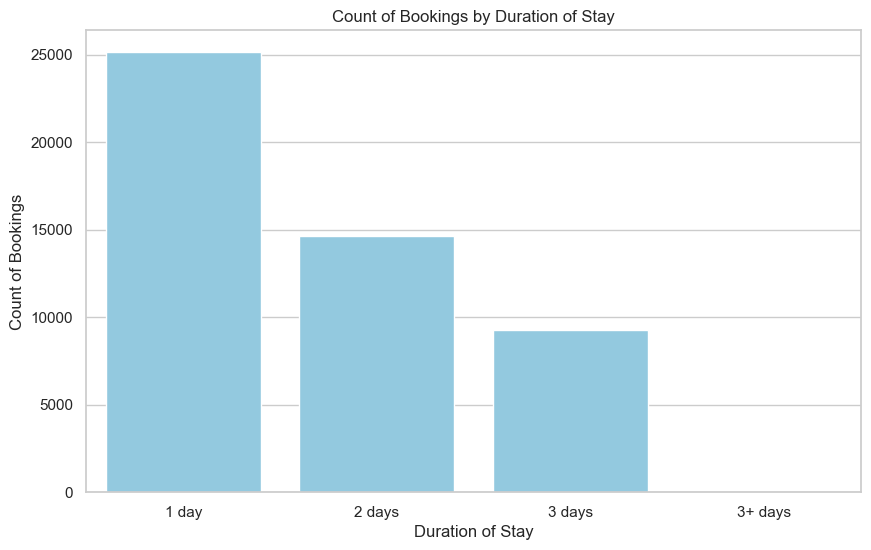

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it already has 'duration_category' column
# with the values '1 day', '2 days', '3 days', and '3+ days'

# Count of Bookings by Duration of Stay
duration_counts = df['duration_category'].value_counts().reindex(['1 day', '2 days', '3 days', '3+ days'])

# Visualization
plt.figure(figsize=(10, 6))

# Bar chart for count of bookings by duration of stay
sns.barplot(x=duration_counts.index, y=duration_counts.values, color='skyblue')

plt.title('Count of Bookings by Duration of Stay')
plt.ylabel('Count of Bookings')
plt.xlabel('Duration of Stay')

plt.show()


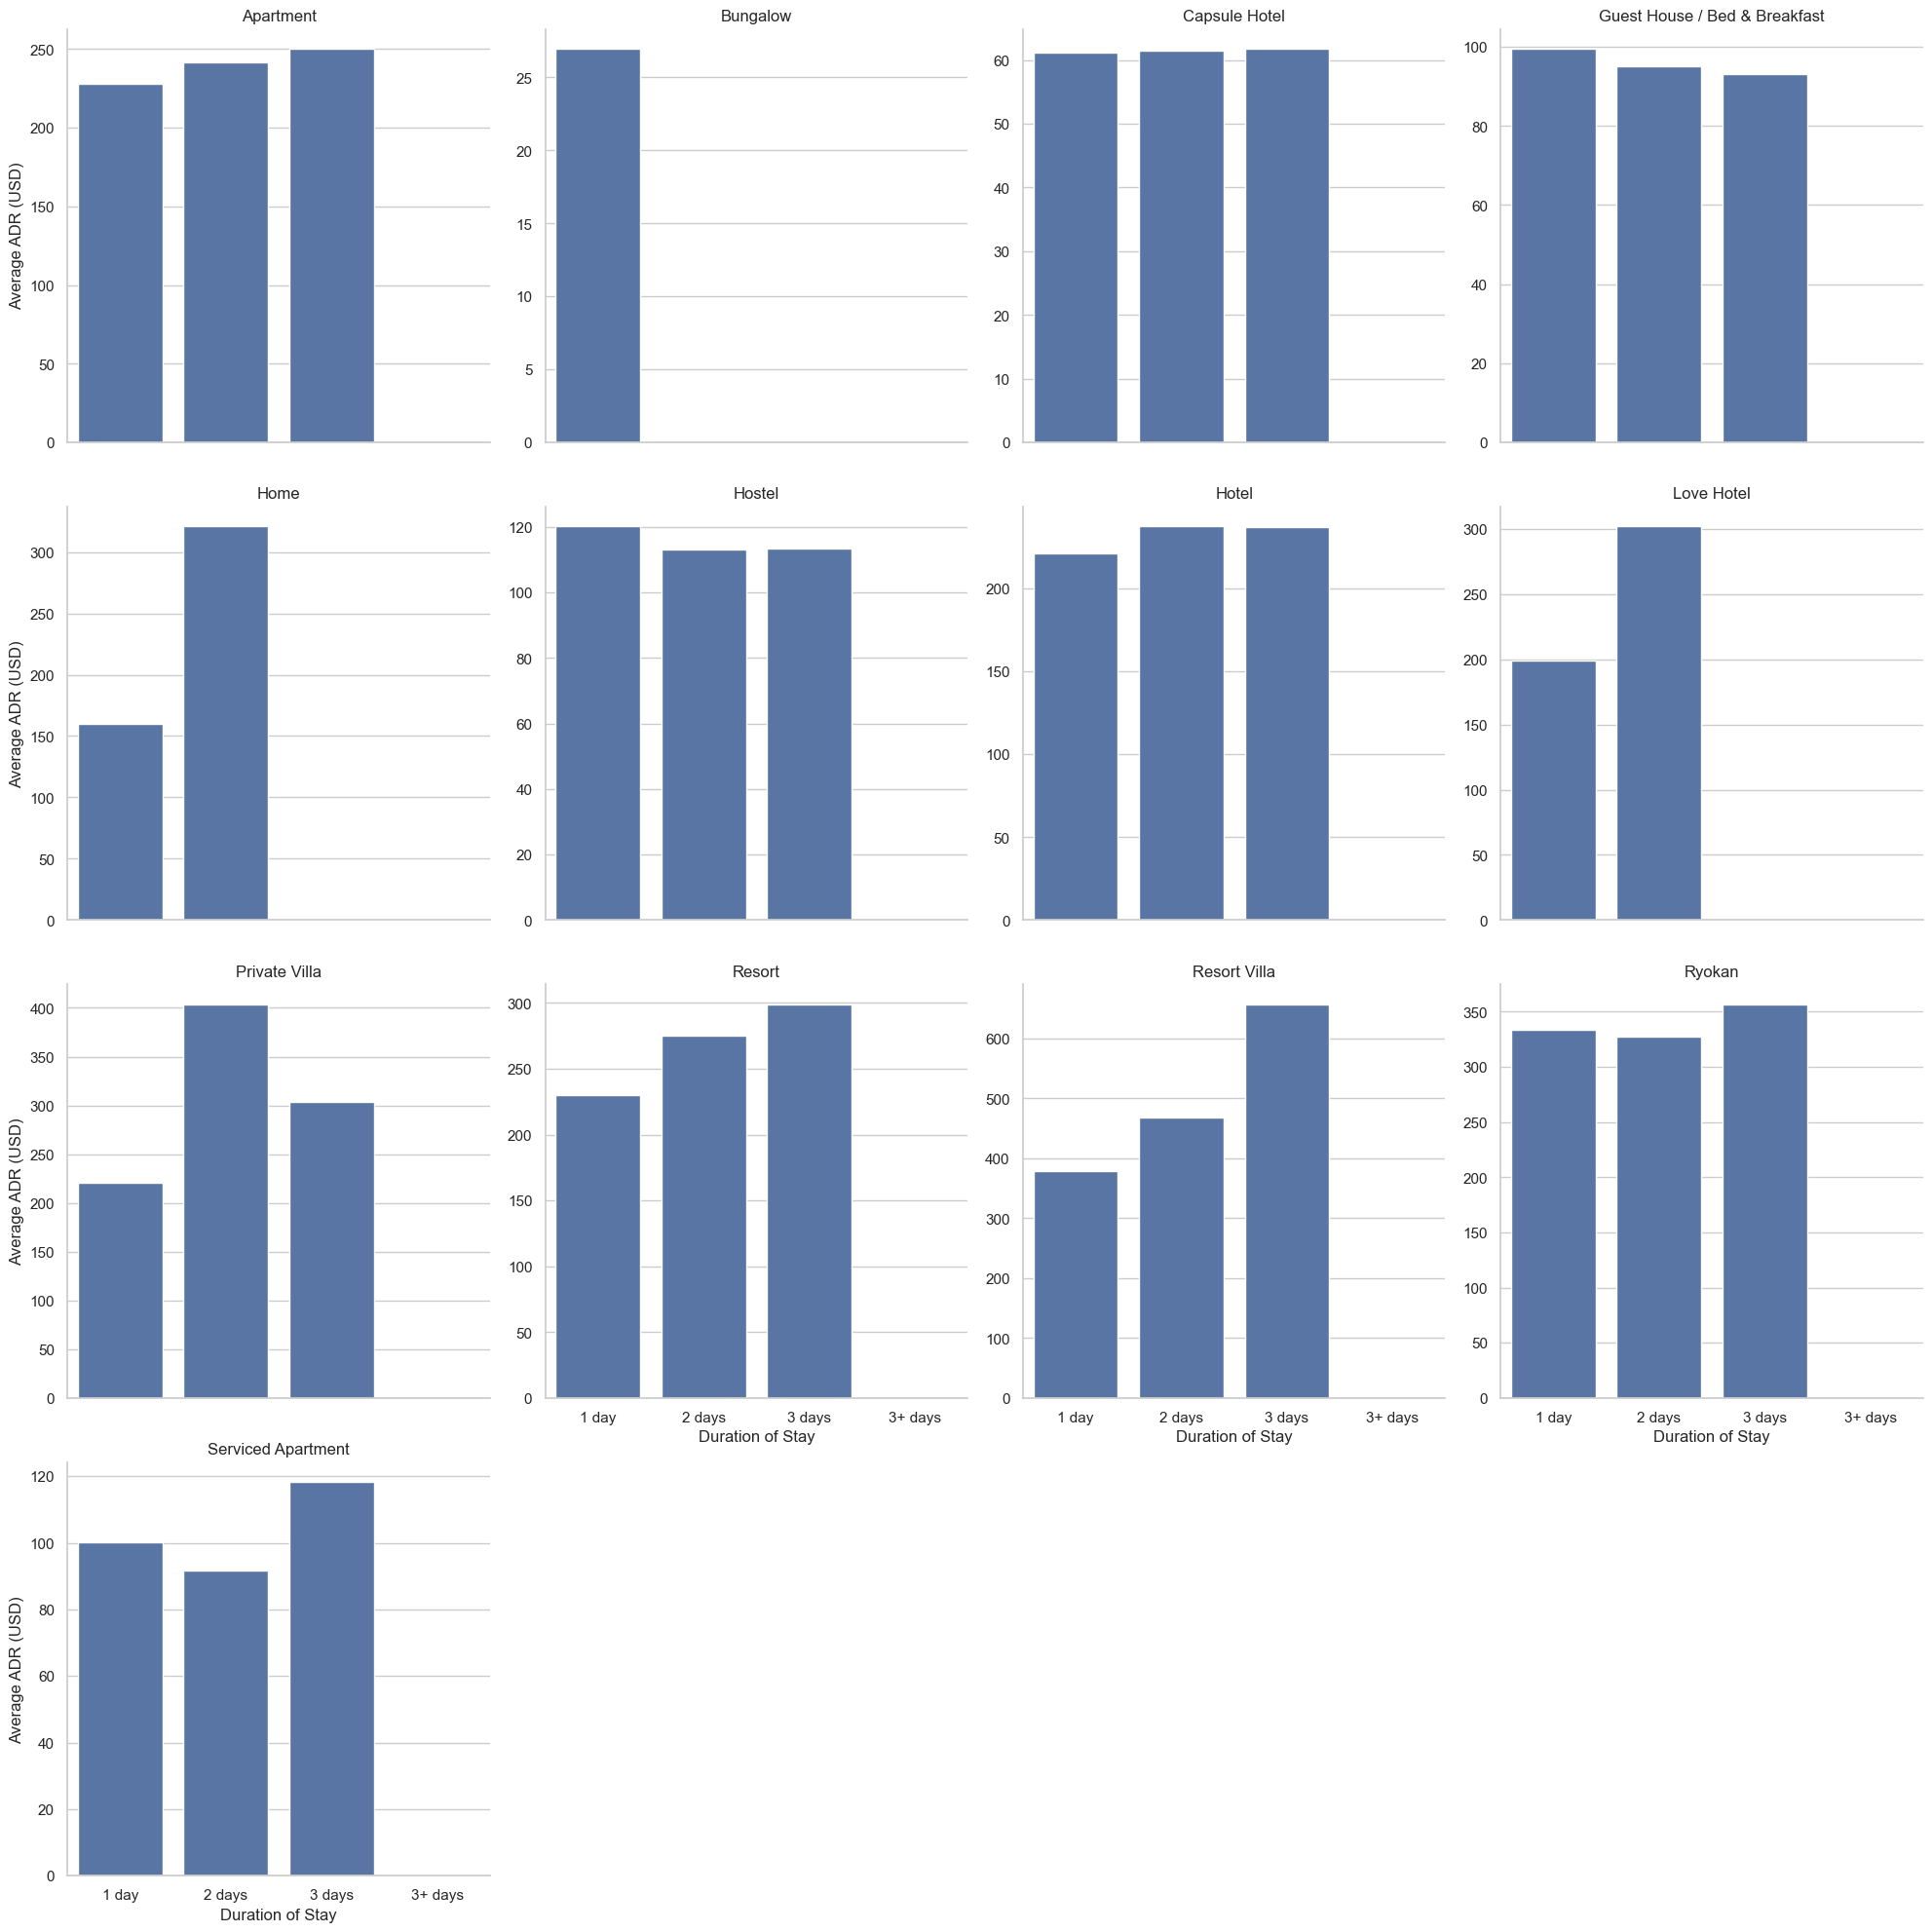

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'ADR_USD', 'duration_category',
# and 'accommodation_type_name' columns

# First, you might want to calculate the average ADR for each combination of 
# 'duration_category' and 'accommodation_type_name'
avg_adr_by_duration = df.groupby(['duration_category', 'accommodation_type_name'])['ADR_USD'].mean().reset_index()

# Then, create a FacetGrid to have separate subplots for each accommodation type
g = sns.FacetGrid(avg_adr_by_duration, col="accommodation_type_name", col_wrap=4, height=5, sharey=False)

# Now, map a bar plot to each subplot
g.map_dataframe(sns.barplot, x="duration_category", y="ADR_USD", order=['1 day', '2 days', '3 days', '3+ days'])

# Add some titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Duration of Stay", "Average ADR (USD)")

plt.show()

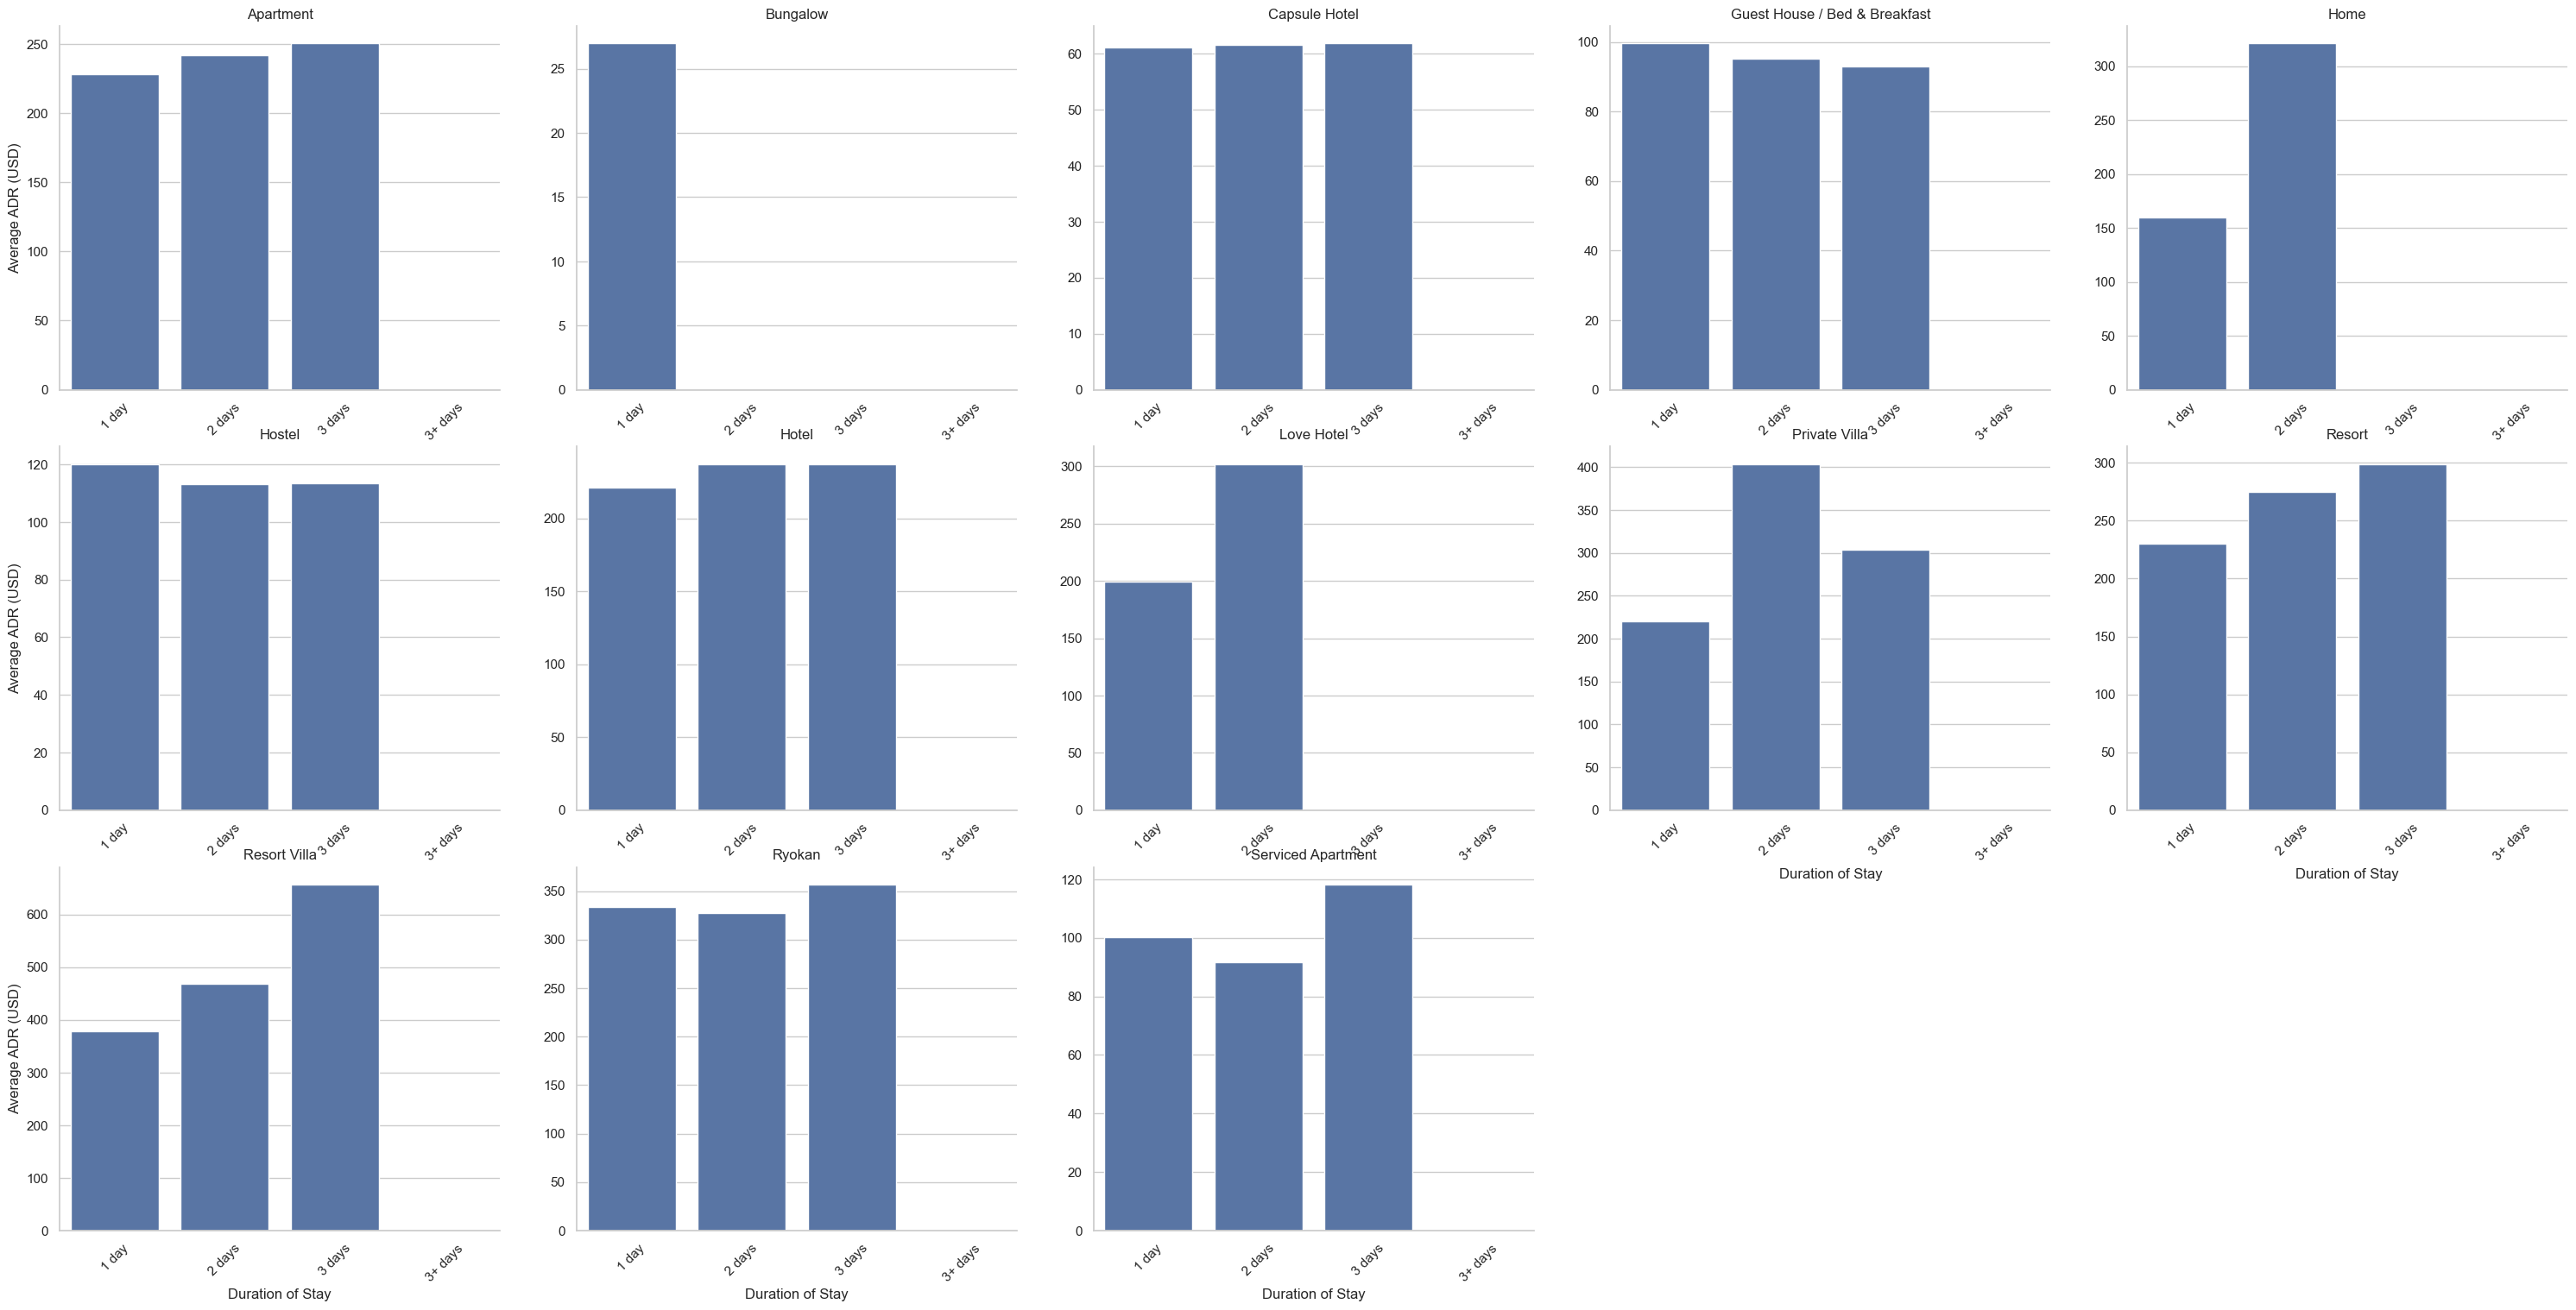

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your assumed DataFrame 'df' with 'ADR_USD', 'duration_category',
# and 'accommodation_type_name' columns

# Calculate the average ADR for each combination of 'duration_category' and 'accommodation_type_name'
avg_adr_by_duration = df.groupby(['duration_category', 'accommodation_type_name'])['ADR_USD'].mean().reset_index()

# Create a FacetGrid with adjusted subplot size and spacing
g = sns.FacetGrid(avg_adr_by_duration, col="accommodation_type_name", col_wrap=5, height=5, sharex=False, sharey=False)
g.fig.set_size_inches(30, 15) # Set the size of the entire grid figure

# Map a bar plot to each subplot
g.map_dataframe(sns.barplot, x="duration_category", y="ADR_USD", order=['1 day', '2 days', '3 days', '3+ days'])

# Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Duration of Stay", "Average ADR (USD)")

# Adjust the layout
g.fig.tight_layout(w_pad=3) # Adjust the padding between plots

# Rotate the x-axis labels for better readability if needed
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


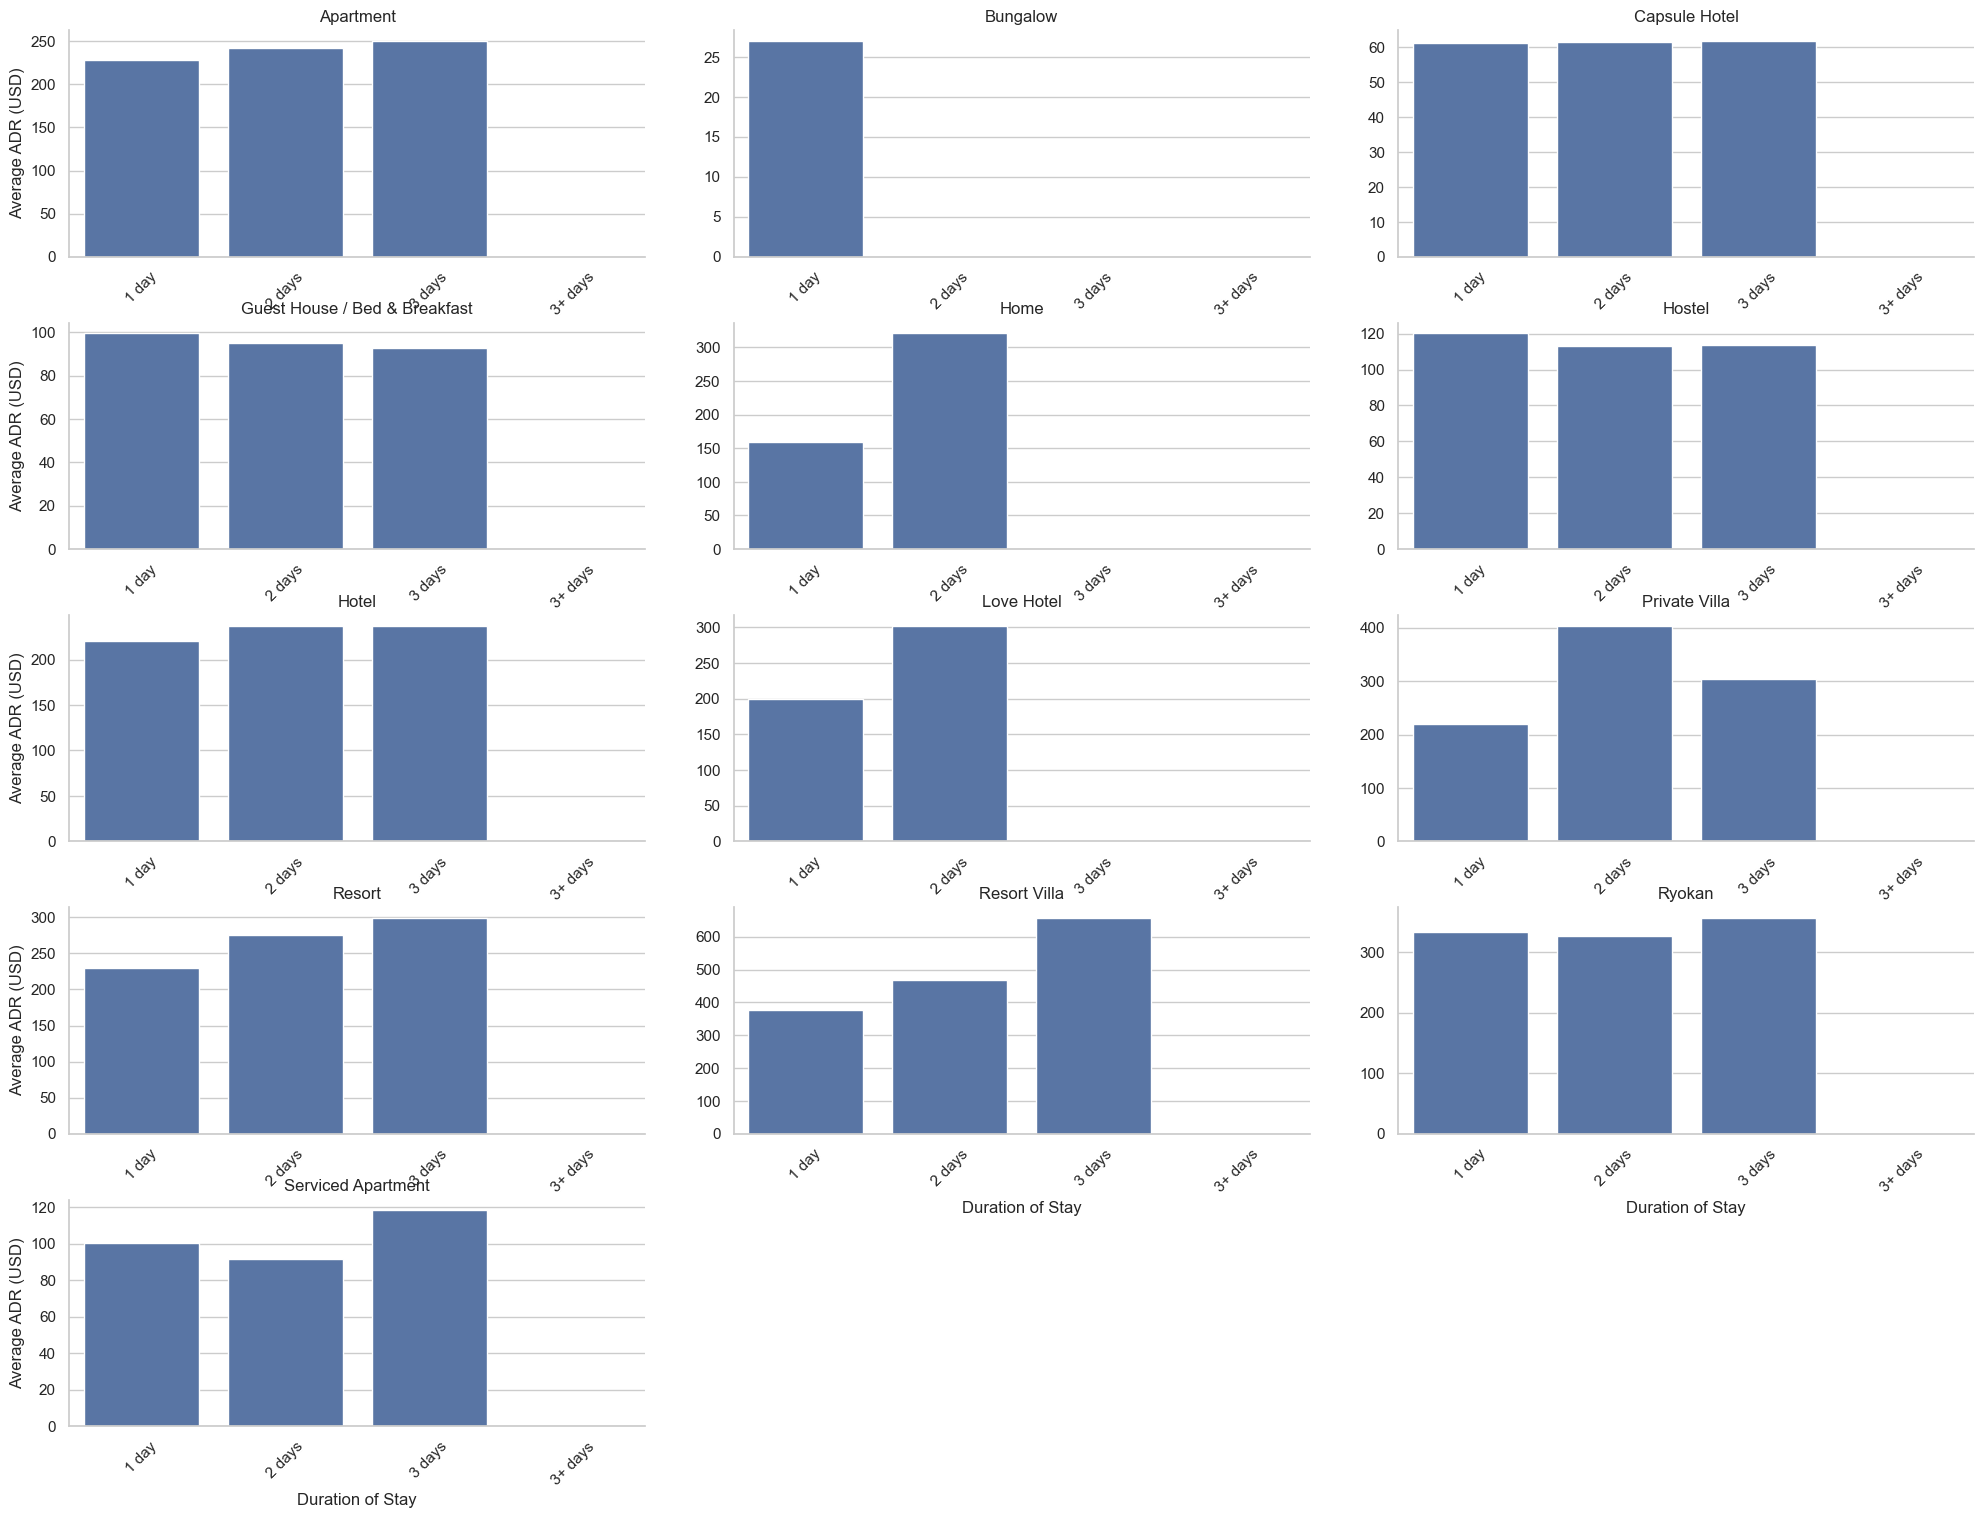

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average ADR for each combination of 'duration_category' and 'accommodation_type_name'
avg_adr_by_duration = df.groupby(['duration_category', 'accommodation_type_name'])['ADR_USD'].mean().reset_index()

# Create a FacetGrid with adjusted subplot size and spacing
g = sns.FacetGrid(avg_adr_by_duration, col="accommodation_type_name", col_wrap=3, height=4, sharex=False, sharey=False)
g.fig.set_size_inches(20, 15) # Set the size of the entire grid figure

# Map a bar plot to each subplot
g.map_dataframe(sns.barplot, x="duration_category", y="ADR_USD", order=['1 day', '2 days', '3 days', '3+ days'])

# Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Duration of Stay", "Average ADR (USD)")

# Adjust the layout
g.fig.tight_layout(w_pad=3) # Adjust the padding between plots

# Rotate the x-axis labels for better readability if needed
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

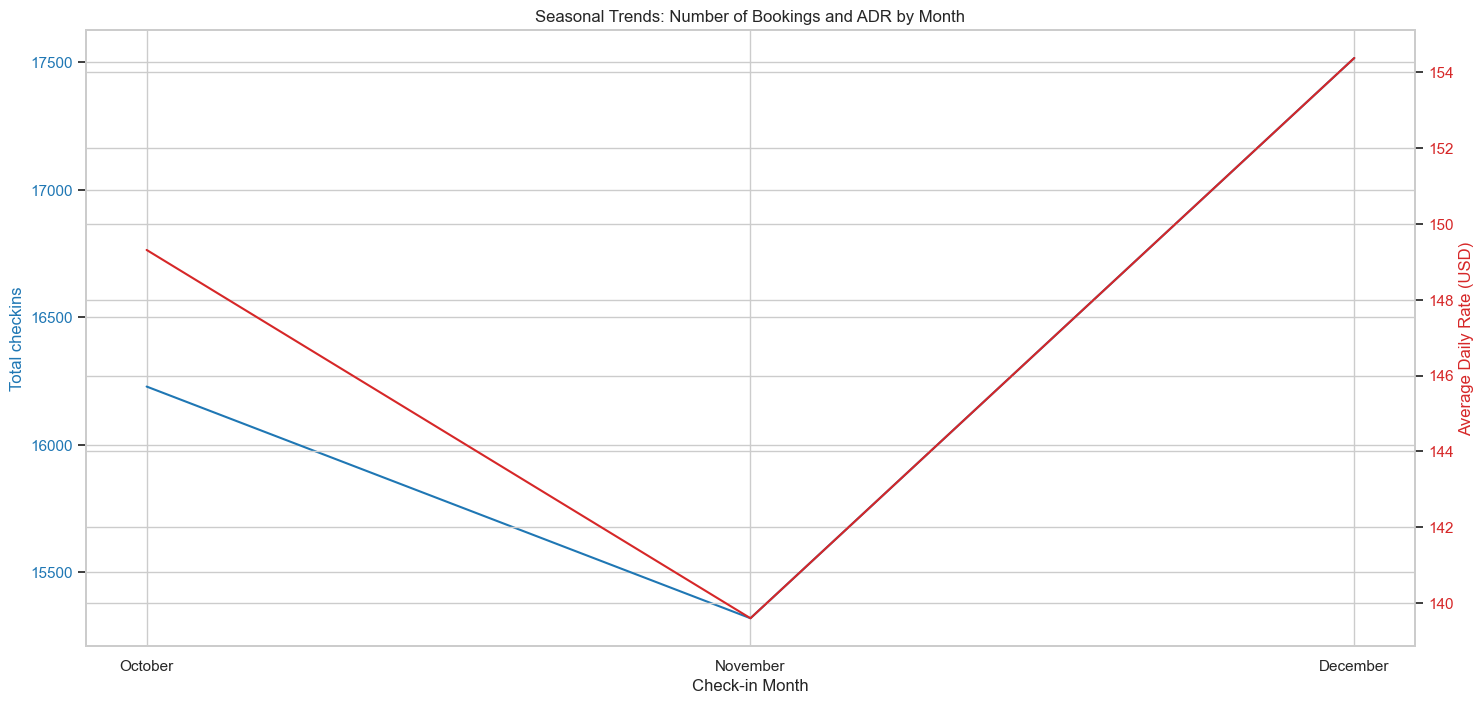

In [141]:
df['day_of_week_checkin'] = df['checkin_date'].dt.day_name()
# Extract month from the booking date and add it as a new column
df['month_checkin'] = df['checkin_date'].dt.month_name()

# Plot the number of bookings and ADR by month
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the number of bookings
color = 'tab:blue'
ax1.set_xlabel('Check-in Month')
ax1.set_ylabel('Total checkins', color=color)
ax1.plot(df.groupby('month_checkin')['#'].count().reindex(['September','October', 'November', 'December']), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plotting the ADR
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(df.groupby('month_checkin')['ADR_USD'].mean().reindex(['September','October', 'November', 'December']), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Seasonal Trends: Number of Bookings and ADR by Month')
plt.show()

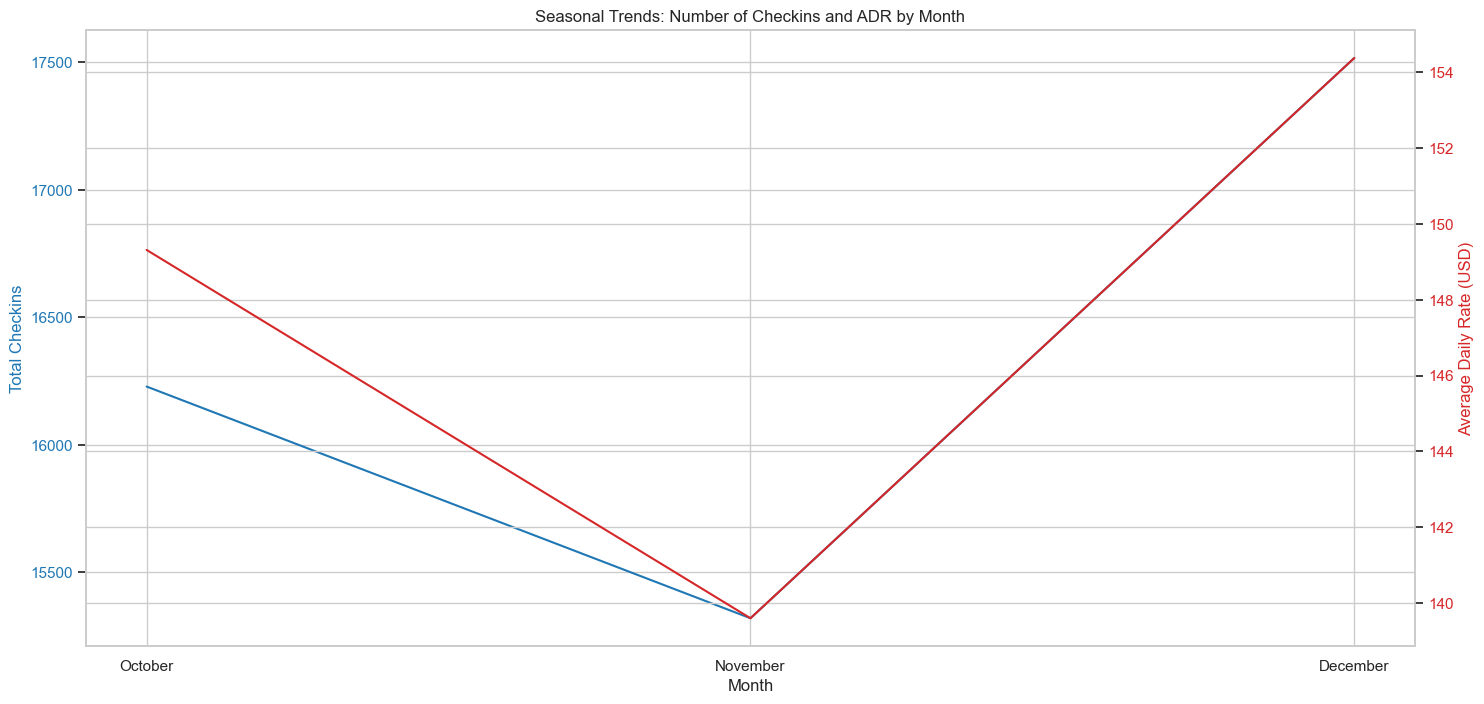

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'booking_date', 'checkin_date', 'ADR_USD', and '#' as columns

# Convert 'checkin_date' to datetime if it's not already
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Extract month from the checkin date and add it as a new column
df['month'] = df['checkin_date'].dt.month_name()

# Plot the number of checkins and ADR by month
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the number of checkins
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Checkins', color=color)
ax1.plot(df.groupby('month')['#'].count().reindex(['September','October', 'November', 'December']), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plotting the ADR
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(df.groupby('month')['ADR_USD'].mean().reindex(['September','October', 'November', 'December']), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Seasonal Trends: Number of Checkins and ADR by Month')
plt.show()

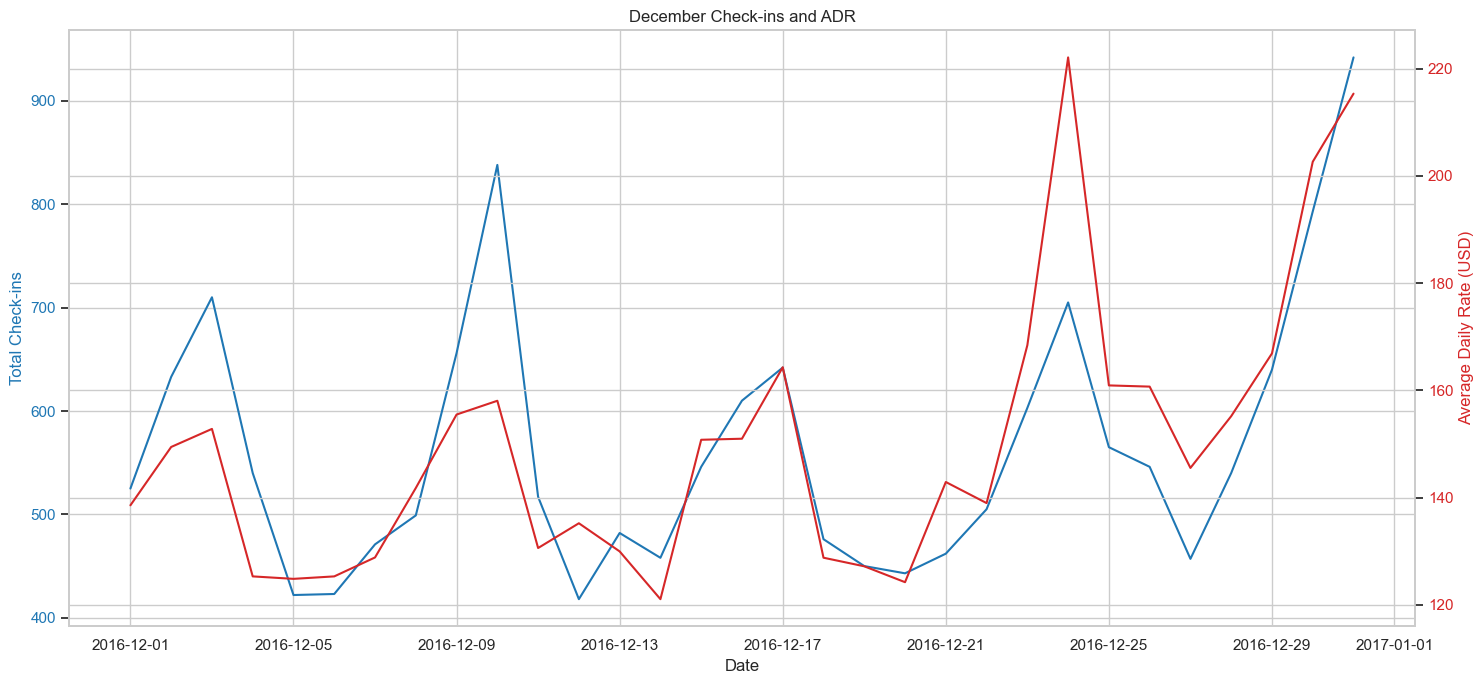

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'checkin_date' is in datetime format
# If not, uncomment the next line to convert it
# df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Filter the dataframe for December check-ins
df_december = df[df['checkin_date'].dt.month == 12]

# Calculate the number of check-ins and average ADR for December
december_data = df_december.groupby(df_december['checkin_date'].dt.date).agg({'#': 'count', 'ADR_USD': 'mean'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the number of check-ins
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Check-ins', color=color)
ax1.plot(december_data['checkin_date'], december_data['#'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(december_data['checkin_date'], december_data['ADR_USD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and adjust layout
plt.title('December Check-ins and ADR')
fig.tight_layout()

plt.show()


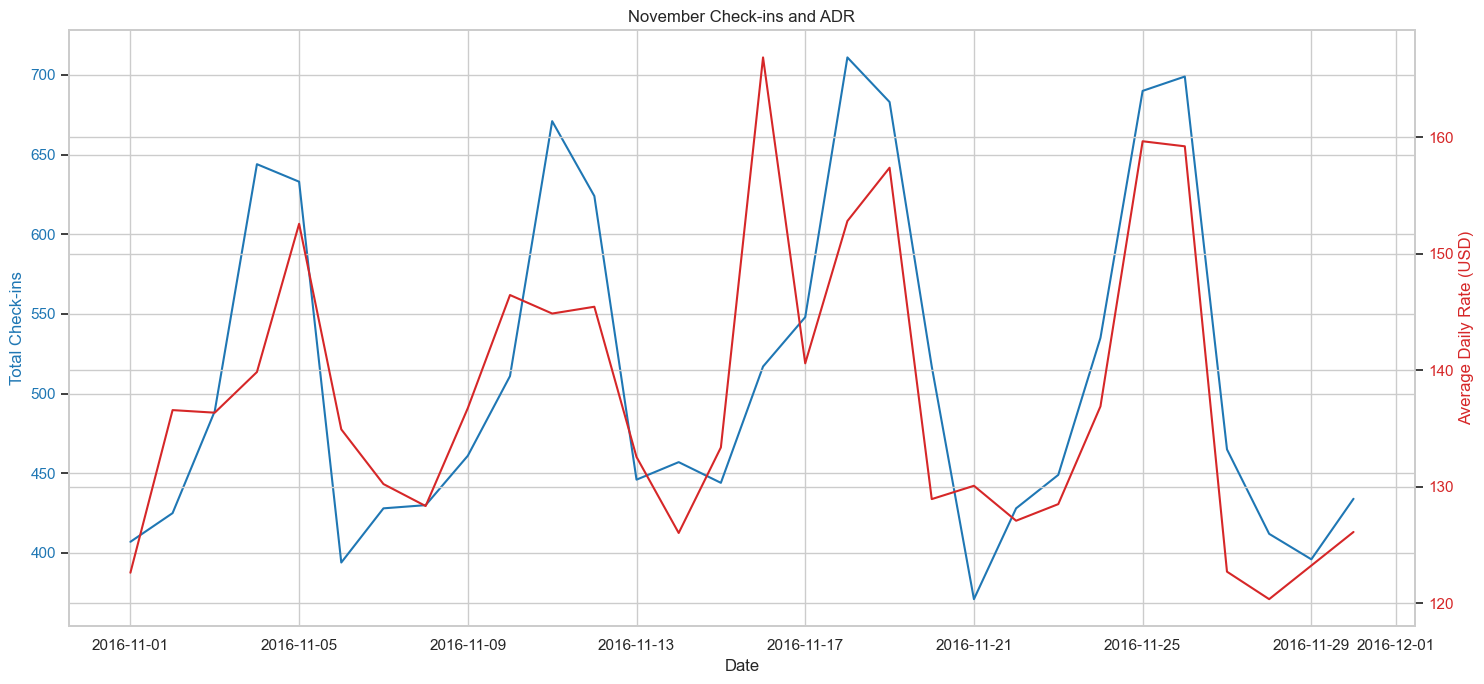

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'checkin_date' is in datetime format
# If not, uncomment the next line to convert it
# df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Filter the dataframe for December check-ins
df_november = df[df['checkin_date'].dt.month == 11]

# Calculate the number of check-ins and average ADR for December
november_data = df_november.groupby(df_november['checkin_date'].dt.date).agg({'#': 'count', 'ADR_USD': 'mean'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the number of check-ins
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Check-ins', color=color)
ax1.plot(november_data['checkin_date'], november_data['#'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(november_data['checkin_date'], november_data['ADR_USD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and adjust layout
plt.title('November Check-ins and ADR')
fig.tight_layout()

plt.show()


In [149]:
nov_dec_data

checkin_date    #     ADR_USD
0    2016-11-01  407  122.610753
1    2016-11-02  425  136.576776
2    2016-11-03  489  136.354993
3    2016-11-04  644  139.847953
4    2016-11-05  633  152.578715
..          ...  ...         ...
56   2016-12-27  457  145.532341
57   2016-12-28  540  155.182466
58   2016-12-29  640  166.881135
59   2016-12-30  793  202.619399
60   2016-12-31  942  215.318642

[61 rows x 3 columns]

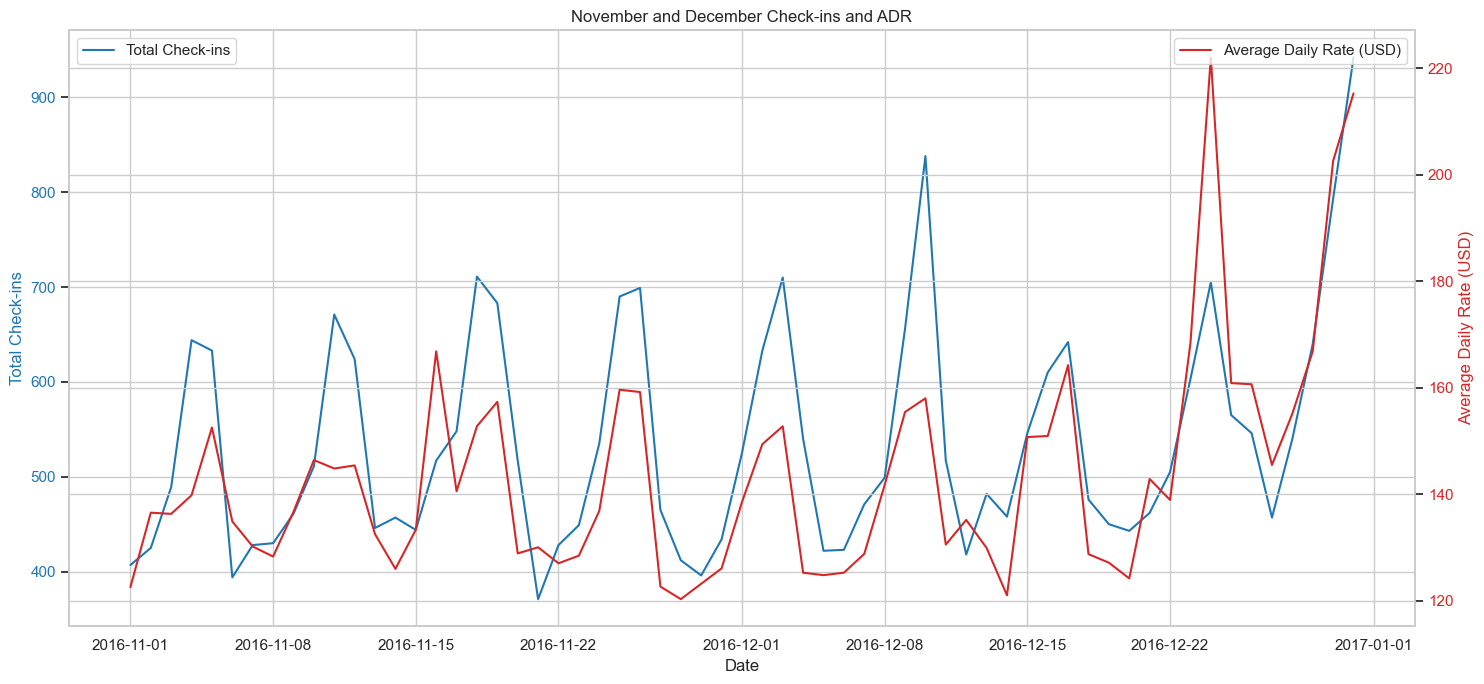

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'checkin_date' is in datetime format
# If not, uncomment the next line to convert it
# df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Filter the dataframe for November and December check-ins
df_nov_dec = df[df['checkin_date'].dt.month.isin([11, 12])]

# Calculate the number of check-ins and average ADR for November and December
nov_dec_data = df_nov_dec.groupby(df_nov_dec['checkin_date'].dt.date).agg({'#': 'count', 'ADR_USD': 'mean'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the number of check-ins
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Check-ins', color=color)
ax1.plot(nov_dec_data['checkin_date'], nov_dec_data['#'], color=color, label='Total Check-ins')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plotting the ADR
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(nov_dec_data['checkin_date'], nov_dec_data['ADR_USD'], color=color, label='Average Daily Rate (USD)')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and adjust layout
plt.title('November and December Check-ins and ADR')
fig.tight_layout()

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

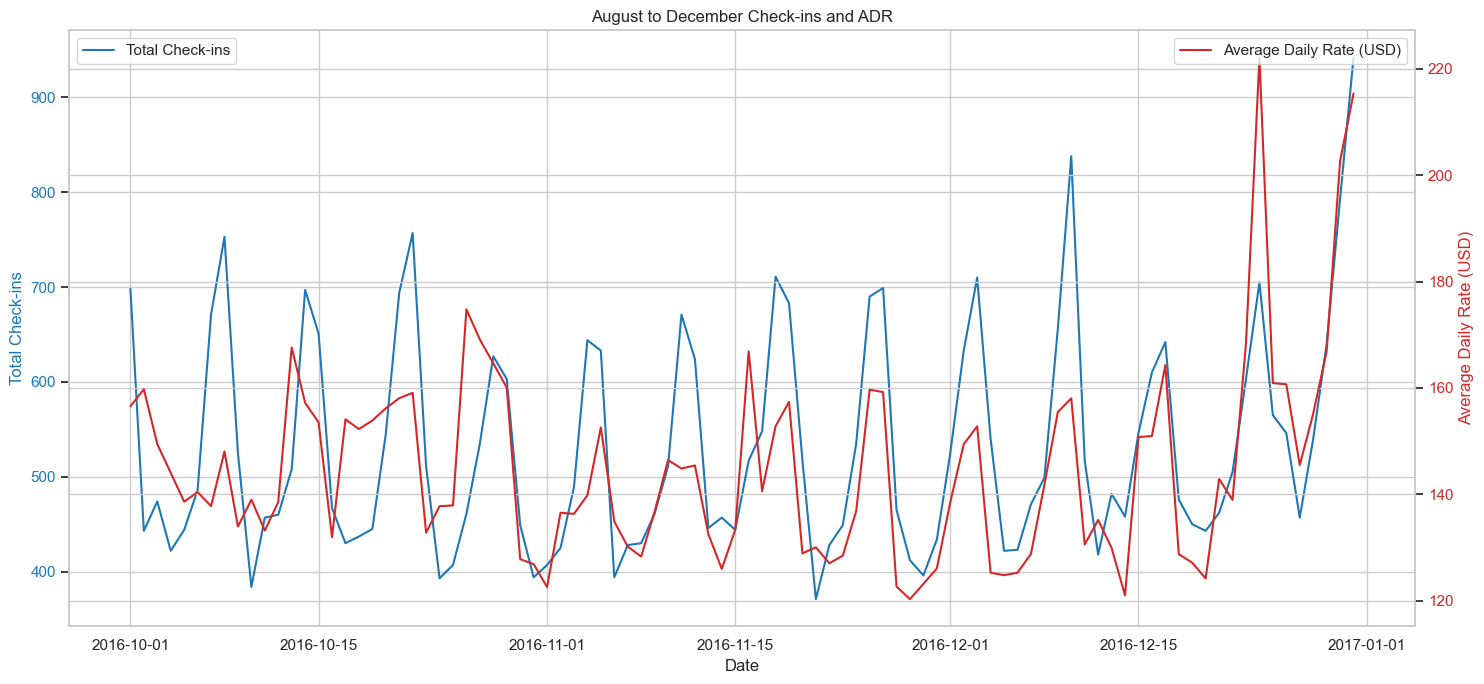

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'checkin_date' and 'ADR_USD' columns
# Ensure 'checkin_date' is in datetime format
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Filter the dataframe for August to December check-ins
df_aug_to_dec = df[df['checkin_date'].dt.month.isin([8, 9, 10, 11, 12])]

# Calculate the number of check-ins and average ADR for August to December
aug_to_dec_data = df_aug_to_dec.groupby(df_aug_to_dec['checkin_date'].dt.date).agg({'#': 'count', 'ADR_USD': 'mean'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the number of check-ins
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Check-ins', color=color)
ax1.plot(aug_to_dec_data['checkin_date'], aug_to_dec_data['#'], color=color, label='Total Check-ins')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plotting the ADR
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
ax2.plot(aug_to_dec_data['checkin_date'], aug_to_dec_data['ADR_USD'], color=color, label='Average Daily Rate (USD)')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and adjust layout
plt.title('August to December Check-ins and ADR')
fig.tight_layout()

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

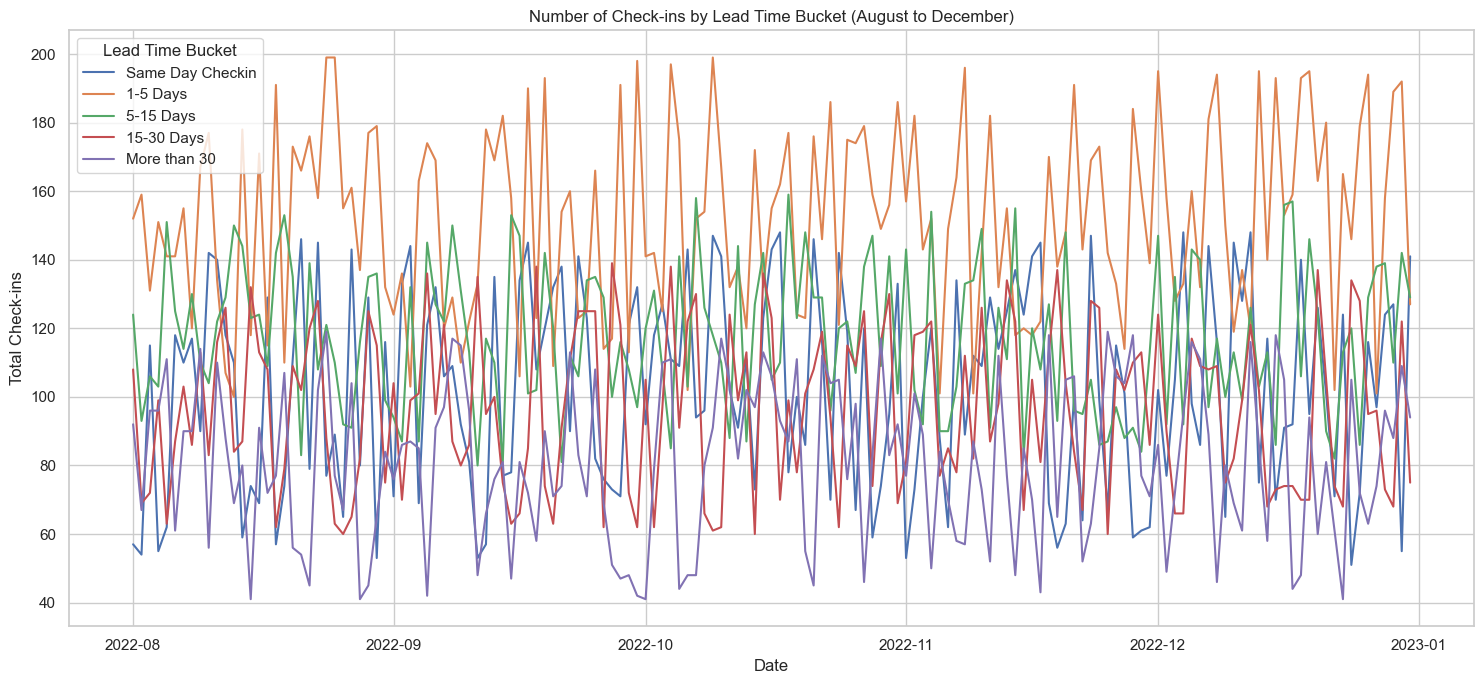

In [151]:
# It appears I forgot to import numpy. Let's correct that and run the code again.
import numpy as np

# Now that numpy is imported, we can try creating the sample dataframe and plotting again.

# Create a date range for August to December of a given year
date_range = pd.date_range(start='2022-08-01', end='2022-12-31', freq='D')

# Create a sample dataframe with some made-up total check-ins and lead times
data = {
    'checkin_date': date_range,
    'Same Day Checkin': np.random.randint(50, 150, size=len(date_range)),
    '1-5 Days': np.random.randint(100, 200, size=len(date_range)),
    '5-15 Days': np.random.randint(80, 160, size=len(date_range)),
    '15-30 Days': np.random.randint(60, 140, size=len(date_range)),
    'More than 30': np.random.randint(40, 120, size=len(date_range))
}

# Convert the dictionary to a DataFrame
df_aug_to_dec = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(15, 7))

# Plot each lead time bucket
for column in df_aug_to_dec.columns[1:]:
    plt.plot(df_aug_to_dec['checkin_date'], df_aug_to_dec[column], label=column)

# Add title and labels
plt.title('Number of Check-ins by Lead Time Bucket (August to December)')
plt.xlabel('Date')
plt.ylabel('Total Check-ins')
plt.legend(title='Lead Time Bucket')

# Show the plot
plt.tight_layout()
plt.show()

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'checkin_date' and 'lead_time' columns
# Ensure 'checkin_date' is in datetime format
# df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Define the lead time buckets
bins = [0, 1, 3, 5, 15, 30, float('inf')]
labels = ['Same Day', '1 Day', '3 Days', '5 Days', '15 Days', '30 Days', 'More than 30 Days']
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Filter the dataframe for November and December check-ins
df_nov_dec = df[df['checkin_date'].dt.month.isin([11, 12])]

# Calculate the number of check-ins for each lead time bucket in November and December
nov_dec_lead_time_checkins = df_nov_dec.groupby('LeadTimeBucket')['checkin_date'].count()

# Plotting the number of check-ins by lead time
plt.figure(figsize=(14, 7))
nov_dec_lead_time_checkins.plot(kind='bar', color='tab:blue')

# Add titles and labels
plt.title('Number of Check-ins by Lead Time Bucket in November and December')
plt.xlabel('Lead Time Bucket')
plt.ylabel('Number of Check-ins')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# For the second request, get top five check-in dates per lead time bucket
top_dates_per_bucket = df.groupby(['LeadTimeBucket', df['checkin_date'].dt.date])['checkin_date'].count().reset_index(name='Number of Check-ins')
top_dates_per_bucket = top_dates_per_bucket.sort_values(['LeadTimeBucket', 'Number of Check-ins'], ascending=[True, False]).groupby('LeadTimeBucket').head(5)

# Show the dataframe
top_dates_per_bucket

ValueError: Bin labels must be one fewer than the number of bin edges

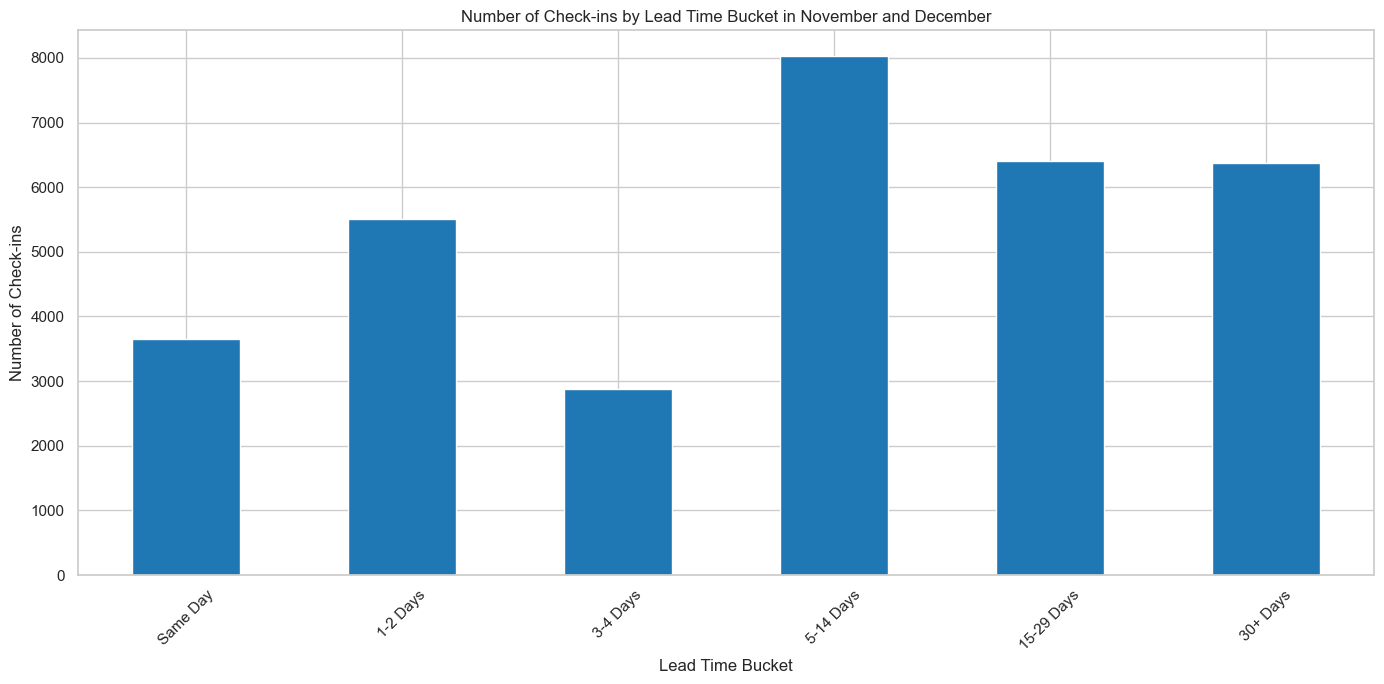

LeadTimeBucket checkin_date  Number of Check-ins
7         Same Day   2016-10-08                  102
20        Same Day   2016-10-21                   91
21        Same Day   2016-10-22                   90
0         Same Day   2016-10-01                   87
42        Same Day   2016-11-12                   86
99        1-2 Days   2016-10-08                  141
98        1-2 Days   2016-10-07                  138
92        1-2 Days   2016-10-01                  136
183       1-2 Days   2016-12-31                  132
106       1-2 Days   2016-10-15                  131
247       3-4 Days   2016-12-03                   90
239       3-4 Days   2016-11-25                   87
205       3-4 Days   2016-10-22                   84
190       3-4 Days   2016-10-07                   83
191       3-4 Days   2016-10-08                   83
346      5-14 Days   2016-12-10                  218
332      5-14 Days   2016-11-26                  200
339      5-14 Days   2016-12-03                  198
367      5-14 Days   2016-12-31                  192
283      5-14 Days   2016-10-08                  185
459     15-29 Days   2016-12-31                  230
438     15-29 Days   2016-12-10                  202
458     15-29 Days   2016-12-30                  177
409     15-29 Days   2016-11-11                  153
416     15-29 Days   2016-11-18                  151
551       30+ Days   2016-12-31                  248
550       30+ Days   2016-12-30                  199
544       30+ Days   2016-12-24                  195
549       30+ Days   2016-12-29                  180
543       30+ Days   2016-12-23                  158

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'checkin_date' and 'lead_time' columns
# Ensure 'checkin_date' is in datetime format
# df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Define the lead time buckets
bins = [0, 1, 3, 5, 15, 30, float('inf')]
labels = ['Same Day', '1-2 Days', '3-4 Days', '5-14 Days', '15-29 Days', '30+ Days']
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Filter the dataframe for November and December check-ins
df_nov_dec = df[df['checkin_date'].dt.month.isin([11, 12])]

# Calculate the number of check-ins for each lead time bucket in November and December
nov_dec_lead_time_checkins = df_nov_dec.groupby('LeadTimeBucket')['checkin_date'].count()

# Plotting the number of check-ins by lead time
plt.figure(figsize=(14, 7))
nov_dec_lead_time_checkins.plot(kind='bar', color='tab:blue')

# Add titles and labels
plt.title('Number of Check-ins by Lead Time Bucket in November and December')
plt.xlabel('Lead Time Bucket')
plt.ylabel('Number of Check-ins')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# For the second request, get top five check-in dates per lead time bucket
top_dates_per_bucket = df.groupby(['LeadTimeBucket', df['checkin_date'].dt.date])['checkin_date'].count().reset_index(name='Number of Check-ins')
top_dates_per_bucket = top_dates_per_bucket.sort_values(['LeadTimeBucket', 'Number of Check-ins'], ascending=[True, False]).groupby('LeadTimeBucket').head(5)

# Show the dataframe
top_dates_per_bucket


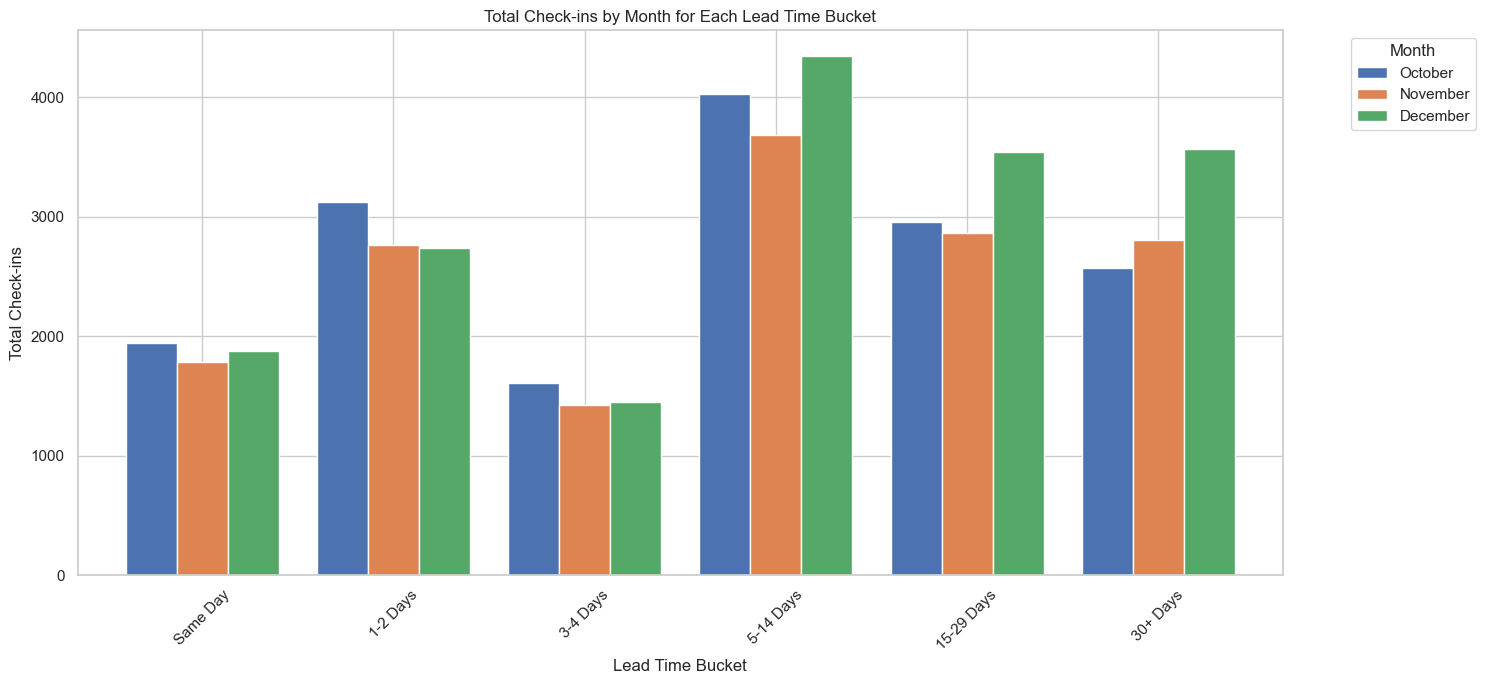

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'checkin_date' and 'lead_time' columns
# Ensure 'checkin_date' is in datetime format
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Define lead time buckets
bins = [0, 1, 3, 5, 15, 30, float('inf')]  # Include the upper edge for Same Day
labels = ['Same Day', '1-2 Days', '3-4 Days', '5-14 Days', '15-29 Days', '30+ Days']
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Extract month from the check-in date and filter for the desired months
df['month'] = df['checkin_date'].dt.month_name()
df_filtered = df[df['month'].isin([ 'October', 'November', 'December'])]

# Group by LeadTimeBucket and month to get the total number of check-ins
checkins_by_month = df_filtered.groupby(['LeadTimeBucket', 'month']).size().unstack(fill_value=0)

# Reorder the months to match chronological order
month_order = ['October', 'November', 'December']
checkins_by_month = checkins_by_month[month_order]

# Plotting the data
checkins_by_month.plot(kind='bar', figsize=(15, 7), width=0.8)

# Add titles and labels
plt.title('Total Check-ins by Month for Each Lead Time Bucket')
plt.xlabel('Lead Time Bucket')
plt.ylabel('Total Check-ins')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


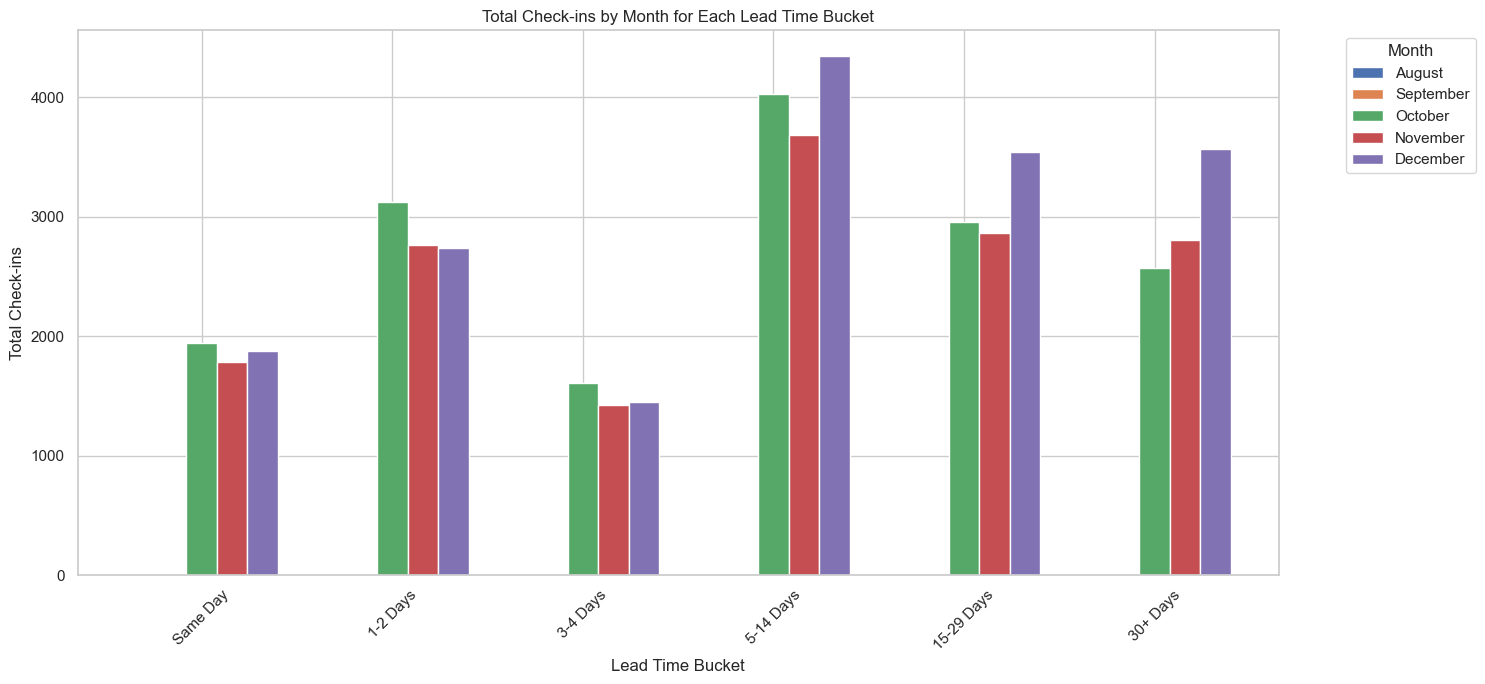

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'checkin_date' and 'lead_time' columns
# Ensure 'checkin_date' is in datetime format
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Define lead time buckets
bins = [0, 1, 3, 5, 15, 30, float('inf')]
labels = ['Same Day', '1-2 Days', '3-4 Days', '5-14 Days', '15-29 Days', '30+ Days']
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Extract month from the check-in date and filter for the desired months
df['month'] = df['checkin_date'].dt.strftime('%B')
df_filtered = df[df['checkin_date'].dt.month.isin([8, 9, 10, 11, 12])]

# Group by LeadTimeBucket and month to get the total number of check-ins
checkins_by_month = df_filtered.groupby(['LeadTimeBucket', 'month']).size().unstack(fill_value=0)

# Ensure all months are present in the DataFrame
month_order = ['August', 'September', 'October', 'November', 'December']
for month in month_order:
    if month not in checkins_by_month:
        checkins_by_month[month] = 0

# Reorder the months to match chronological order
checkins_by_month = checkins_by_month[month_order]

# Plotting the data
checkins_by_month.plot(kind='bar', figsize=(15, 7), width=0.8)

# Add titles and labels
plt.title('Total Check-ins by Month for Each Lead Time Bucket')
plt.xlabel('Lead Time Bucket')
plt.ylabel('Total Check-ins')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

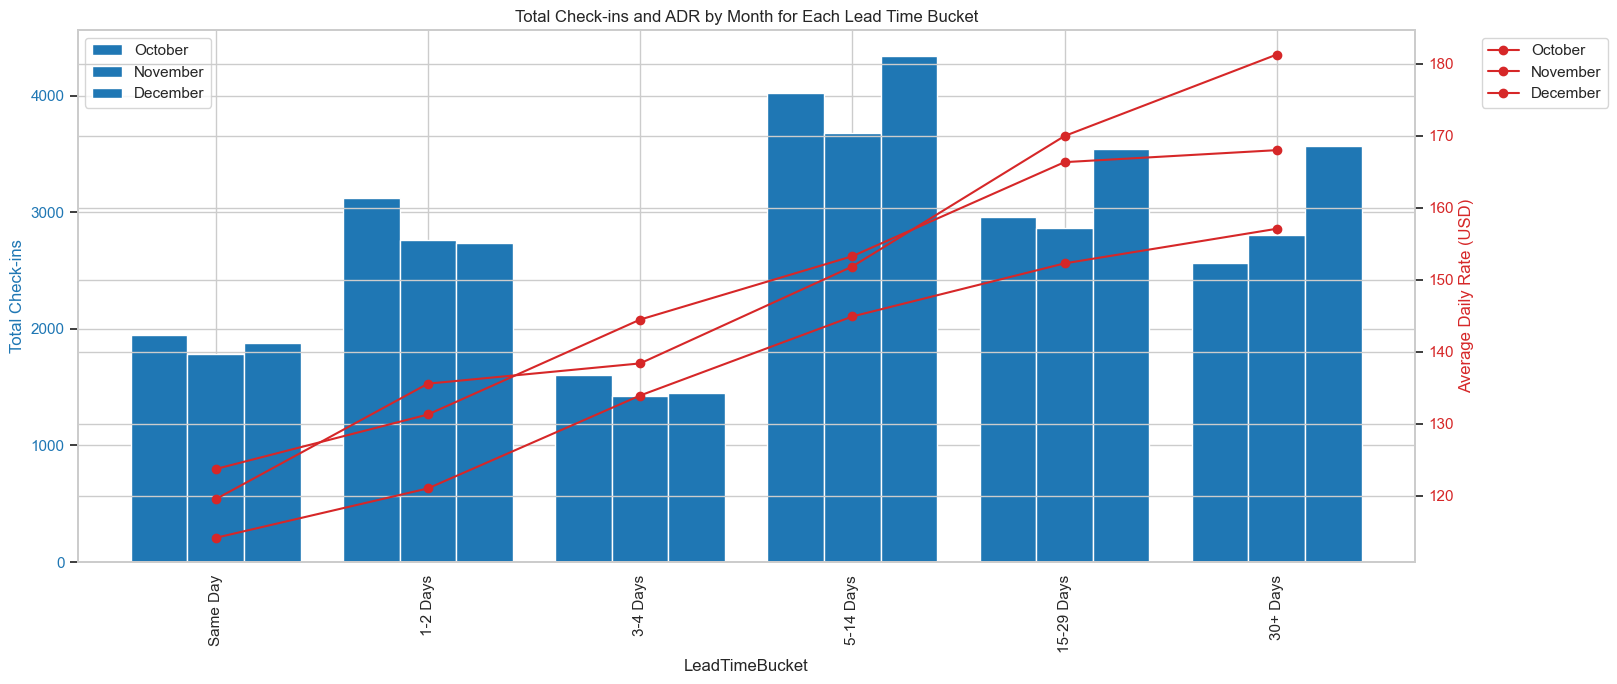

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'checkin_date', 'lead_time', and 'ADR_USD' columns
# Ensure 'checkin_date' is in datetime format
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Define lead time buckets
bins = [0, 1, 3, 5, 15, 30, float('inf')]
labels = ['Same Day', '1-2 Days', '3-4 Days', '5-14 Days', '15-29 Days', '30+ Days']
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Extract month from the check-in date and filter for the desired months
df['month'] = df['checkin_date'].dt.strftime('%B')
df_filtered = df[df['checkin_date'].dt.month.isin([8, 9, 10, 11, 12])]

# Group by LeadTimeBucket and month to get the total number of check-ins and average ADR
summary = df_filtered.groupby(['LeadTimeBucket', 'month']).agg({'#': 'count', 'ADR_USD': 'mean'}).unstack(fill_value=0)

# Ensure all months are present in the DataFrame for both check-ins and ADR
month_order = ['October', 'November', 'December']
for month in month_order:
    if month not in summary['#']:
        summary['#'][month] = 0
    if month not in summary['ADR_USD']:
        summary['ADR_USD'][month] = 0

# Reorder the months to match chronological order for check-ins and ADR
checkins_by_month = summary['#'][month_order]
adr_by_month = summary['ADR_USD'][month_order]

# Plotting the data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the number of check-ins
color = 'tab:blue'
ax1.set_xlabel('Lead Time Bucket')
ax1.set_ylabel('Total Check-ins', color=color)
checkins_by_month.plot(kind='bar', ax=ax1, width=0.8, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axis that shares the same x-axis for ADR
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Daily Rate (USD)', color=color)
adr_by_month.plot(kind='line', marker='o', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and adjust layout
plt.title('Total Check-ins and ADR by Month for Each Lead Time Bucket')
fig.tight_layout()

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

TypeError: unsupported format string passed to numpy.ndarray.__format__

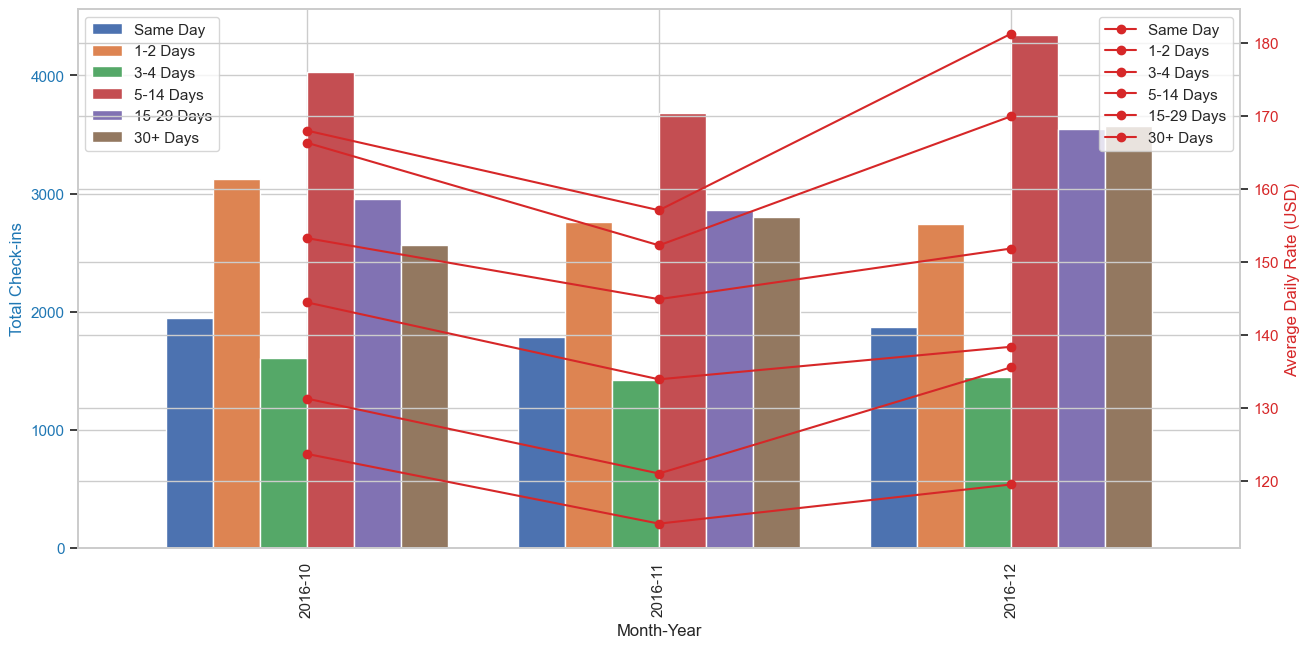

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'checkin_date', 'lead_time', and 'ADR_USD' columns
# Ensure 'checkin_date' is in datetime format
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Create the lead time bucket column
bins = [0, 1, 3, 5, 15, 30, float('inf')]
labels = ['Same Day', '1-2 Days', '3-4 Days', '5-14 Days', '15-29 Days', '30+ Days']
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Extract month from the check-in date and create a month-year column
df['month_year'] = df['checkin_date'].dt.strftime('%Y-%m')

# Group the data by month-year and LeadTimeBucket, then count the number of check-ins and calculate the average ADR
grouped_data = df.groupby(['month_year', 'LeadTimeBucket']).agg(Total_Checkins=('checkin_date', 'count'),
                                                                Average_ADR=('ADR_USD', 'mean')).reset_index()

# Pivot the data to get the total check-ins and average ADR for each month-year and LeadTimeBucket
pivot_data = grouped_data.pivot(index='month_year', columns='LeadTimeBucket', values=['Total_Checkins', 'Average_ADR'])

# Plotting the data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot total check-ins
pivot_data['Total_Checkins'].plot(kind='bar', ax=ax1, width=0.8)
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Check-ins', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Create a twin axis to plot ADR
ax2 = ax1.twinx()
pivot_data['Average_ADR'].plot(kind='line', marker='o', ax=ax2, color='tab:red')
ax2.set_ylabel('Average Daily Rate (USD)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Annotate the ADR values on the chart
for i, val in enumerate(pivot_data['Average_ADR'].values):
    ax2.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and adjust layout
plt.title('Trend of Check-ins and Average ADR by Lead Time Bucket')
fig.tight_layout()

plt.show()

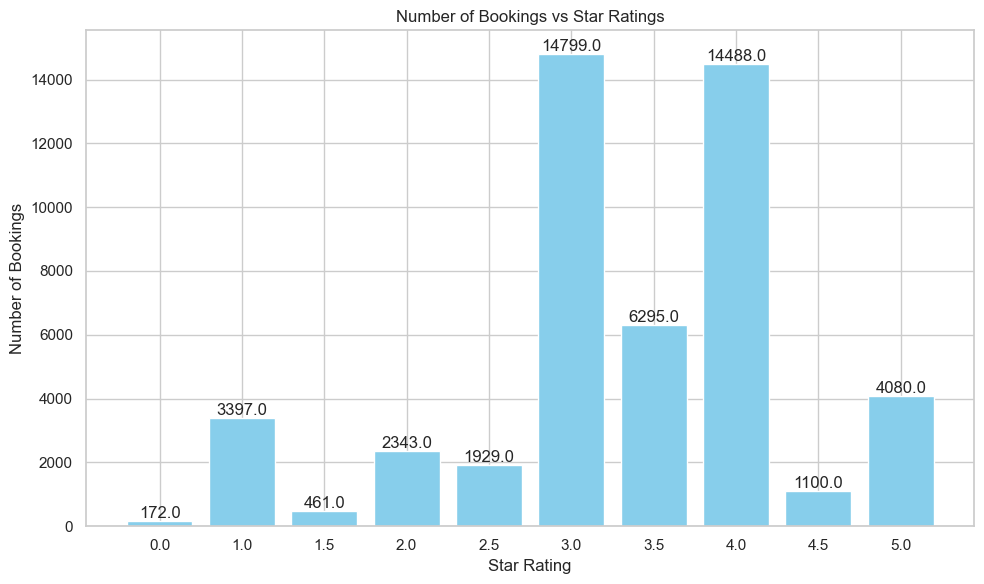

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'checkin_date' is in datetime format
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

# Count the number of bookings for each star rating
bookings_by_star = df.groupby('star_rating').size().reset_index(name='num_bookings')

# Sort the data by star rating before plotting
bookings_by_star.sort_values('star_rating', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bookings_by_star['star_rating'].astype(str), bookings_by_star['num_bookings'], color='skyblue')

plt.xlabel('Star Rating')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings vs Star Ratings')

# Adding the text labels on the bars
for idx, val in bookings_by_star.iterrows():
    plt.text(idx, val['num_bookings'], str(val['num_bookings']), ha='center', va='bottom')

plt.tight_layout()
plt.show()


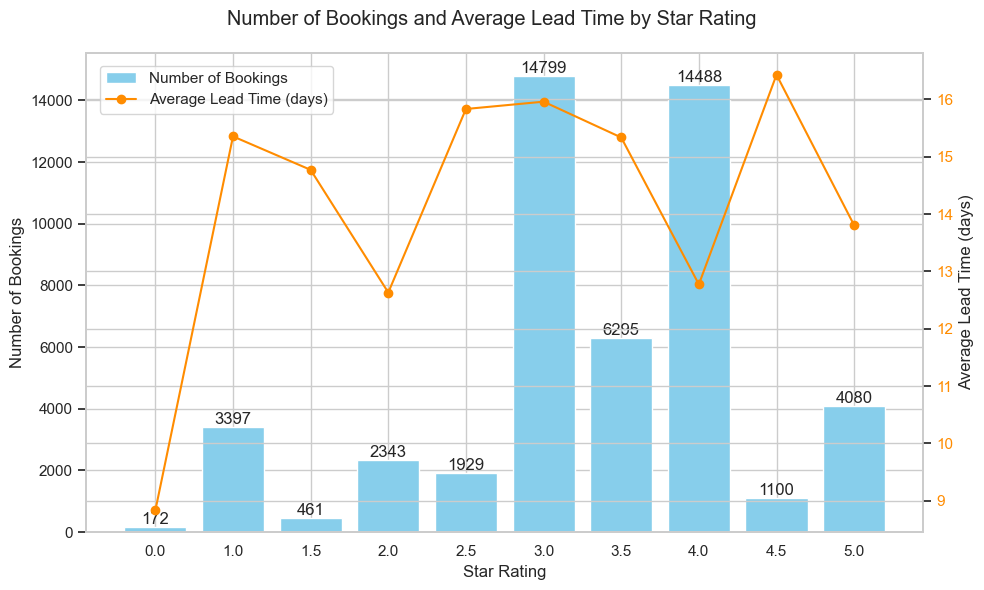

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'lead_time' is a column in your DataFrame that represents the lead time in days
# Ensure 'checkin_date' and 'star_rating' are in the correct format
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df['star_rating'] = df['star_rating'].astype(str)

# Group by star rating and calculate the number of bookings and average lead time
stats_by_star = df.groupby('star_rating').agg(num_bookings=('star_rating', 'size'),
                                               avg_lead_time=('lead_time', 'mean')).reset_index()

# Sort the data by star rating before plotting
stats_by_star.sort_values('star_rating', inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of bookings as a bar chart
ax1.bar(stats_by_star['star_rating'], stats_by_star['num_bookings'], color='skyblue', label='Number of Bookings')
ax1.set_xlabel('Star Rating')
ax1.set_ylabel('Number of Bookings')
ax1.tick_params(axis='y')

# Adding the text labels on the bars
for idx, val in stats_by_star.iterrows():
    ax1.text(idx, val['num_bookings'], str(val['num_bookings']), ha='center', va='bottom')

# Instantiate a second axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(stats_by_star['star_rating'], stats_by_star['avg_lead_time'], color='darkorange', label='Average Lead Time (days)', marker='o')
ax2.set_ylabel('Average Lead Time (days)')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Title and layout adjustments
fig.suptitle('Number of Bookings and Average Lead Time by Star Rating')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()

# Show the plot
plt.show()

In [164]:
import pandas as pd

# Assuming `df` is your DataFrame and it has 'booking_date', 'checkin_date', and 'star_rating' columns.

# Calculate lead time as the difference between the check-in date and the booking date in days
df['lead_time'] = (df['checkin_date'] - df['booking_date']).dt.days

# Define the bins for categorizing lead time
bins = [0, 1, 3, 5, 15, 30, float('inf')]
labels = ['Same Day', '1-2 Days', '3-4 Days', '5-14 Days', '15-29 Days', '30+ Days']

# Use pd.cut to assign bins to lead time
df['LeadTimeBucket'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Aggregate the number of bookings per star rating and lead time bucket
booking_counts = df.groupby(['star_rating', 'LeadTimeBucket']).size().reset_index(name='number_of_bookings')

# Pivot the data to get the desired table format
pivot_table = booking_counts.pivot(index='star_rating', columns='LeadTimeBucket', values='number_of_bookings')

# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)

# Convert to integers if all values are floats but represent whole numbers
pivot_table = pivot_table.astype(int)

# Print the pivot table
print(pivot_table)

LeadTimeBucket  Same Day  1-2 Days  3-4 Days  5-14 Days  15-29 Days  30+ Days
star_rating                                                                  
0.0                   30        47        24         40          13        17
1.0                  344       560       296        819         717       661
1.5                   40        71        46        128          92        84
2.0                  351       527       209        525         357       374
2.5                  237       322       140        450         361       419
3.0                 1553      2428      1235       3497        2978      3107
3.5                  574       997       582       1656        1281      1205
4.0                 1890      2789      1425       3732        2481      2170
4.5                   93       150       106        280         230       241
5.0                  491       737       417        922         850       663


In [165]:
pivot_table

LeadTimeBucket  Same Day  1-2 Days  3-4 Days  5-14 Days  15-29 Days  30+ Days
star_rating                                                                  
0.0                   30        47        24         40          13        17
1.0                  344       560       296        819         717       661
1.5                   40        71        46        128          92        84
2.0                  351       527       209        525         357       374
2.5                  237       322       140        450         361       419
3.0                 1553      2428      1235       3497        2978      3107
3.5                  574       997       582       1656        1281      1205
4.0                 1890      2789      1425       3732        2481      2170
4.5                   93       150       106        280         230       241
5.0                  491       737       417        922         850       663

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert 'booking_date', 'checkin_date', and 'checkout_date' to datetime
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df['checkout_date'] = pd.to_datetime(df['checkout_date'])

# Calculate length of stay
df['length_of_stay'] = (df['checkout_date'] - df['checkin_date']).dt.days

# Prepare the features and target variable
X = df[['star_rating', 'chain_hotel', 'length_of_stay']]
y = df['ADR_USD']

# One-hot encode the 'chain_hotel' column
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['chain_hotel'])
    ],
    remainder='passthrough'
)

# Create a pipeline that first one-hot encodes the categorical data then applies linear regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Print out the performance metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))

Mean Squared Error: 14779.46663405968
Coefficient of Determination (R^2): 0.14765169109619602
